## Introduction

- The classical models include the moving average (MA), autoregressive (AR), and autoregressive integrated moving average (ARIMA) models.
- If historical observations are obtained from error terms, we refer to this as a moving average; if these observations come out of time series itself, it is called autoregressive.
- Having data with a correlated structure in time implies a violation of the famous identically and independently distributed (IID) assumption, which is at the heart of many models. Hence, due to the correlation in time, the dynamics of a timeseries mayb be better understood by its own historical values.


## Oil Price Graph

In [1]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [13]:
oil = quandl.get("NSE/OIL", authtoken="9ku9ypcQNURbQn4t27uH",#insert you api token
                 start_date="1980-01-01",
                 end_date="2020-01-01")

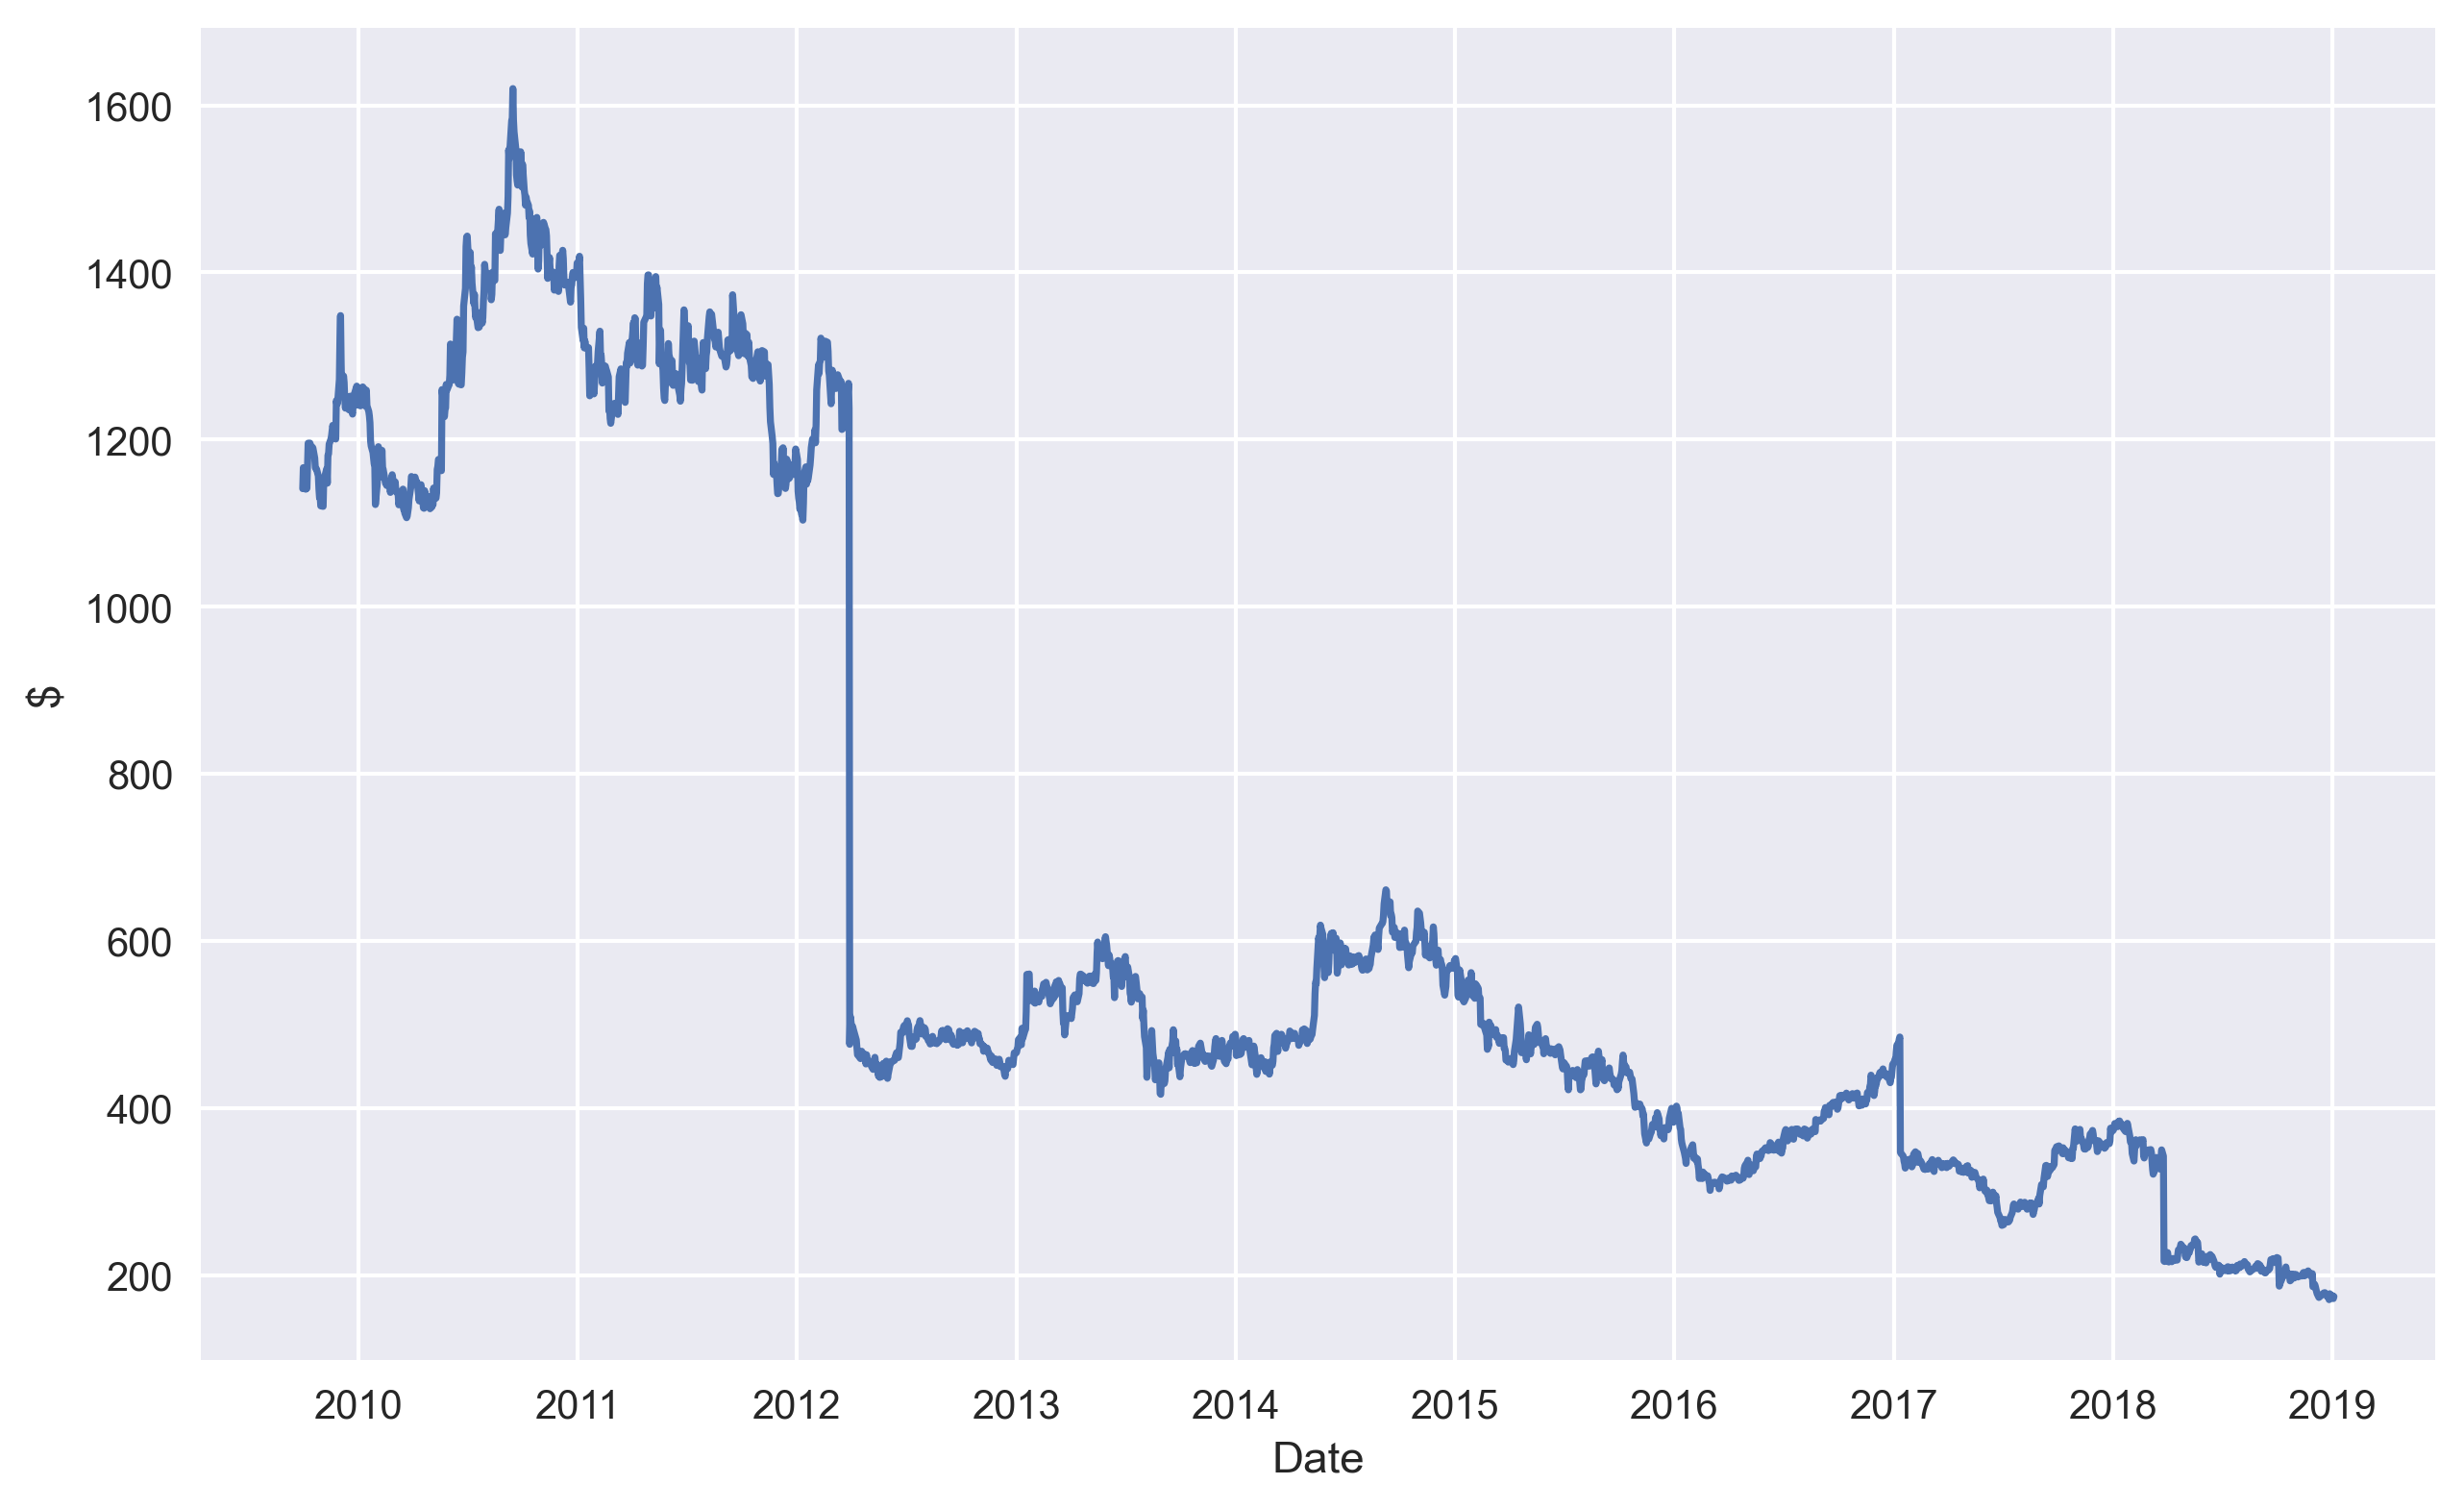

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## Time Series Components

4 Components:
1. Trend
2. Seasonality
3. Cyclicality
4. Residual



## Trend

Trend indicates a general tendency of an increase or decrease during a period of time. The S&P 500 prices graph a bit below shows what this looks like.

It may be shown in a line plot - but there are other strong tools for this task.

- Autocorrelation function (ACF): A statistical tool to analyze the relationship between the current value of a time series and its lagged values. Graphing ACF enables us to readily observe the serial dependence in a time series. The first bar shows the correlation of the series with its 0 lag (itself), and the second bar shows the correlation of the series with its 1 lag, and so on. 
- Partial autocorrelation function (PACF): Whereas ACF is considered a useful tool in the MA(q) model. PACF works well with the AR(p) mode. It provides information on the correlation between the current value of a time series and its lagged values, controlling for other correlations. In interpreting the PACF, we focus on the spikes outside the dark region representing confidence interval. This can be used to determine the number of lags to choose; we may use the model to include lags up to the point at which the value exceeds the confidence interval. 


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pytz

In [36]:
ticker = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)

start_date = start.strftime('%Y-%m-%d')
end_date = end.strftime('%Y-%m-%d')

In [37]:
SP_prices = yf.download(ticker, period='5y', interval='1mo')['Adj Close']

[*********************100%***********************]  1 of 1 completed


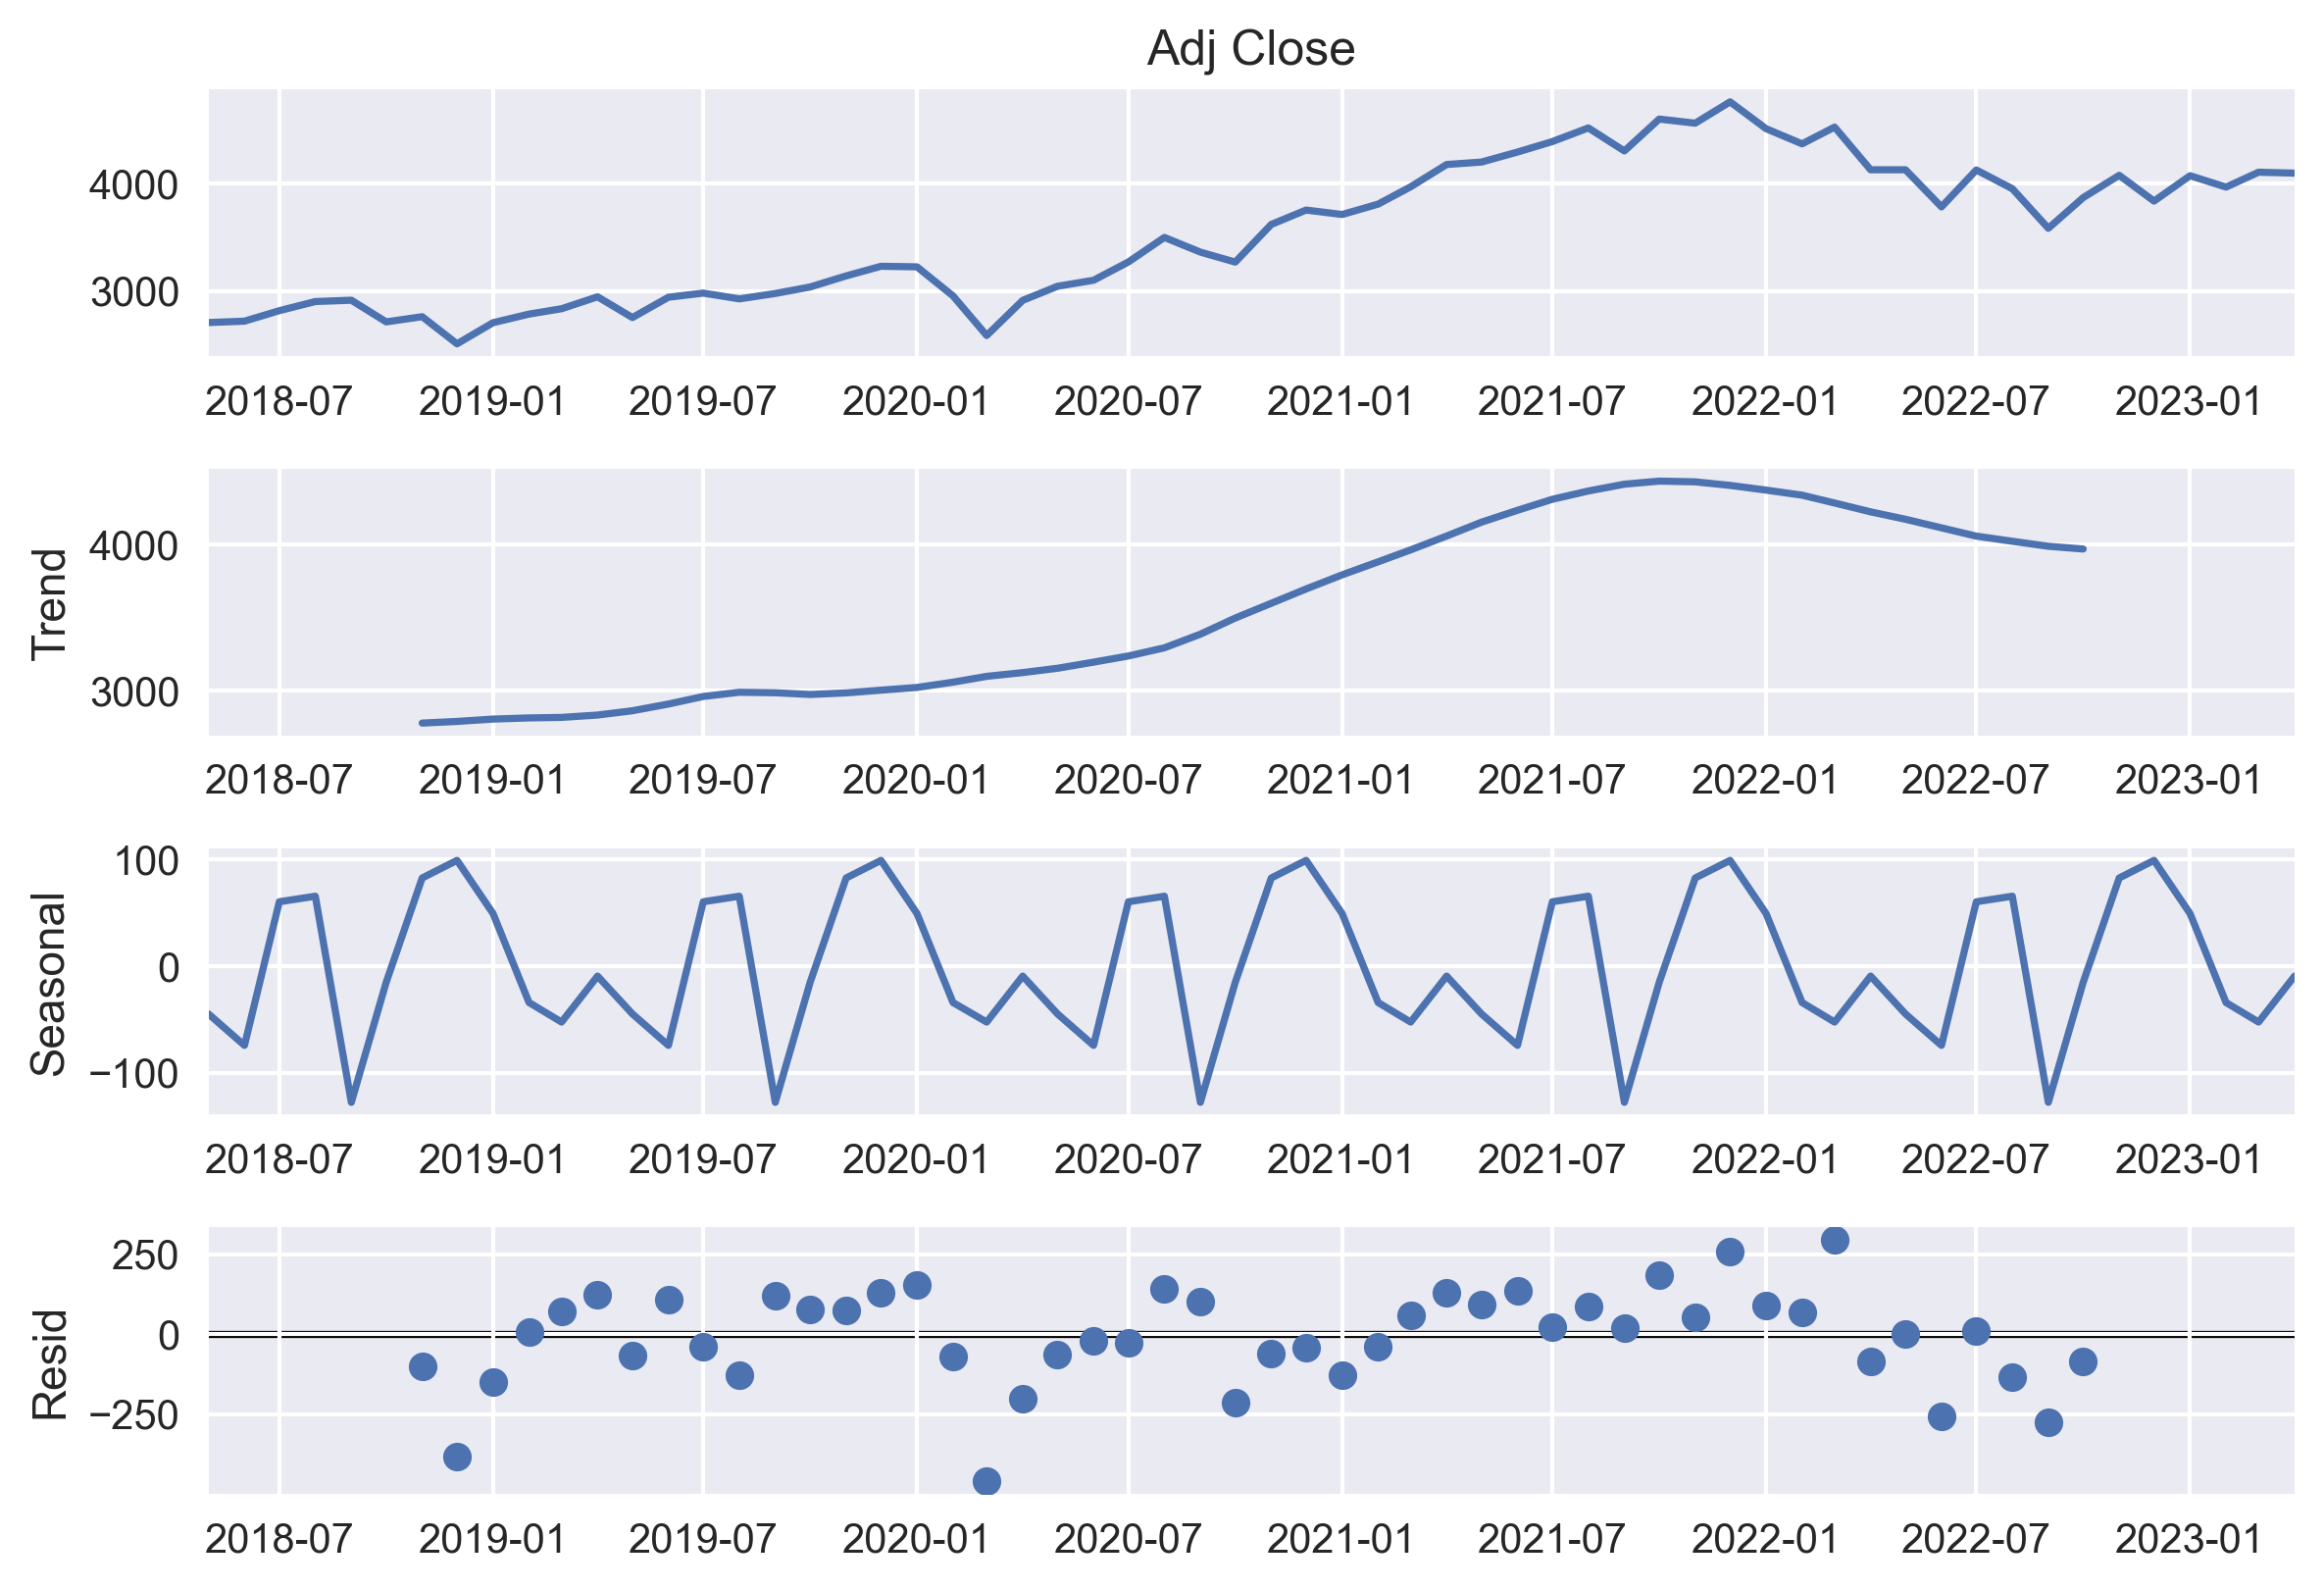

In [40]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

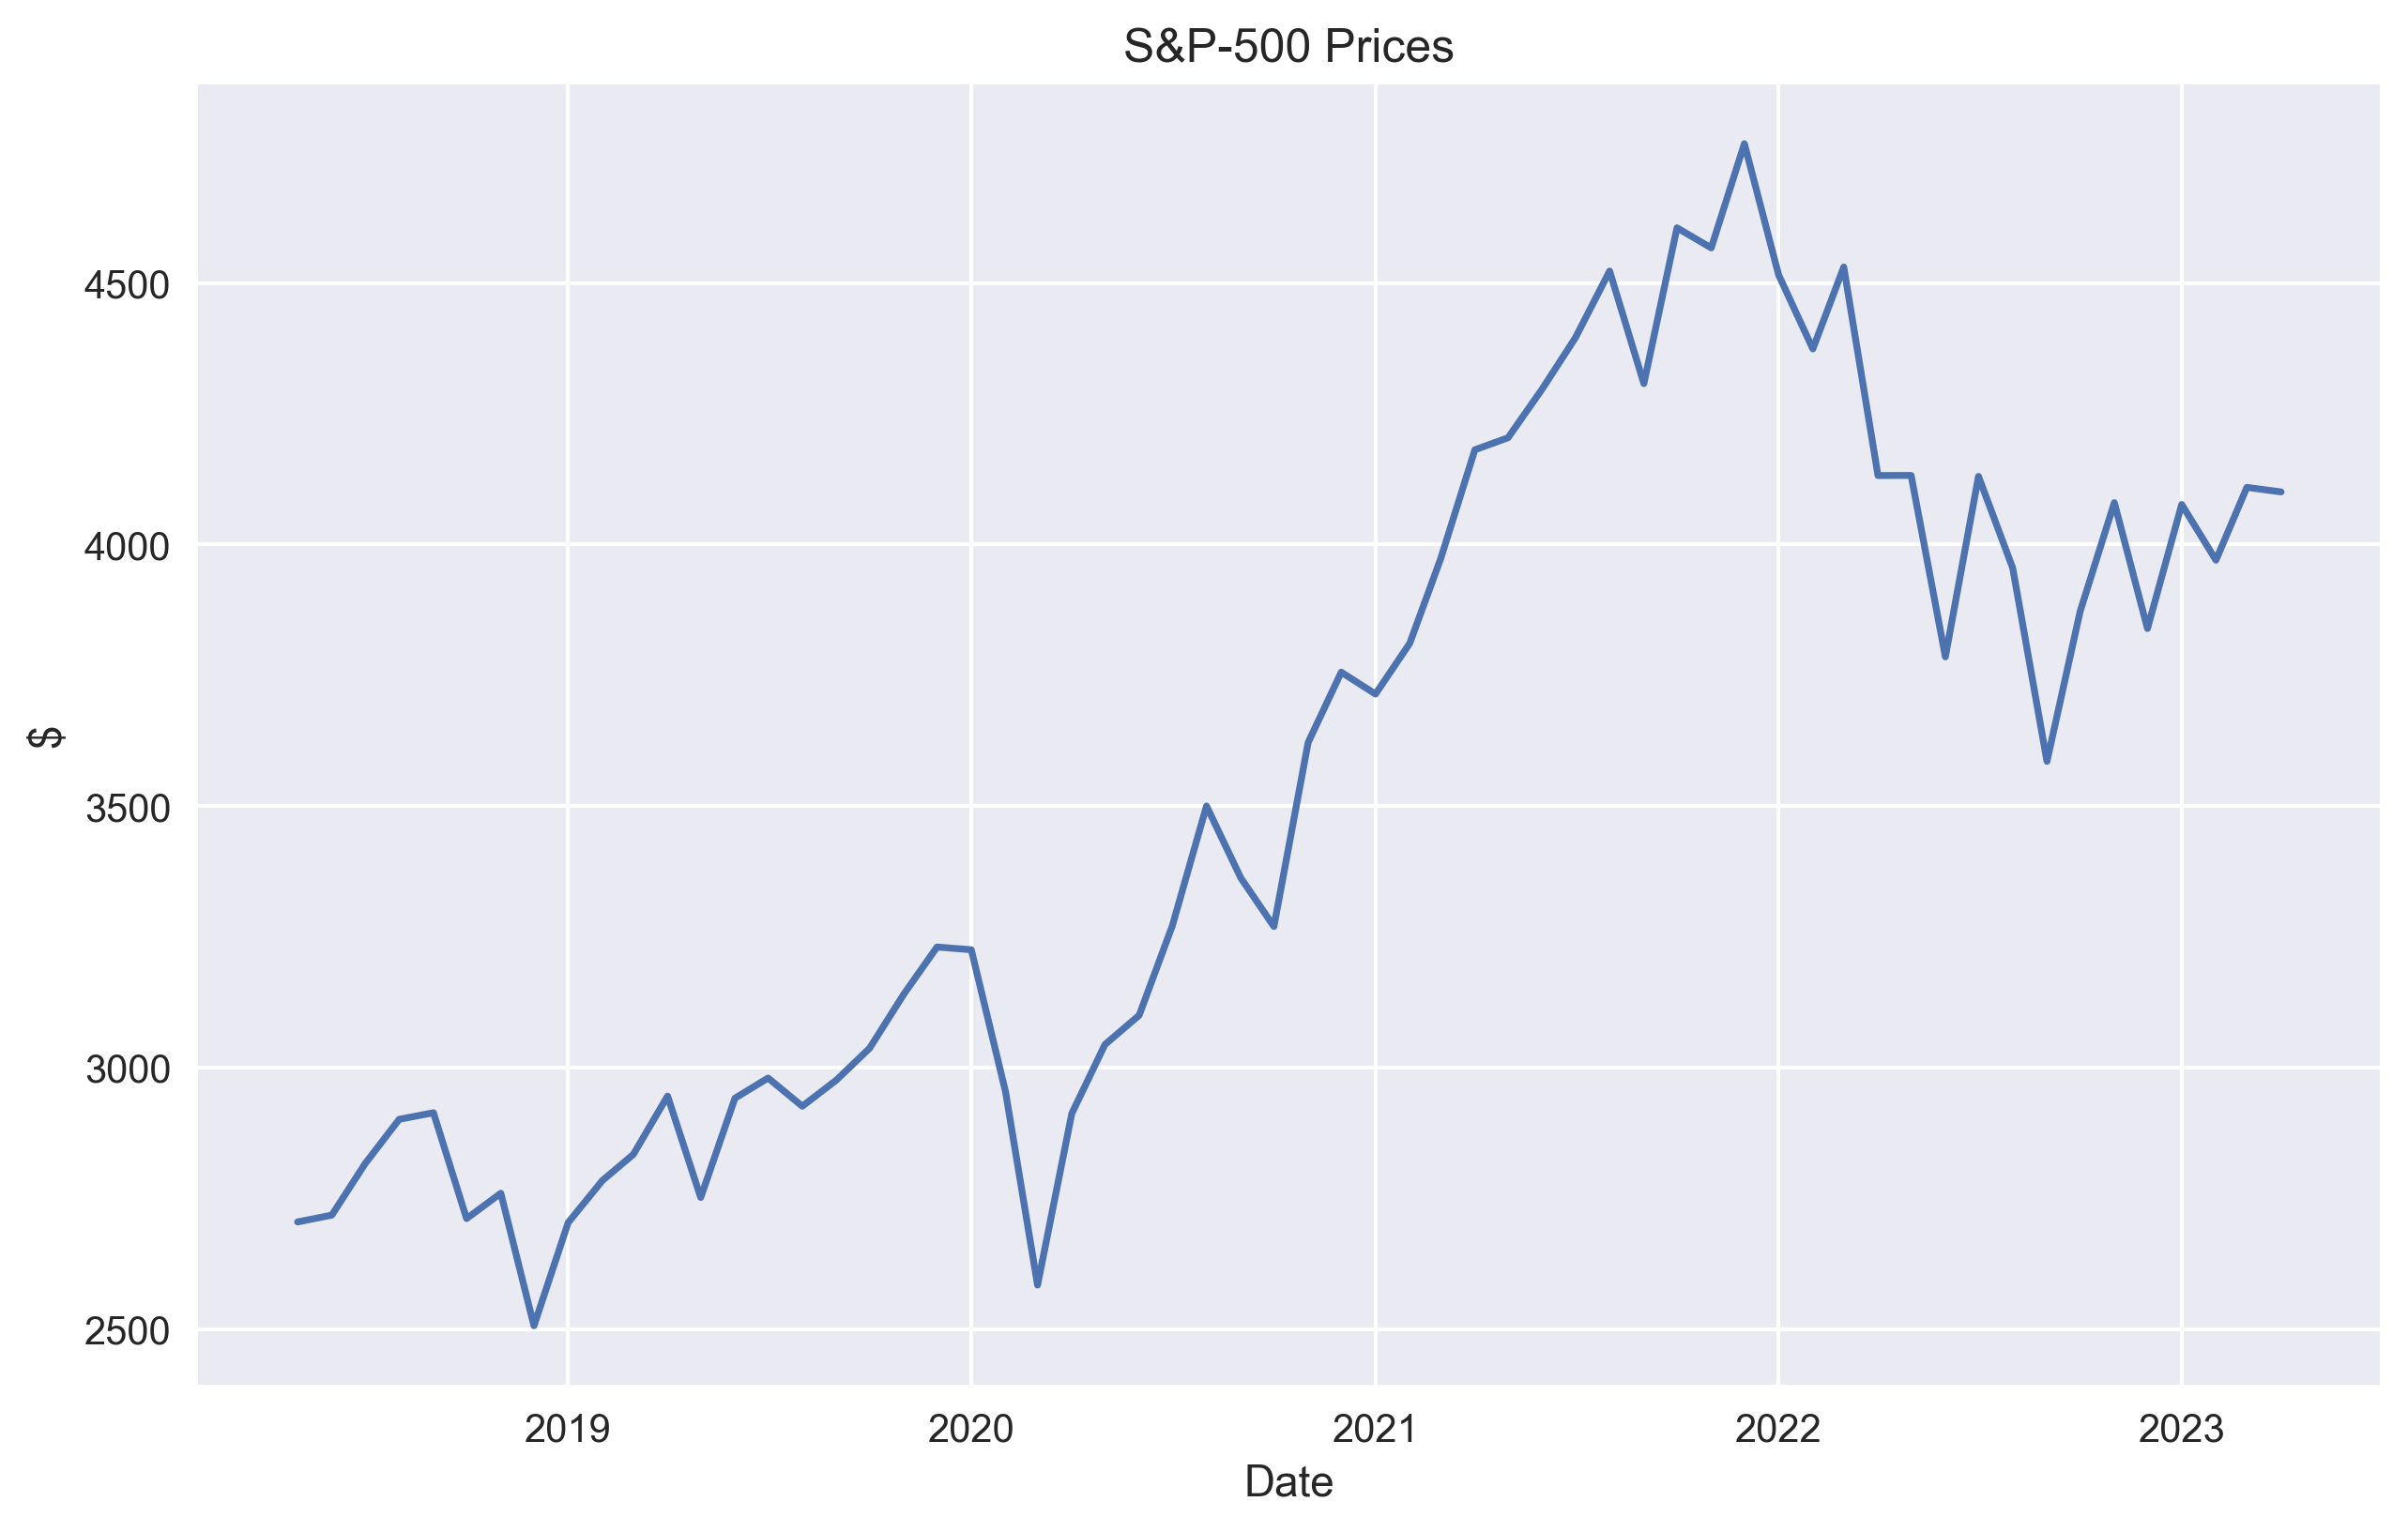

In [42]:
# The following shows what trend looks like.

plt.figure(figsize=(10, 6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

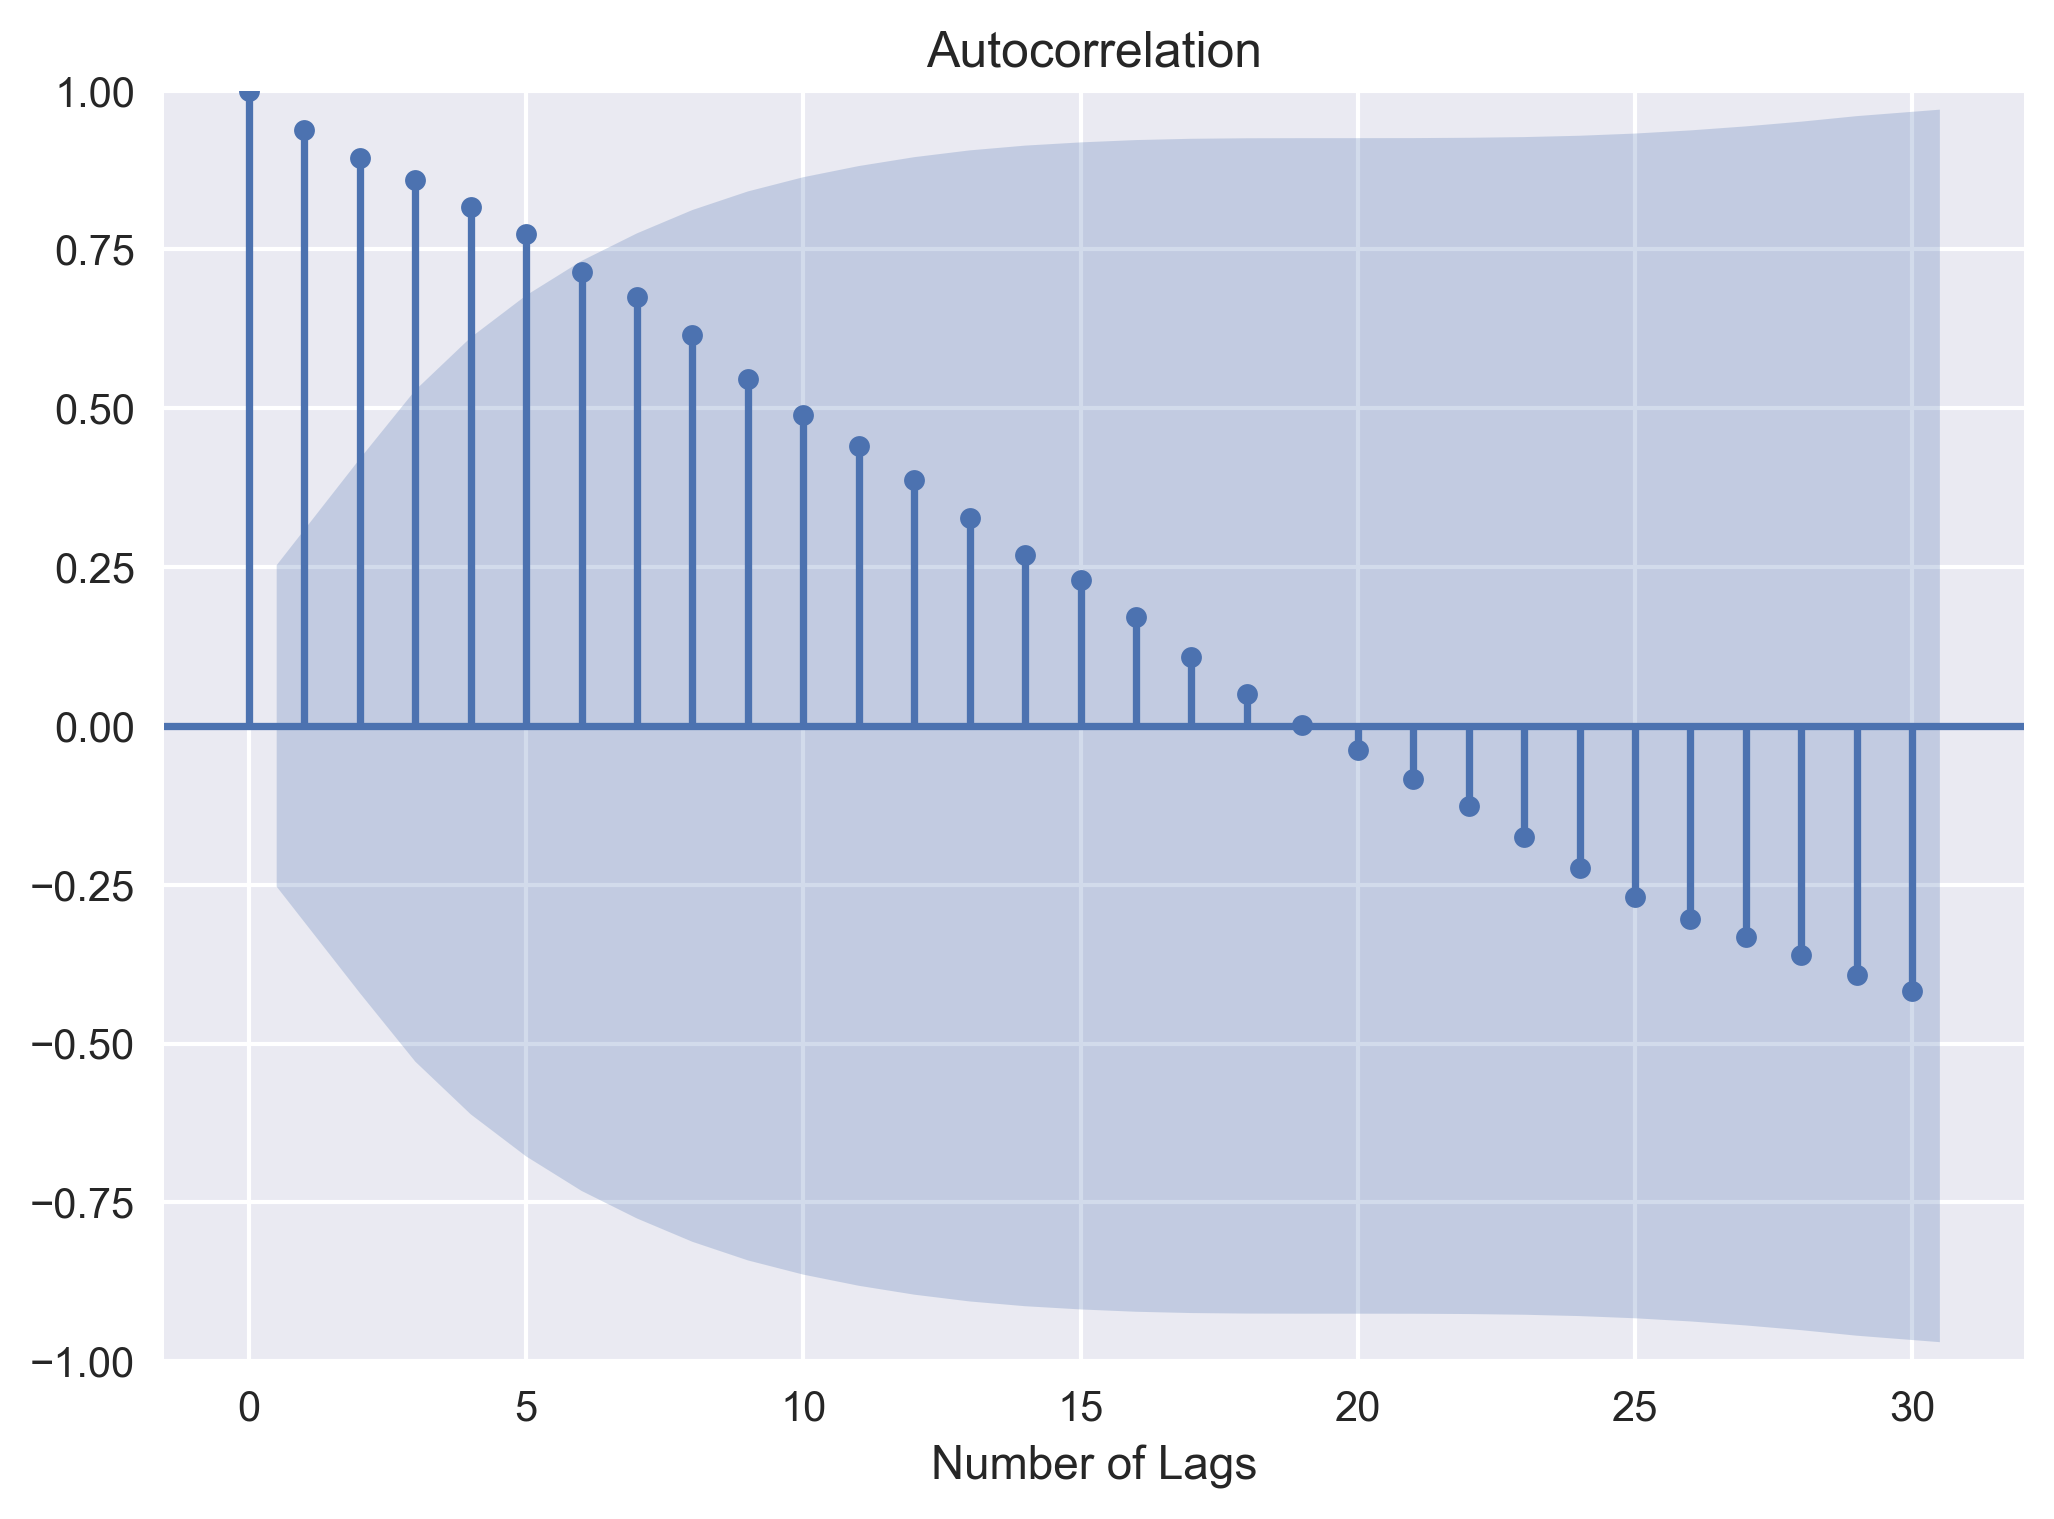

In [43]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

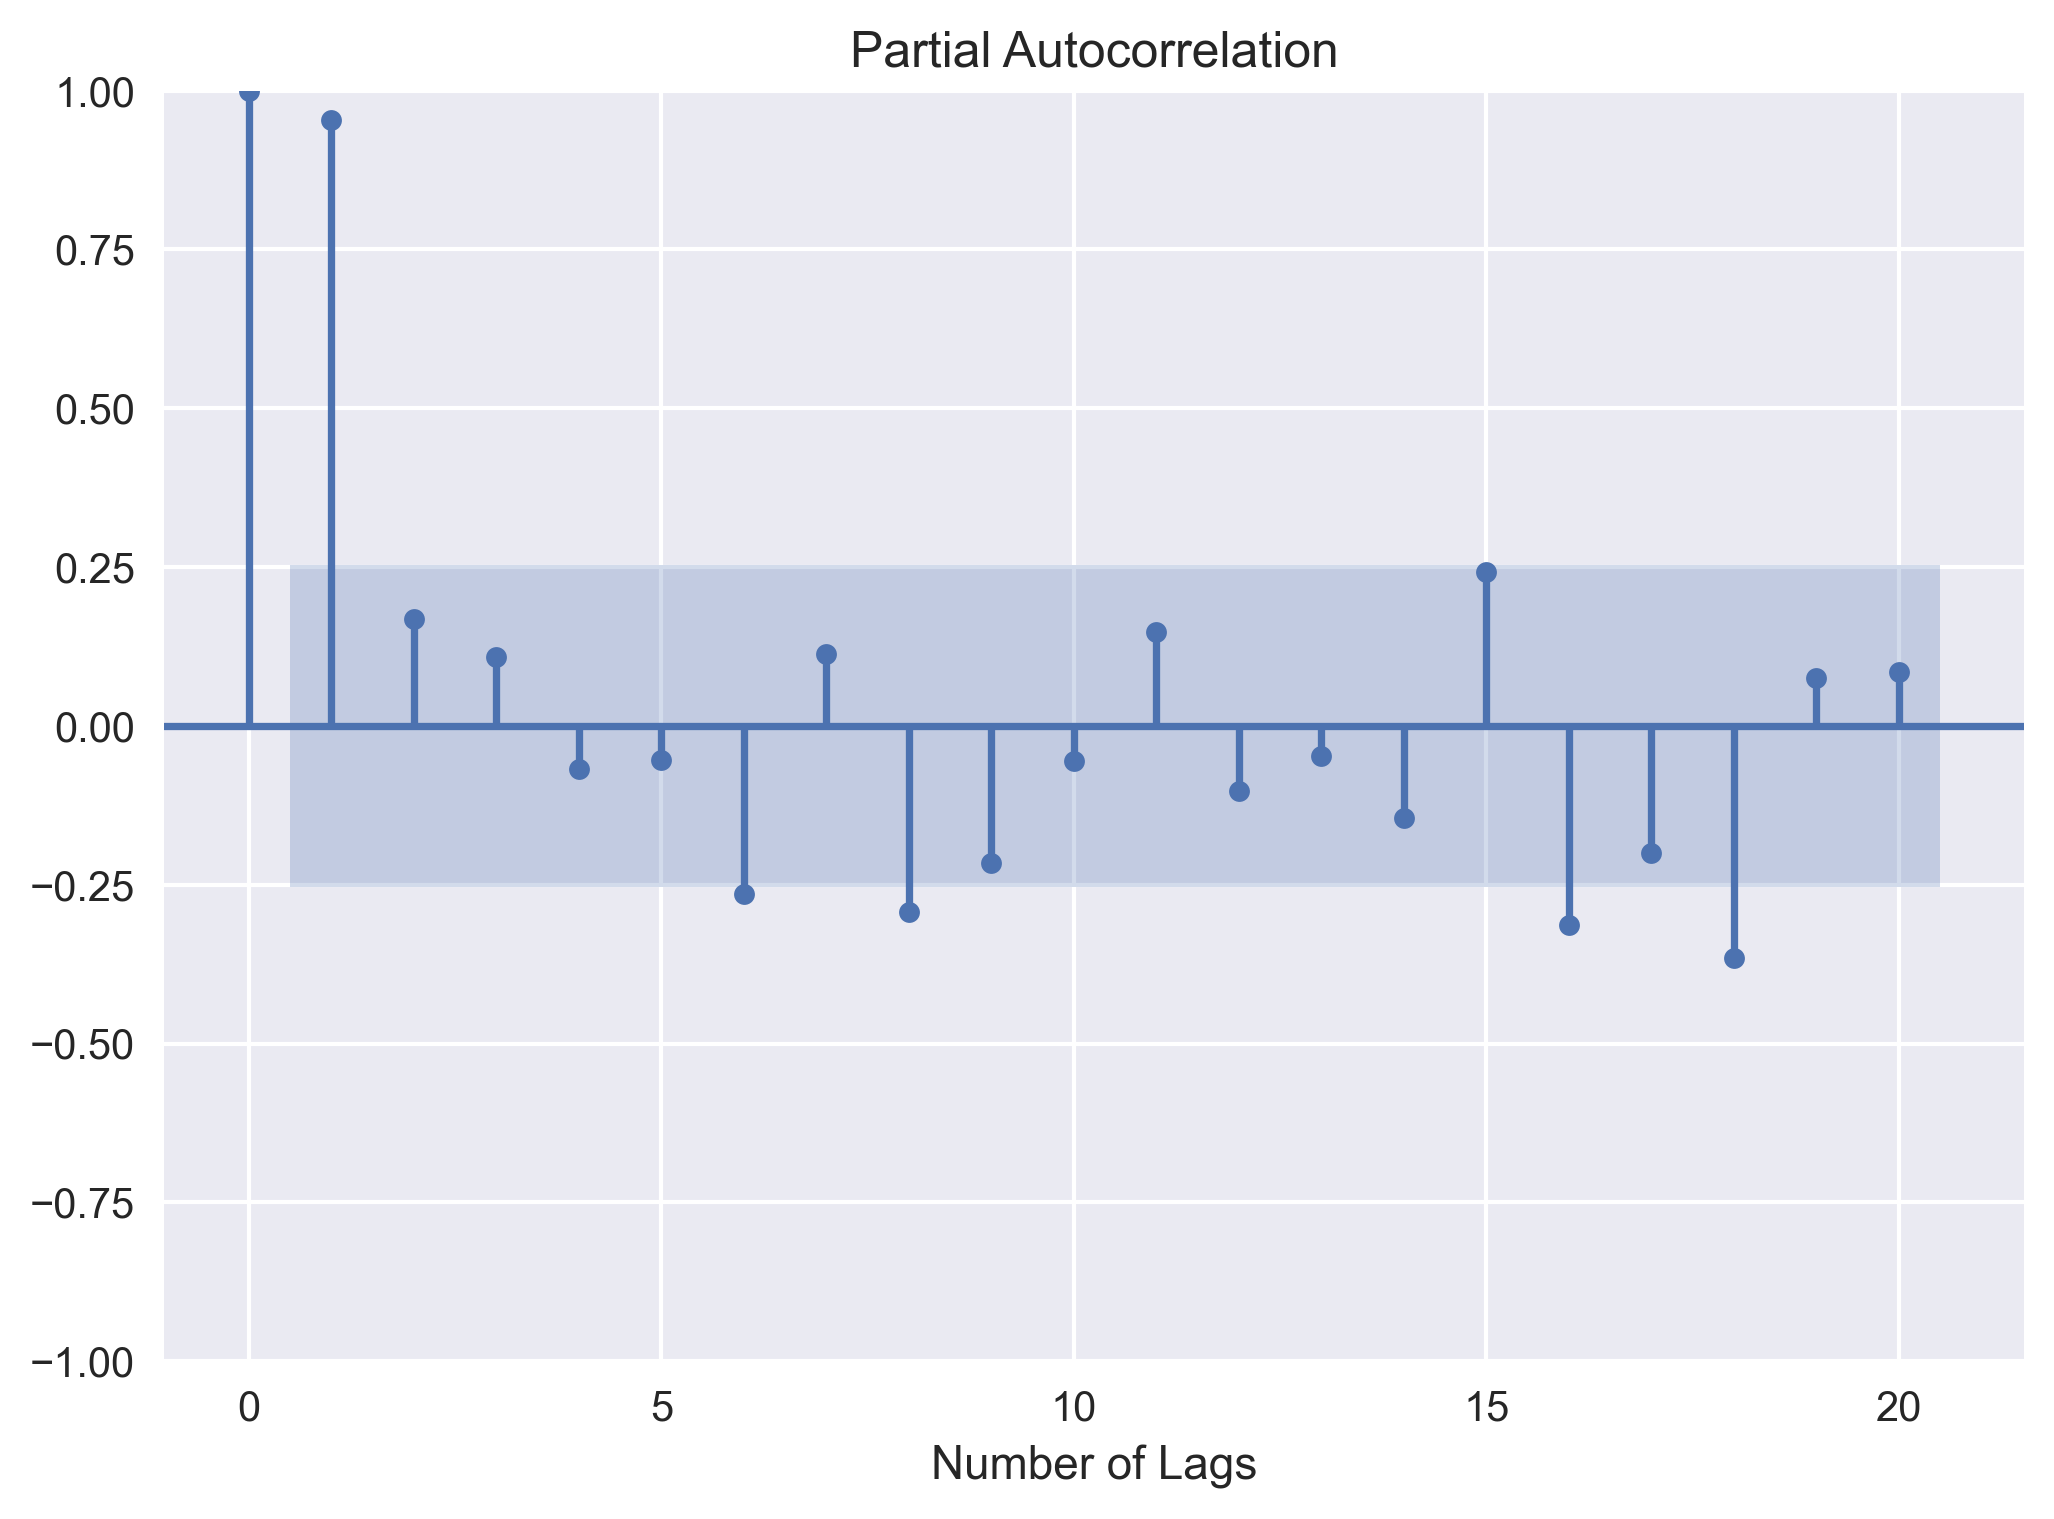

In [45]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=20)
plt.xlabel('Number of Lags')
plt.show()

 ## Seasonality

 - Exists if there are regular fluctuations over a given period of time.
 - An ACF plot can also provide info about seasonality as the periodic ups and downs can be observable.

In [49]:
from fredapi import Fred
import statsmodels.api as sm

In [50]:
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#insert you api key

In [51]:
energy = fred.get_series("CAPUTLG2211A2S", 
                         observation_start="2010-01-01", 
                         observation_end="2020-12-31")
energy.head(12)

2010-01-01    83.6433
2010-02-01    84.8414
2010-03-01    81.9267
2010-04-01    79.3583
2010-05-01    82.6349
2010-06-01    84.2155
2010-07-01    83.4218
2010-08-01    83.5761
2010-09-01    83.5229
2010-10-01    80.6774
2010-11-01    81.5641
2010-12-01    85.7813
dtype: float64

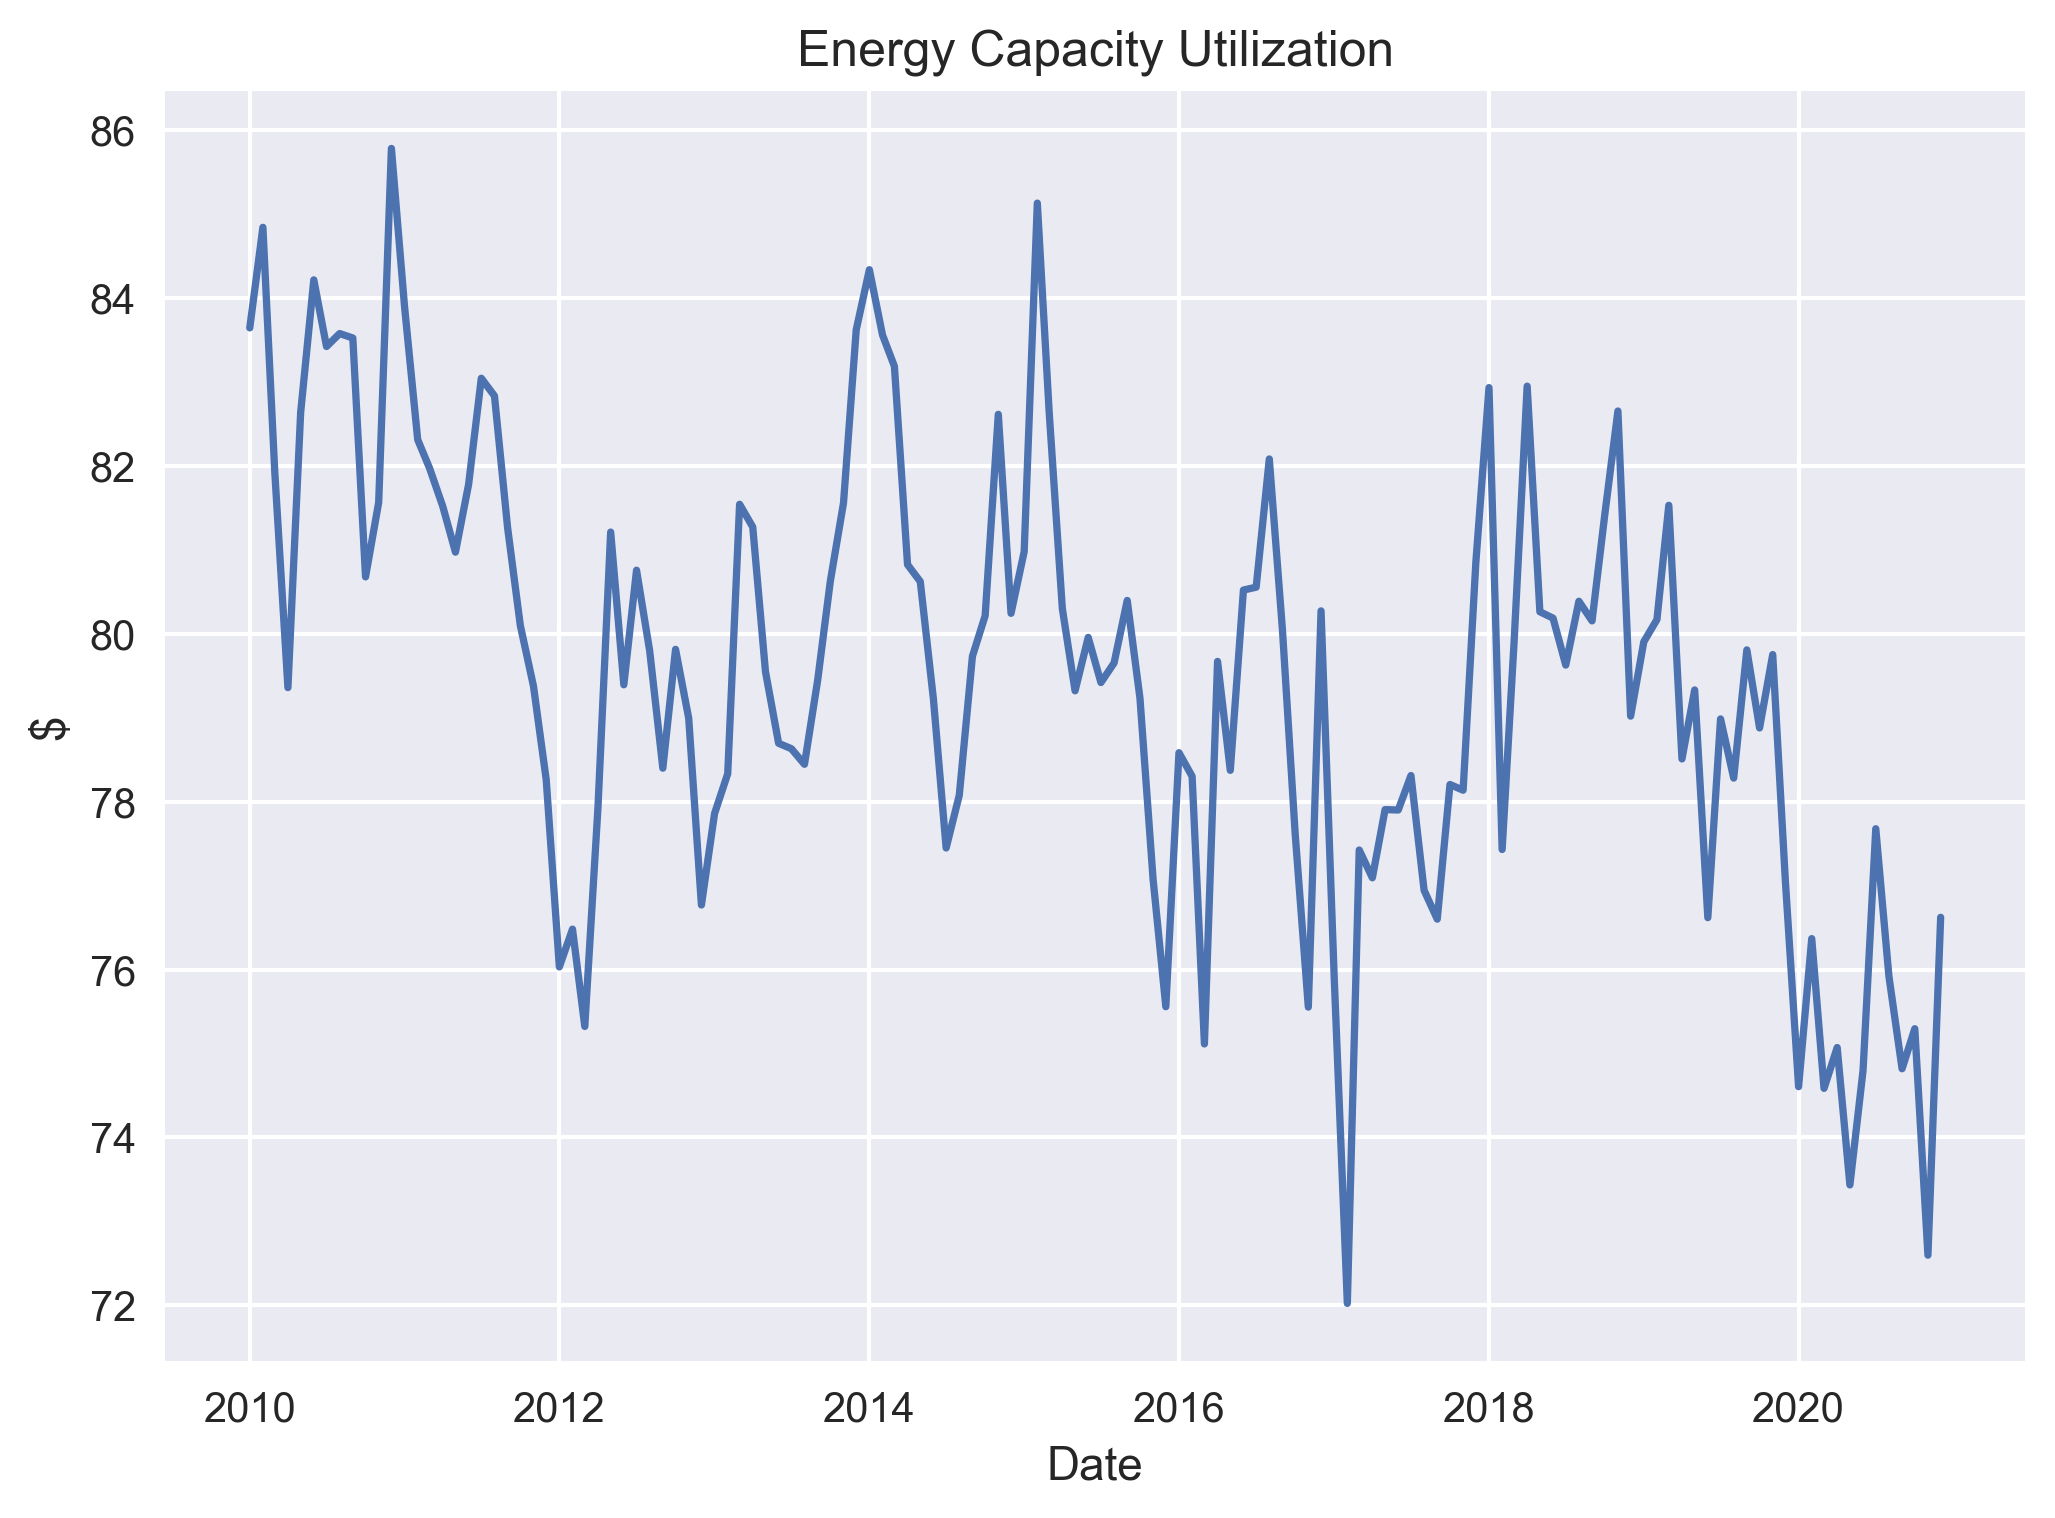

In [52]:
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

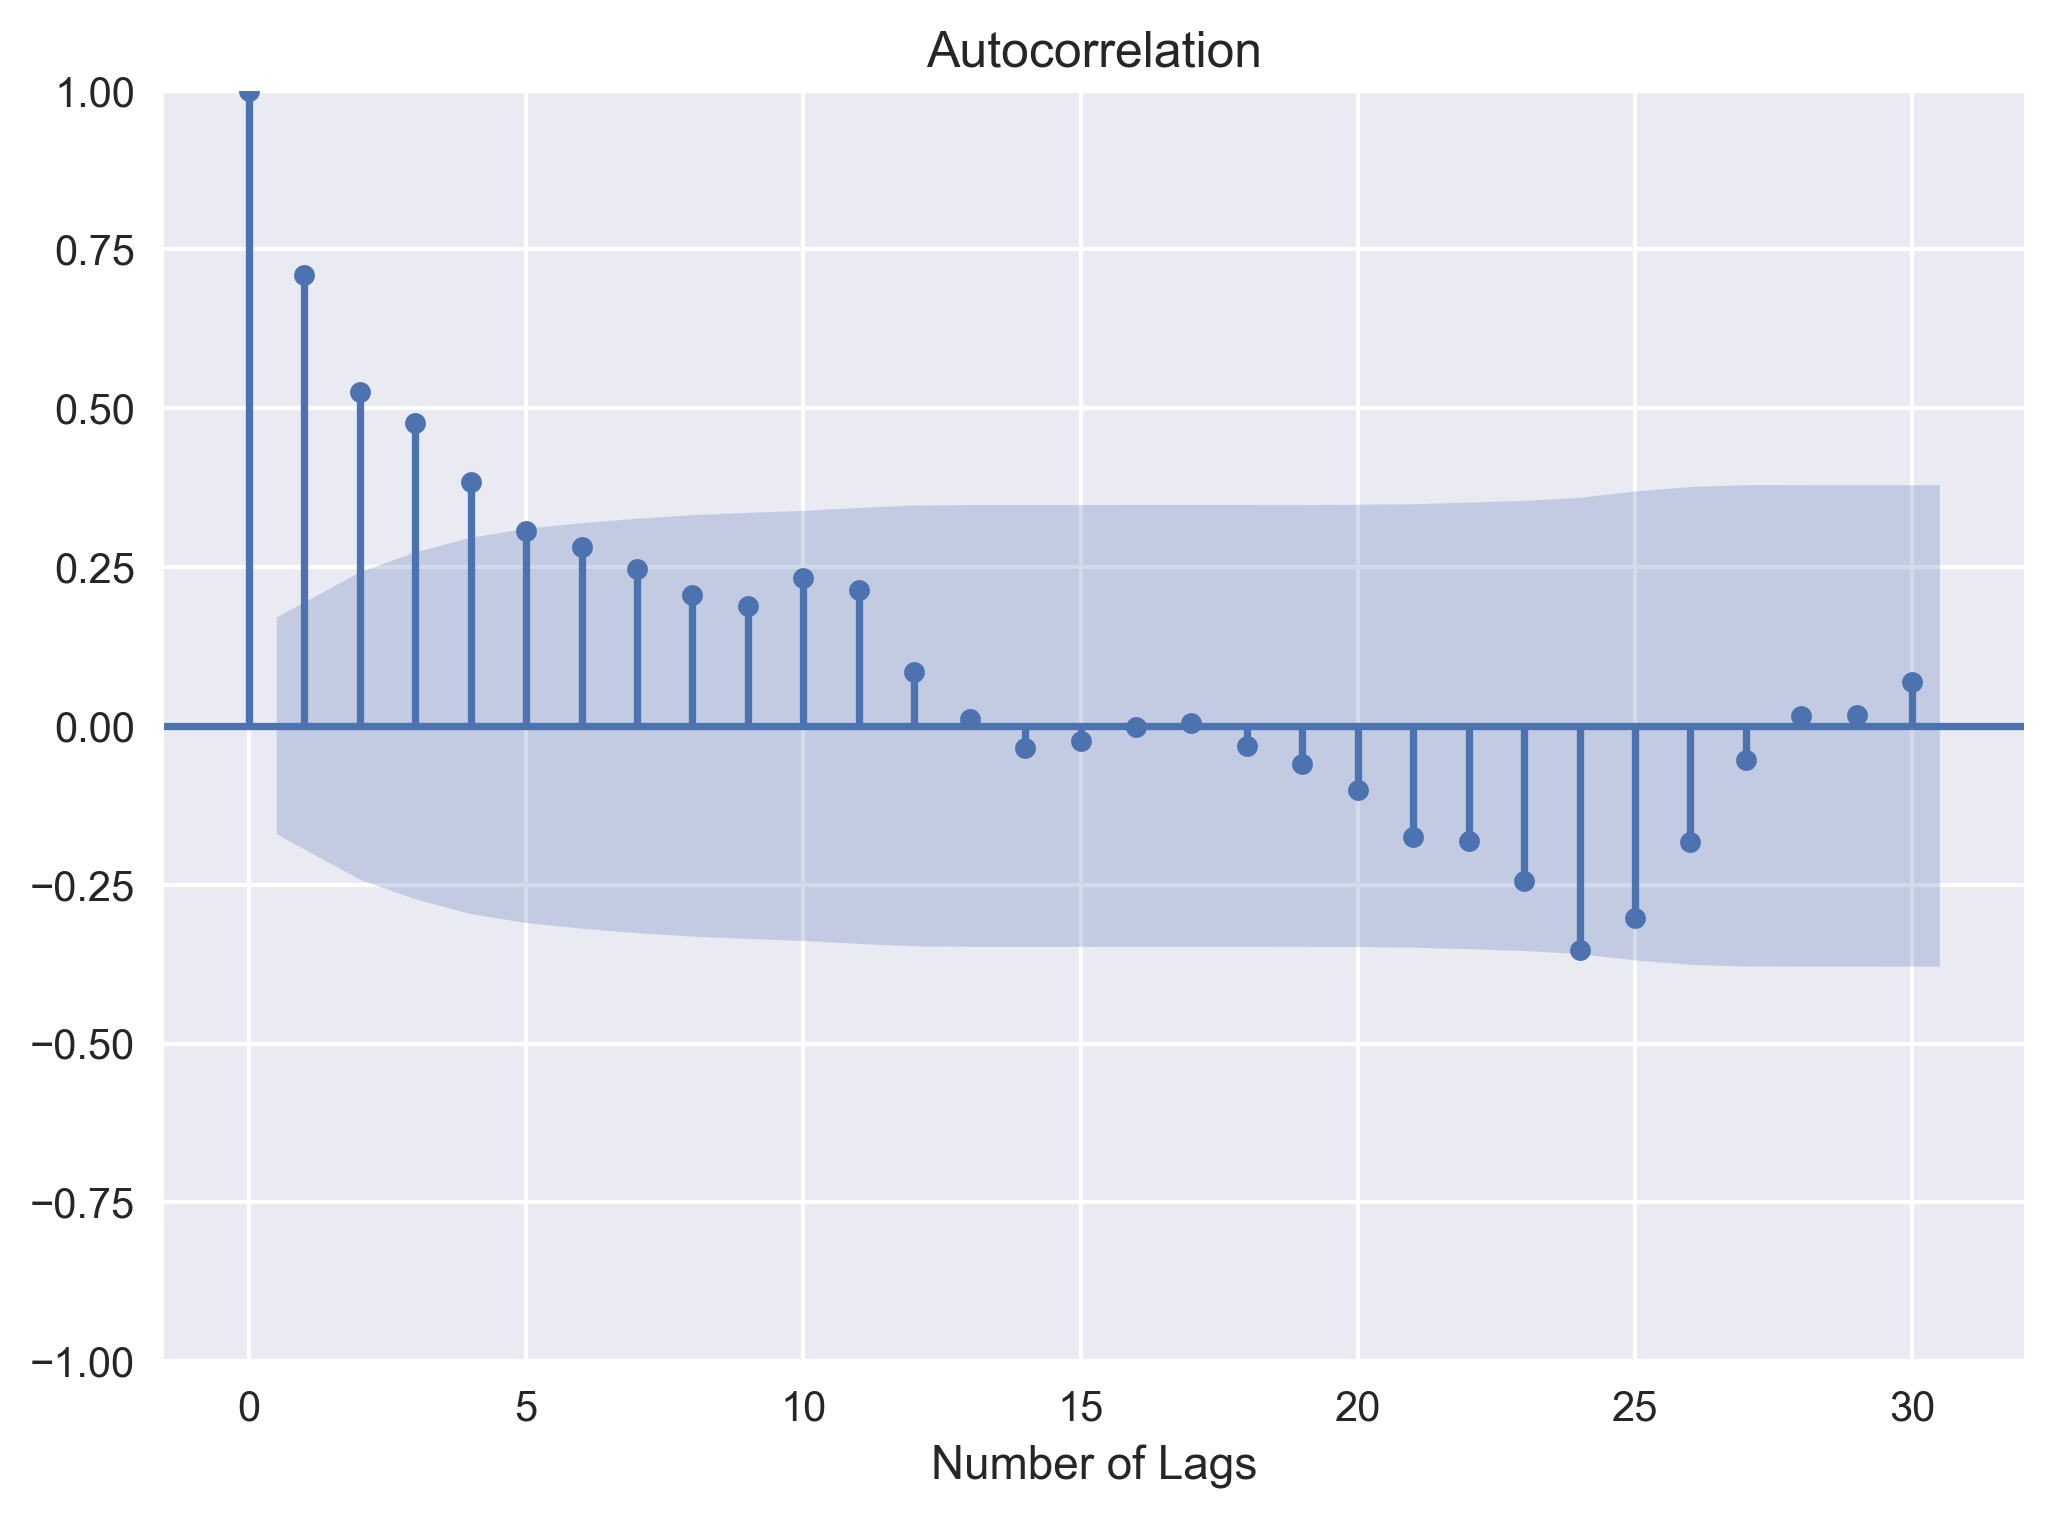

In [53]:
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.show()

## Cyclicality

- Similar to the above example, but with a cyclic dependency; i.e. the data does not show fixed period movements. It exists when higher periodic variation than the trend emerges. Cyclicalit is different from seasonality in the sense there is no fluctuation in a fixed period; it might for instance be in house purchases.

## Residual

- Known as an irregular component of time series. Technically, is is equal to the difference between observations and related fitted values. What's "leftover" from the model.

## Stationarity

Time series models lack some core assumptions, but the most prominent one is stationarity.  


Stationarity means that statistical properties such as mean, variance, and covariance of the time series do not change over time.  


There are 2 types of stationarity:
  1. Weak stationarity: The time series should have a finite variance with constant mean and a convariance structure that is a function of the time difference.
  2. Strong stationarity: If the joint distribution is the same with a shifted version of the dataset. It implies that distribution of random variables of a random process is the same with shifting time index.  


Why do we need stationarity?
  1. In the estimation process, we must have some distribution as time goes on. If it changes over time, it becomes unpredictable and cannot be modeled.
  2. The ultimate goal of time series models is forecasting, which involves first estimating coefficients. If these change over time, we are unable to forecast.   


Having structural break, such as a financial crisis, creats a shift in distribution.

Additionally, some statistical models require stationary data only. All models require stationary data, but some will, by design, turn anything into stationary data and process it.  

Two ways to detect nonstationarity: **Visualization** and **statistical methods**. For the former, slow-decaying ACF implies nonstationary data because it presents a strong correlation in time. However, visualization is inadequate and something like the **augmented Dickey-Fuller (ADF)** test provides this. Assuming the confidence interval is 95%, the follwing test indicates the data is nonstationary (very high p-value).

In [54]:
stat_test = adfuller(SP_prices)[0:2]
print("The test statistic and p-value of ADF test are {}"
      .format(stat_test))

The test statistic and p-value of ADF test are (-1.1400407459983863, 0.698842966602075)


Taking the difference of the current time series value from its first lagged value is an afficient technique for removing the stationarity.

In [55]:
diff_SP_price = SP_prices.diff()

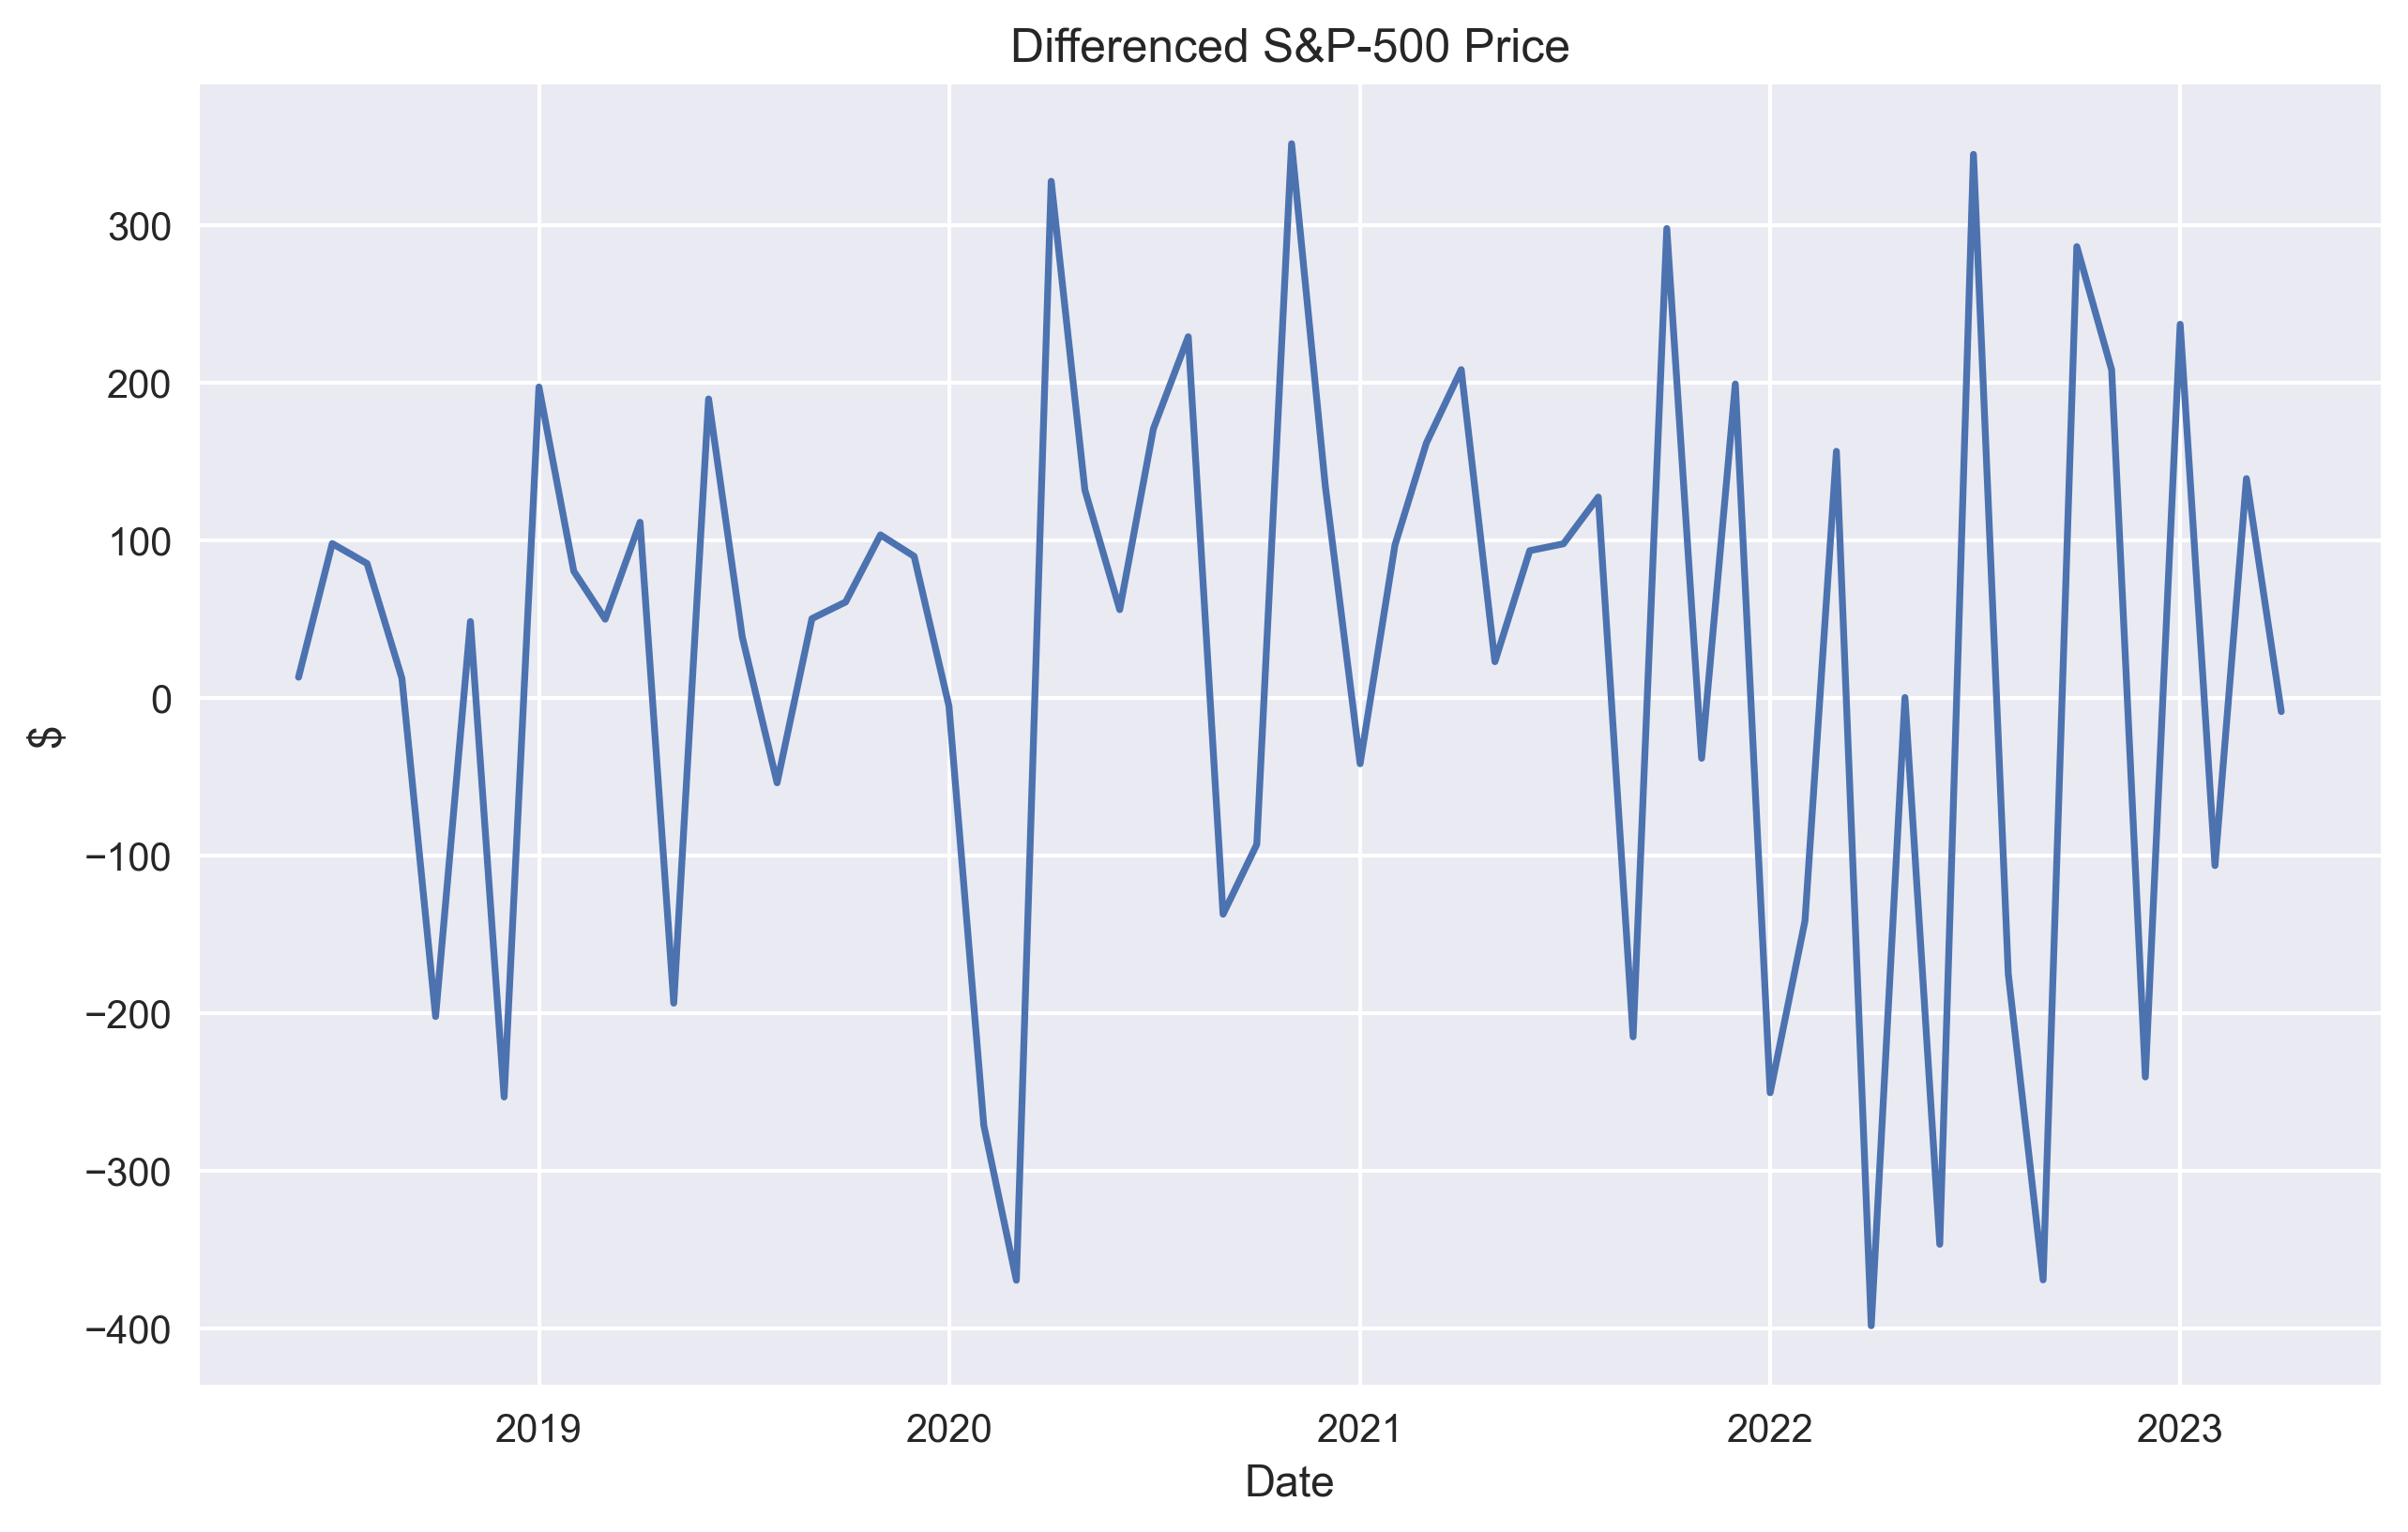

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(diff_SP_price)
plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

This data is now stationary.

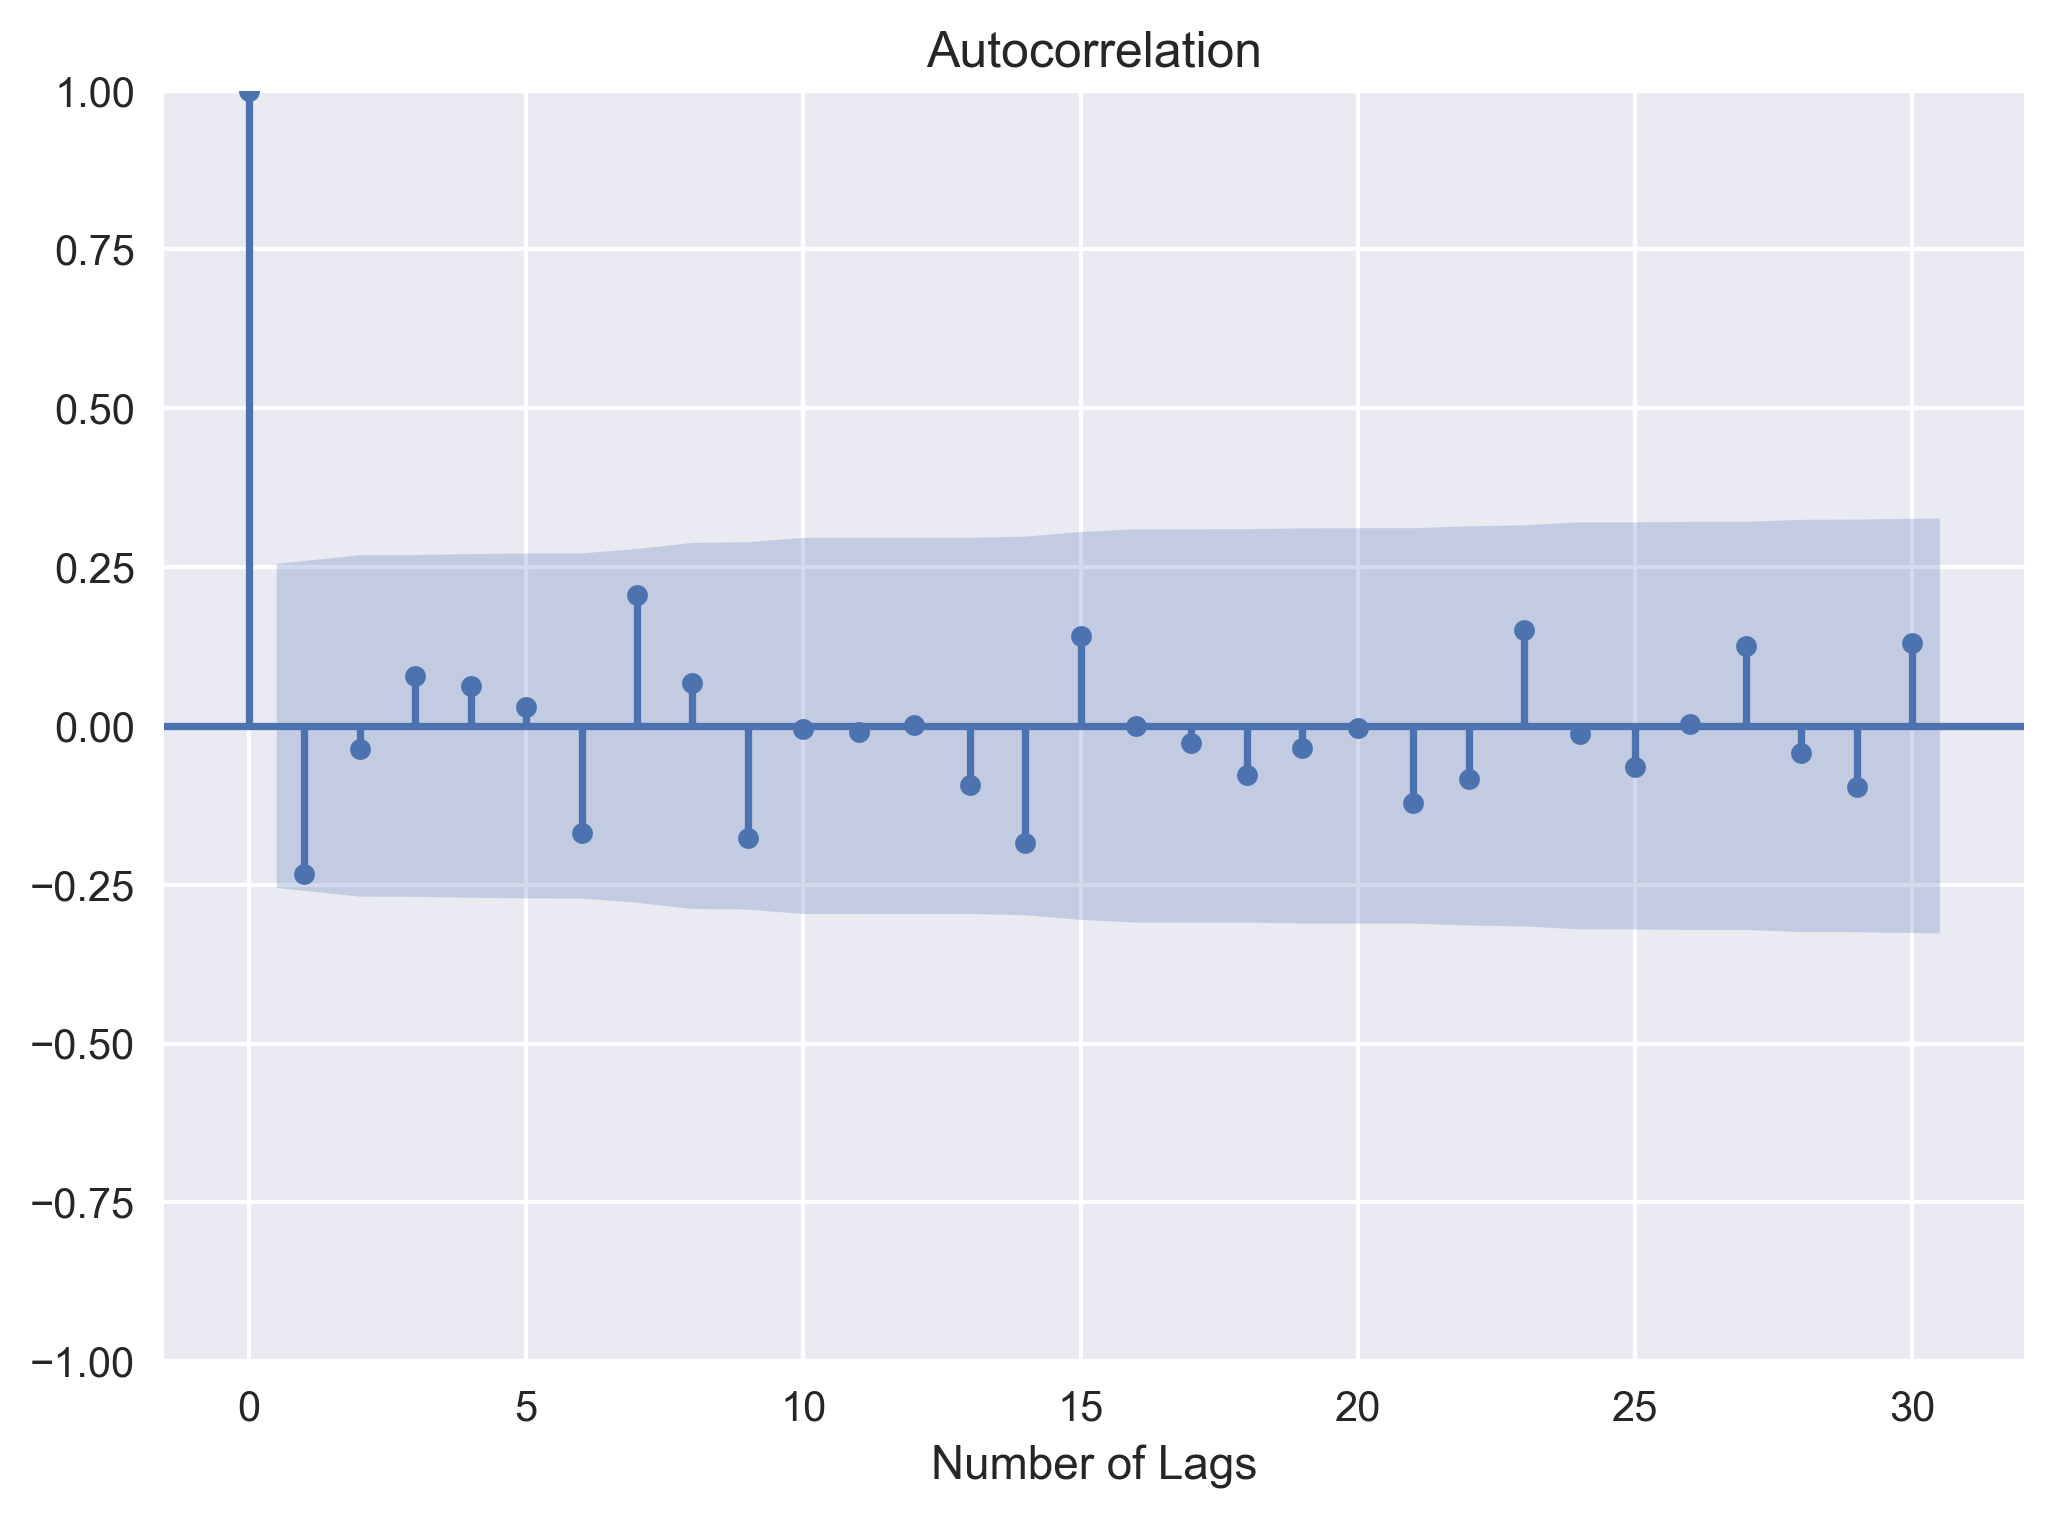

In [59]:
sm.graphics.tsa.plot_acf(diff_SP_price.dropna(),lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [60]:
stat_test2 = adfuller(diff_SP_price.dropna())[0:2]
print("The test statistic and p-value of ADF test after differencing are {}"\
      .format(stat_test2))

The test statistic and p-value of ADF test after differencing are (-9.49112538028855, 3.6503471492742216e-16)


Below, we will deal with nonstationarity that is due to seasonality.

We first apply the resample method to calculate annual mean.

In [61]:
seasonal_index = energy.resample('Q').mean()

In [62]:
dates = energy.index.year.unique()
deseasonalized = []
for i in dates:
    for j in range(1, 13):
        deseasonalized.append((energy[str(i)][energy[str(i)]\
                                              .index.month==j]))
concat_deseasonalized = np.concatenate(deseasonalized)

In [63]:
deseason_energy = []
for i,s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i:i+3] / 
                           seasonal_index.iloc[s])
concat_deseason_energy = np.concatenate(deseason_energy)
deseason_energy = pd.DataFrame(concat_deseason_energy, 
                               index=energy.index)
deseason_energy.columns = ['Deaseasonalized Energy']
deseason_energy.head()

Deaseasonalized Energy
2010-01-01                1.002071
2010-02-01                1.016424
2010-03-01                0.981505
2010-04-01                0.966964
2010-05-01                1.006888

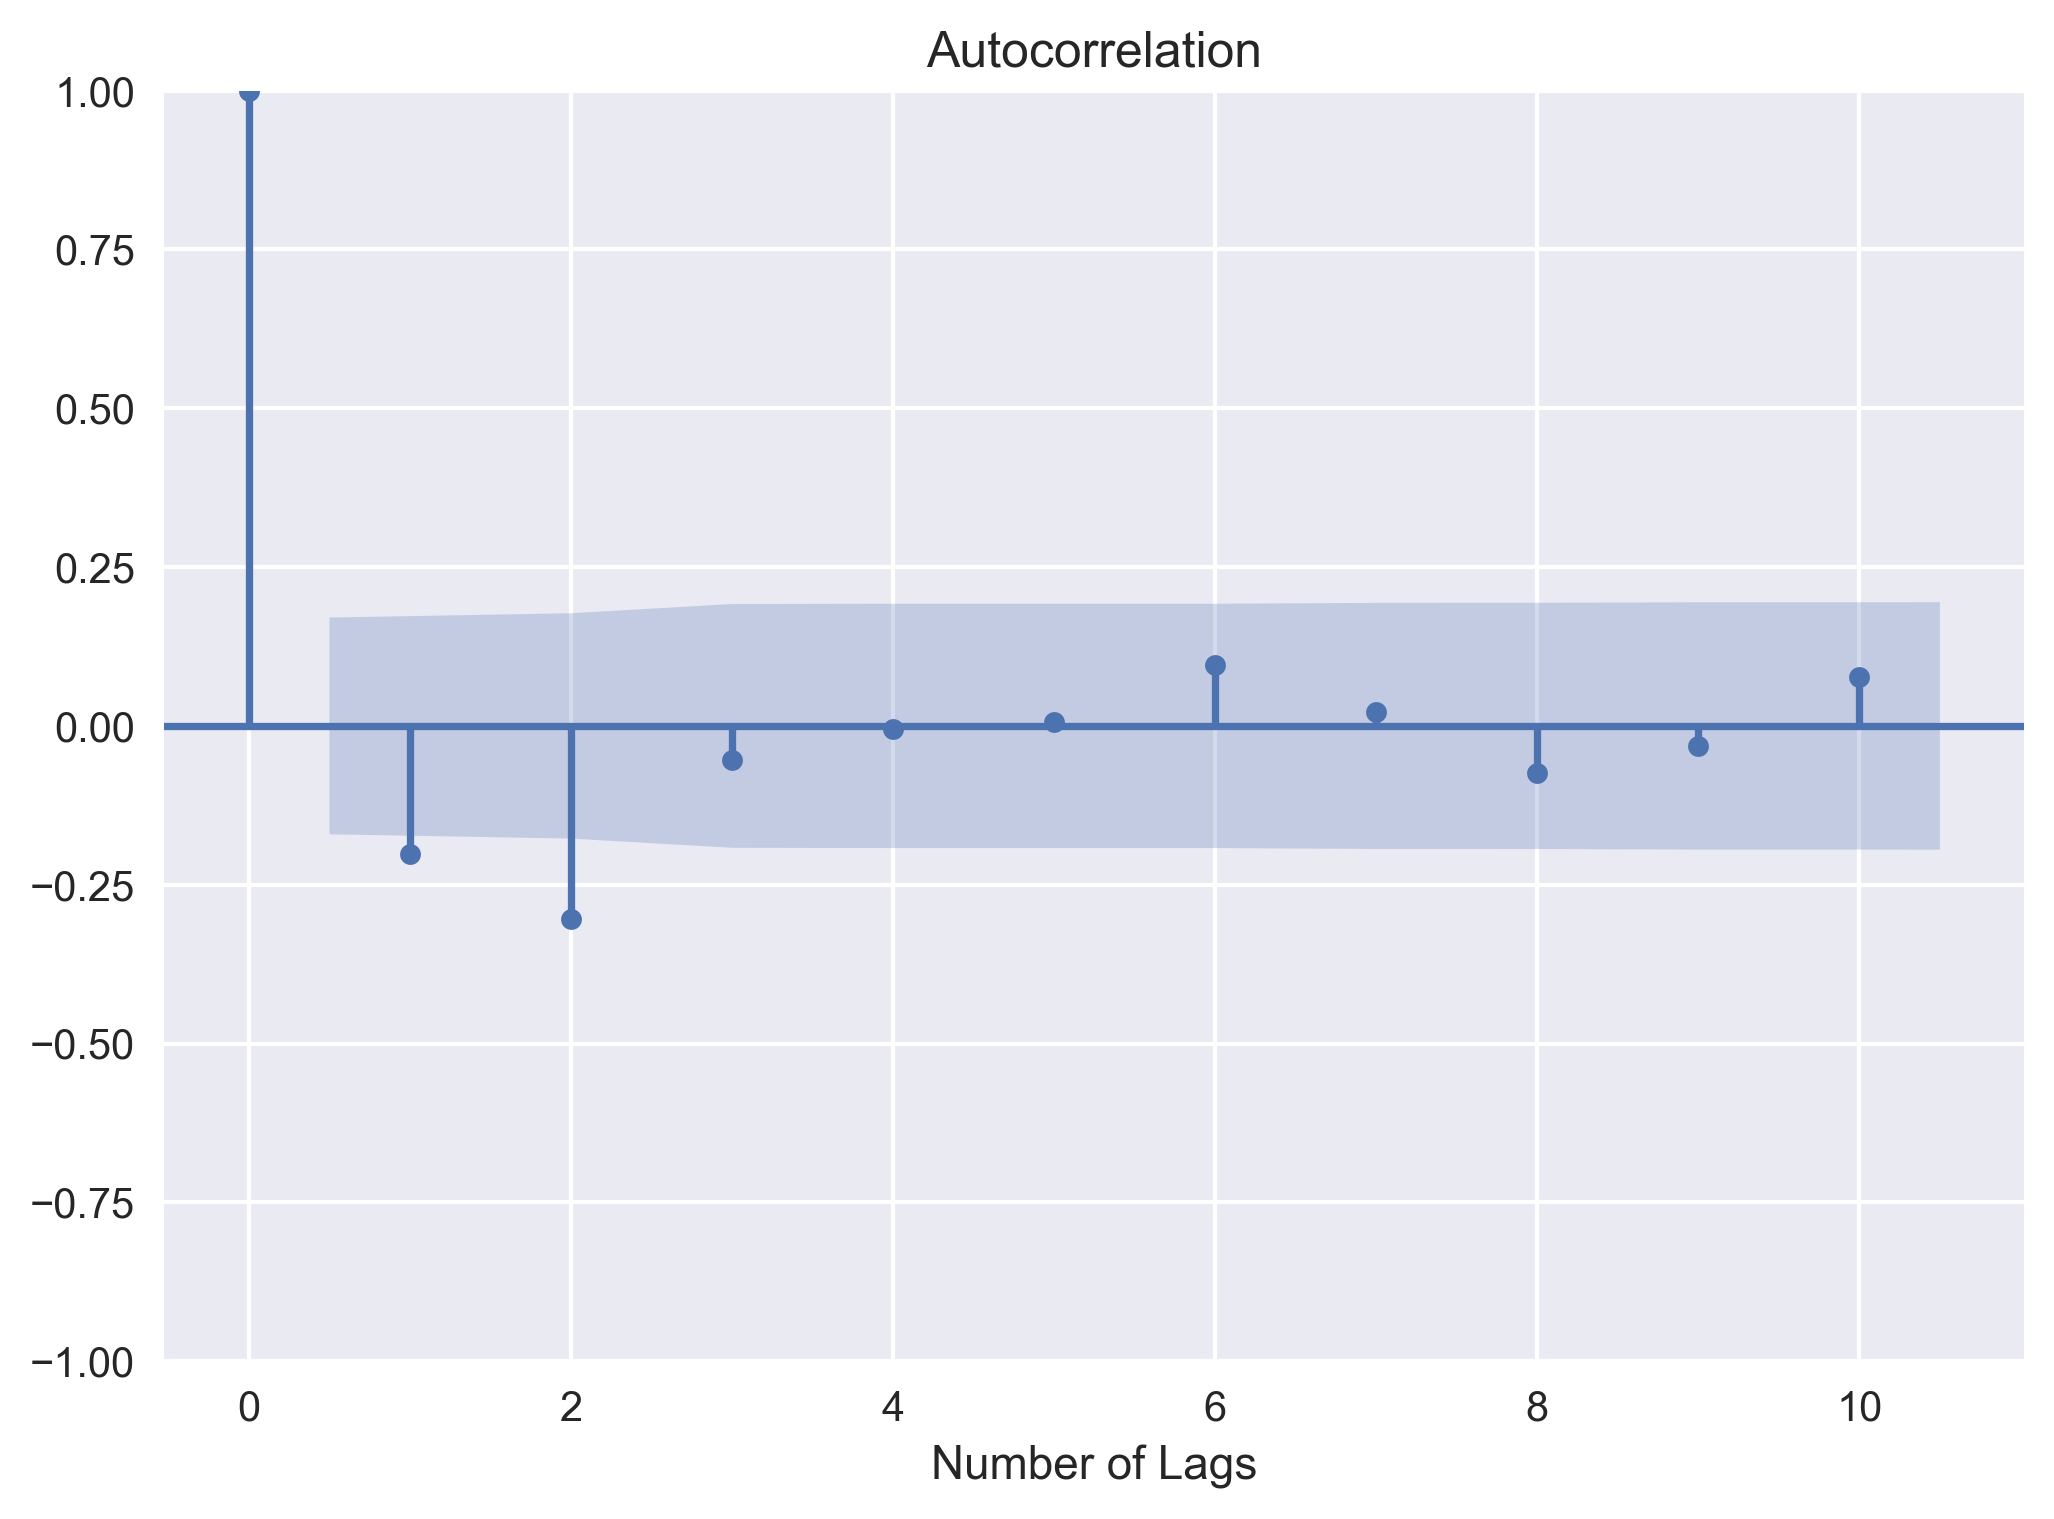

In [64]:
sm.graphics.tsa.plot_acf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

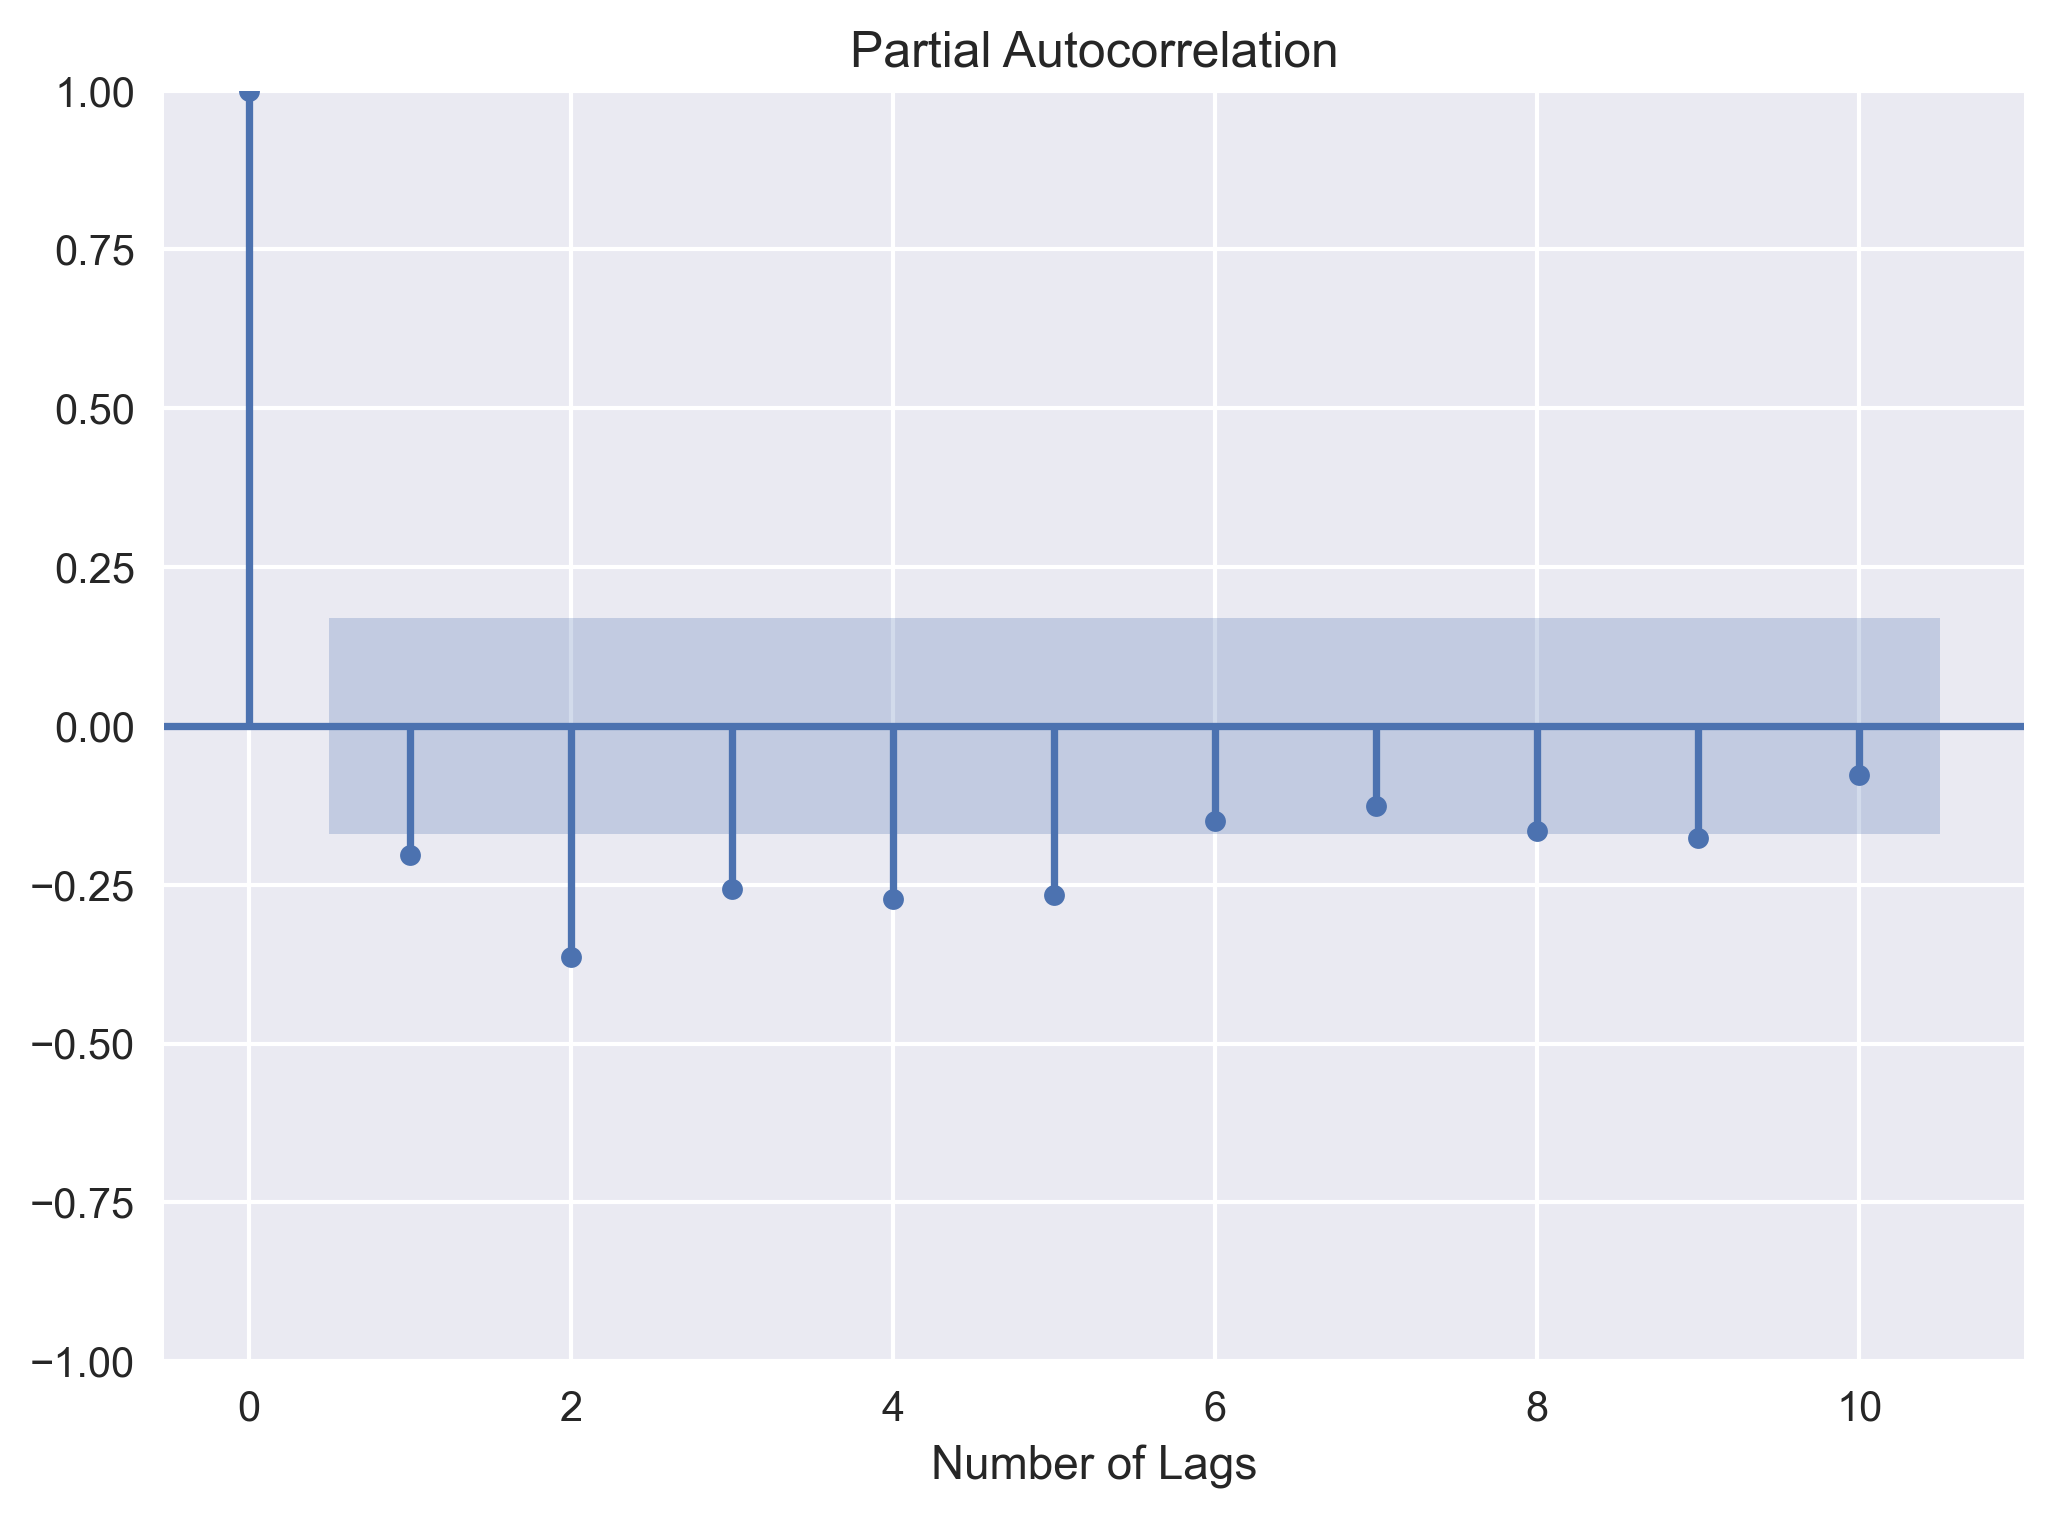

In [65]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

## Time Series Models

Traditional time series models are univariate and follow these phases:
1. Identification: Exploring the data using ACF and PACF, identifying patterns and conducting statistical tests
2. Estimation: Estimate coefficients via the proper optimization technique
3. Diagnostics: Check if information criteria or ACF/PACF suggest the model is valid. If so, ...
4. Forecast: Predict future values based on our estimation.

## White Noise

Uncorrelated sequences prevent us from forecasting future values.

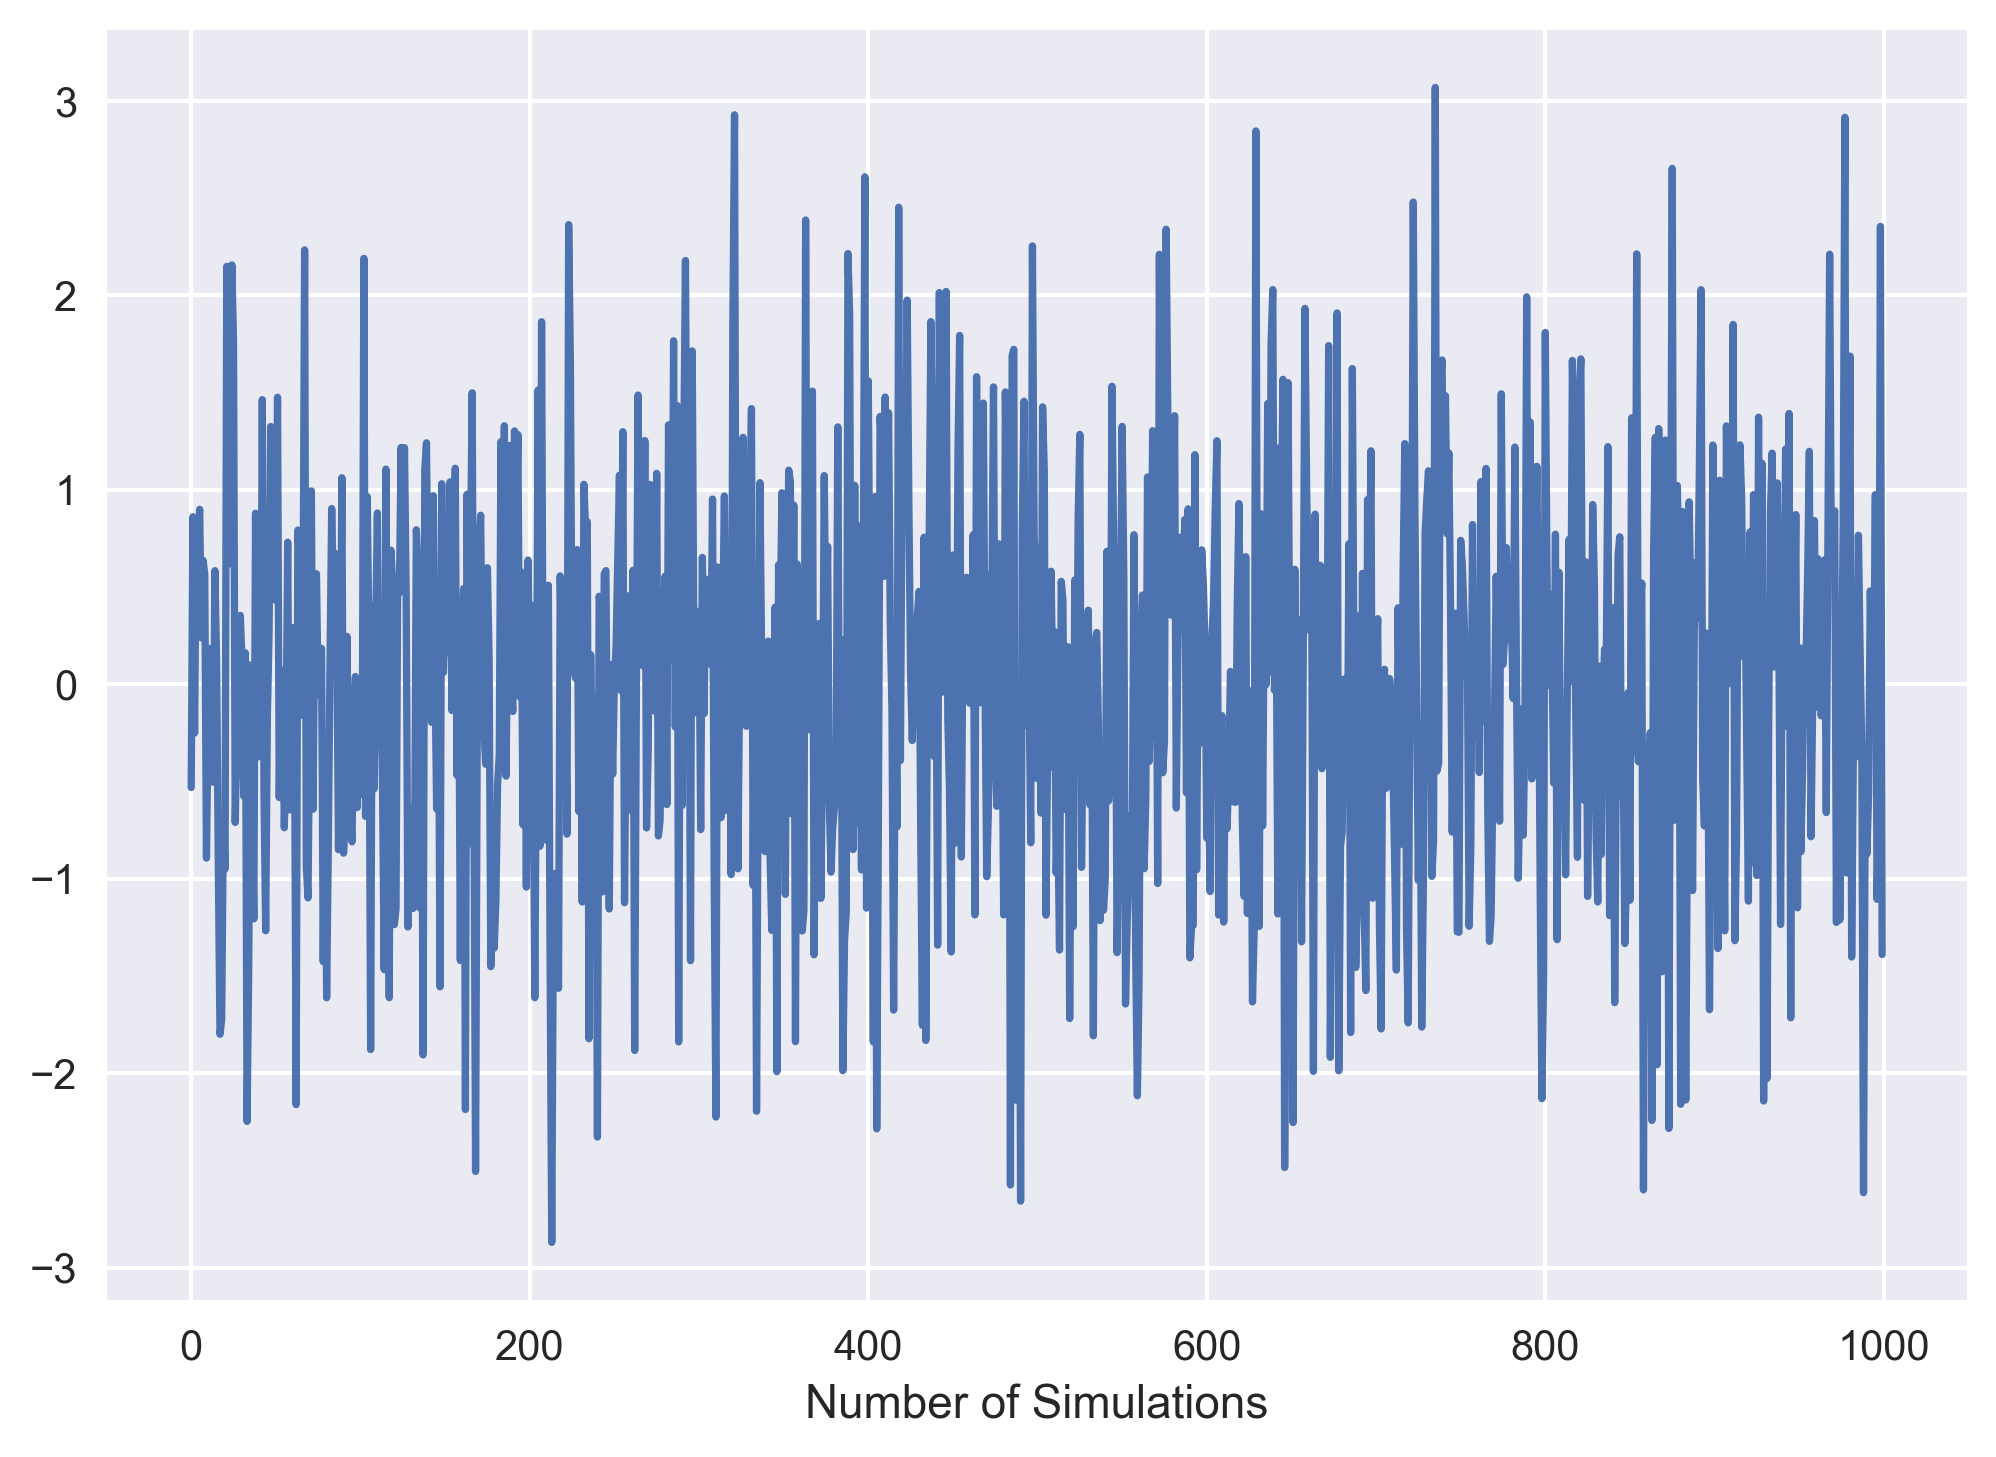

In [66]:
mu = 0
std = 1 
WN = np.random.normal(mu, std, 1000)

plt.plot(WN)
plt.xlabel('Number of Simulations')
plt.show()

### Optimum number of lags
The most widely used methods are ACF, PACF, and information criteria (AIC/BIC).

## Moving Average

MA an dresiduals are closely related models. MA can be considered a smoothing model, as it tends to take into account the lag values of residual.

In [69]:
ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock_prices = yf.download(ticker, period='3y', interval='1d')\
               .Close

[*********************100%***********************]  2 of 2 completed


In [70]:
stock_prices = stock_prices.dropna()

In [71]:
for i in ticker:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("The ADF test statistic and p-value of {} are {}"\
          .format(i, stat_test))

The ADF test statistic and p-value of AAPL are (-2.6289973274470224, 0.08715097221071938)
The ADF test statistic and p-value of MSFT are (-2.245989213632652, 0.189979205693183)


In short, they are not stationary; thus, we will take their first difference and split the data as train and test steps.

In [72]:
diff_stock_prices = stock_prices.diff().dropna()

In [73]:
split = int(len(diff_stock_prices['AAPL'].values) * 0.95)
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split]
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:]
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split]
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]

In [74]:
diff_train_aapl.to_csv('diff_train_aapl.csv')
diff_test_aapl.to_csv('diff_test_aapl.csv')
diff_train_msft.to_csv('diff_train_msft.csv')
diff_test_msft.to_csv('diff_test_msft.csv')

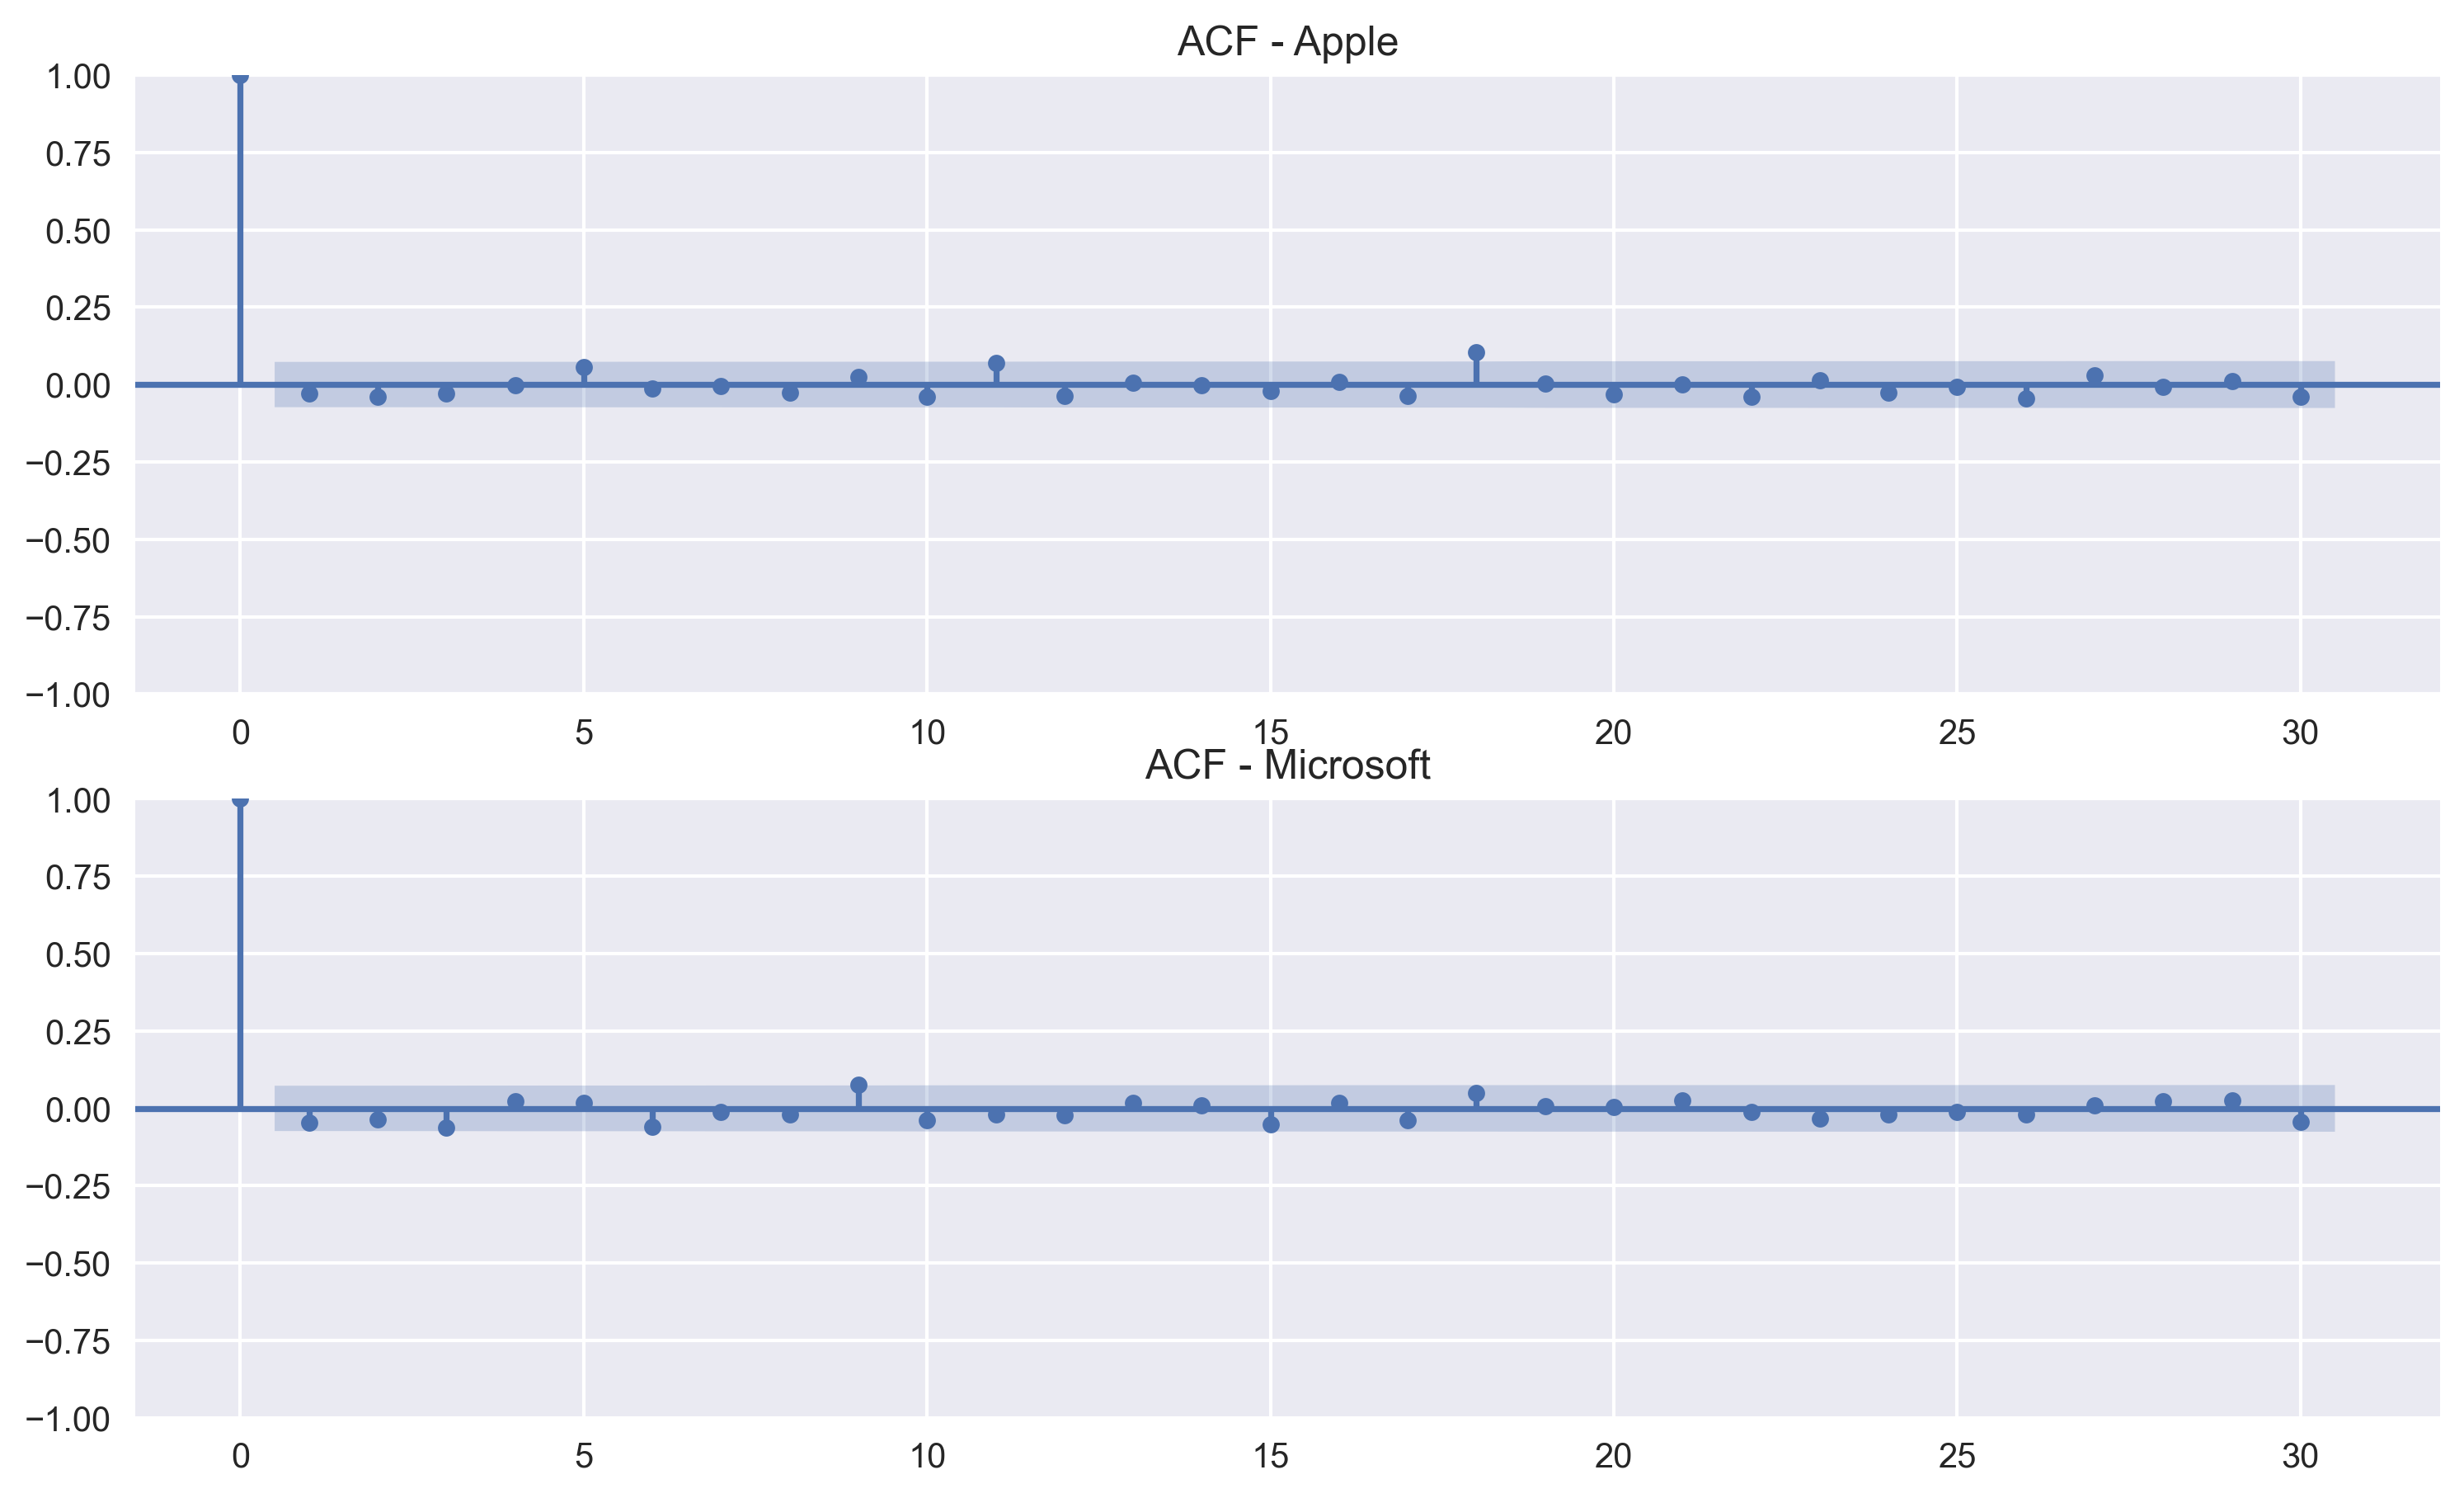

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout() 
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30,
                         ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft,lags=30,
                         ax=ax[1], title='ACF - Microsoft')
plt.show()

In [76]:
short_moving_average_appl = diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl = diff_train_aapl.rolling(window=22).mean()

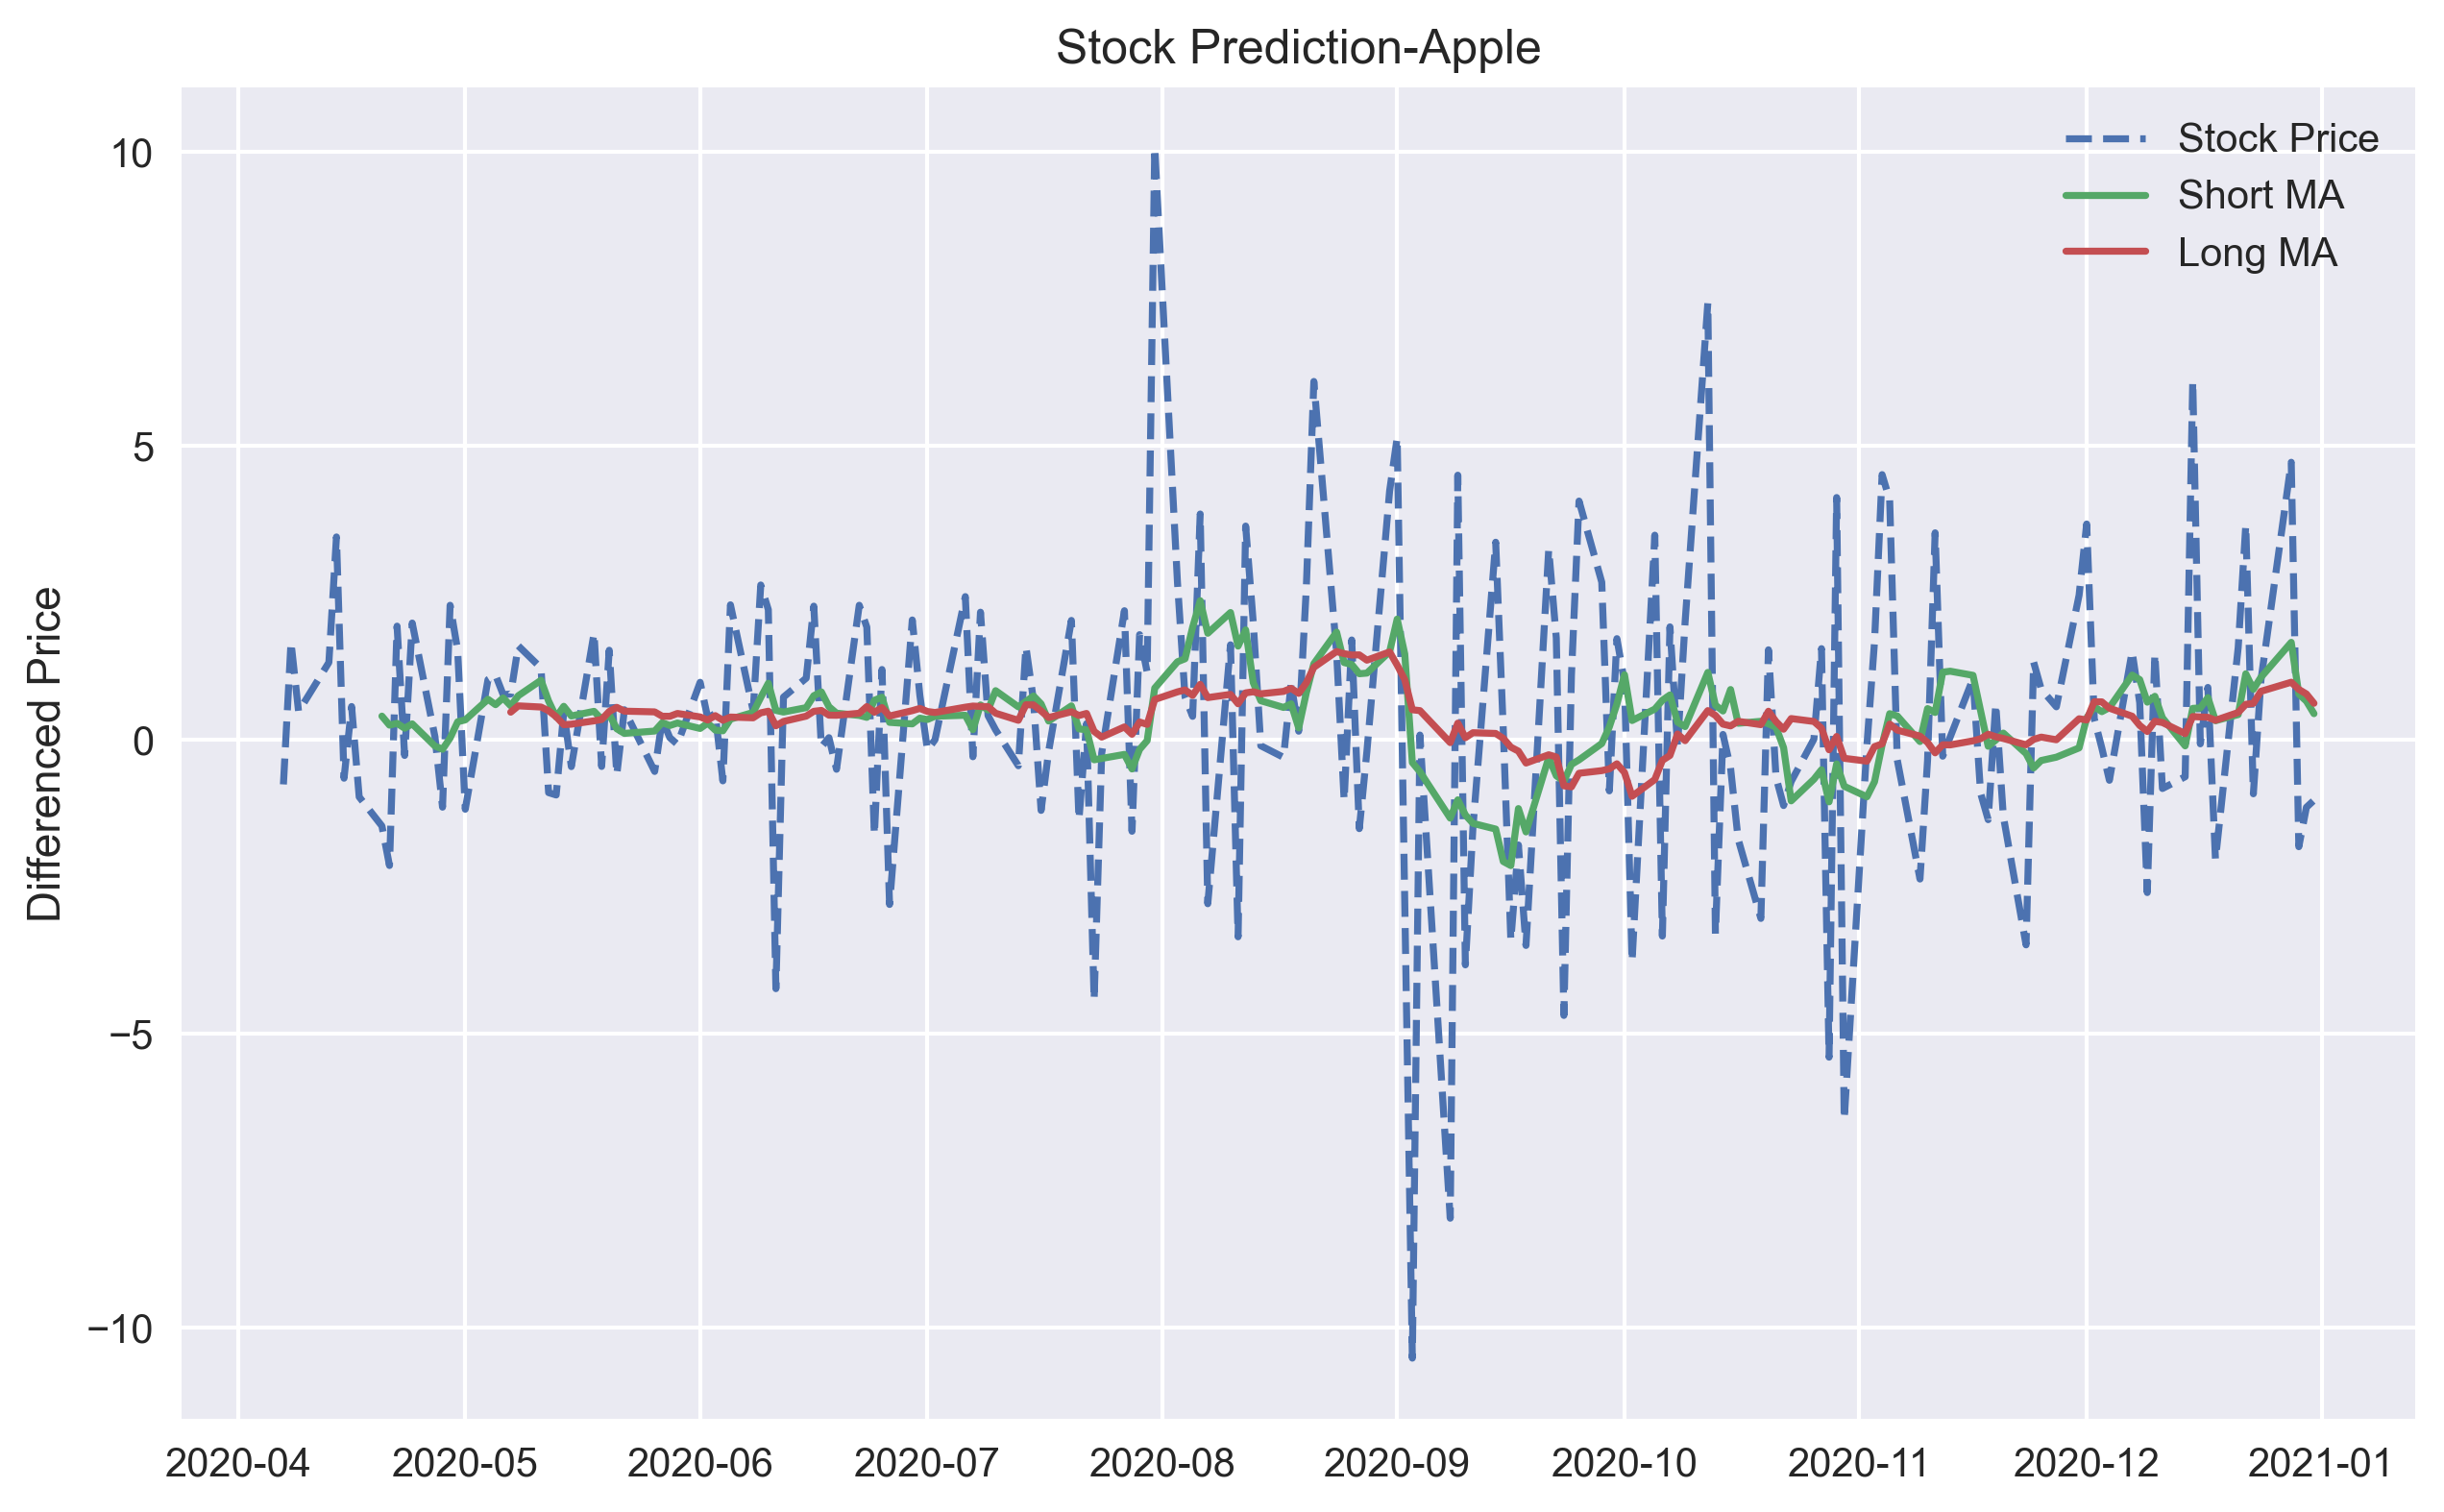

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_aapl.loc[start:end].index, 
        diff_train_aapl.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_appl.loc[start:end].index, 
        short_moving_average_appl.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_appl.loc[start:end].index, 
        long_moving_average_appl.loc[start:end],
        label = 'Long MA', linestyle='solid')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_title('Stock Prediction-Apple')
plt.show()

In [78]:
short_moving_average_msft = diff_train_msft.rolling(window=2).mean()
long_moving_average_msft = diff_train_msft.rolling(window=22).mean()

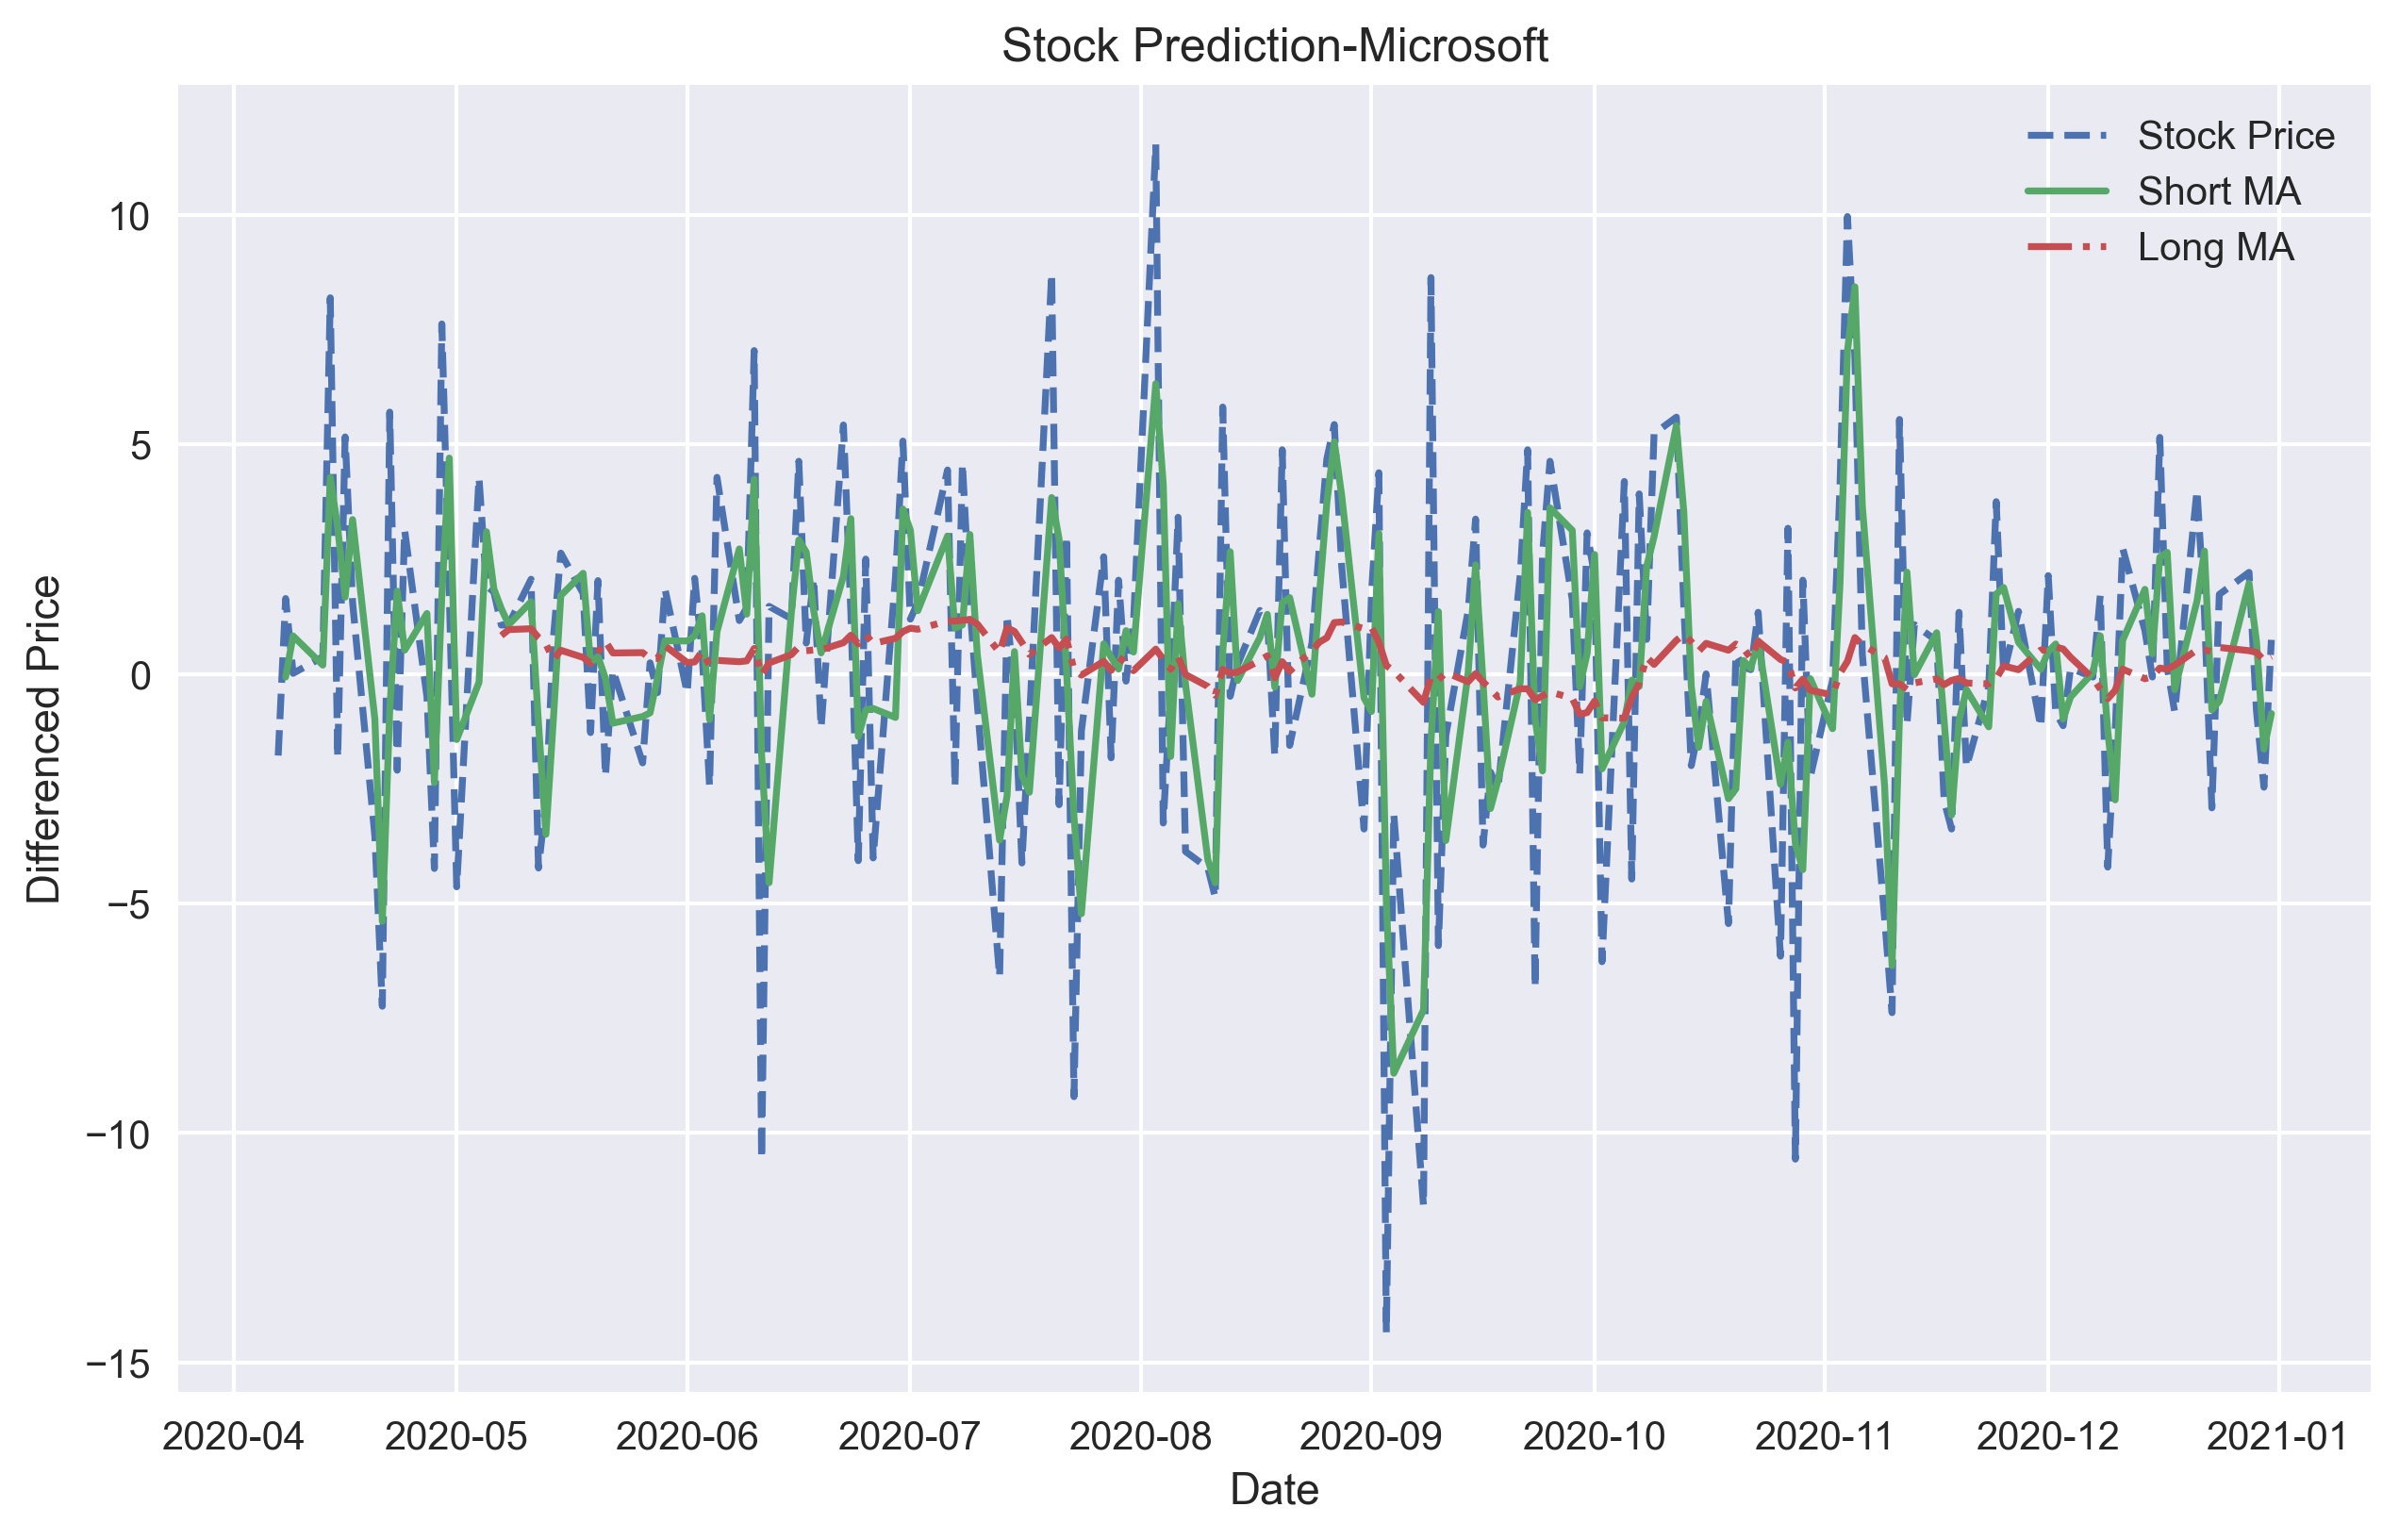

In [79]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_msft.loc[start:end].index,
        diff_train_msft.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_msft.loc[start:end].index,
        short_moving_average_msft.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_msft.loc[start:end].index,
        long_moving_average_msft.loc[start:end],
        label = 'Long MA', linestyle='-.')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_xlabel('Date')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

## Autoregressive Model

The most distinctive feature of the AR model is the dependence structure of successive terms; the current value is regressed over its own lag values. So we basically forecast the current value of the time series based on a linear combination of its past values.

$X_t = c + \alpha_1 X_{t-1} + \alpha_2 X_{t-2} ... + \alpha_p X_{t-p} + \epsilon_t $, where $\epsilon_t$ denotes the residuals and $c$ is the intercept term.

The AR(p) model implies that past values up to order $p$ have somewhat explanatory power on $X_t$.

An important property of time series is *invertibility*. A MA process is invertible if it can be converted to an infinite AR model - called *infinite AR*.

Unlike in MA, partial ACF is a useful tool to find the optimum order in the AR model, since in Ar, we aim finding the relationship of a time series between two different times.

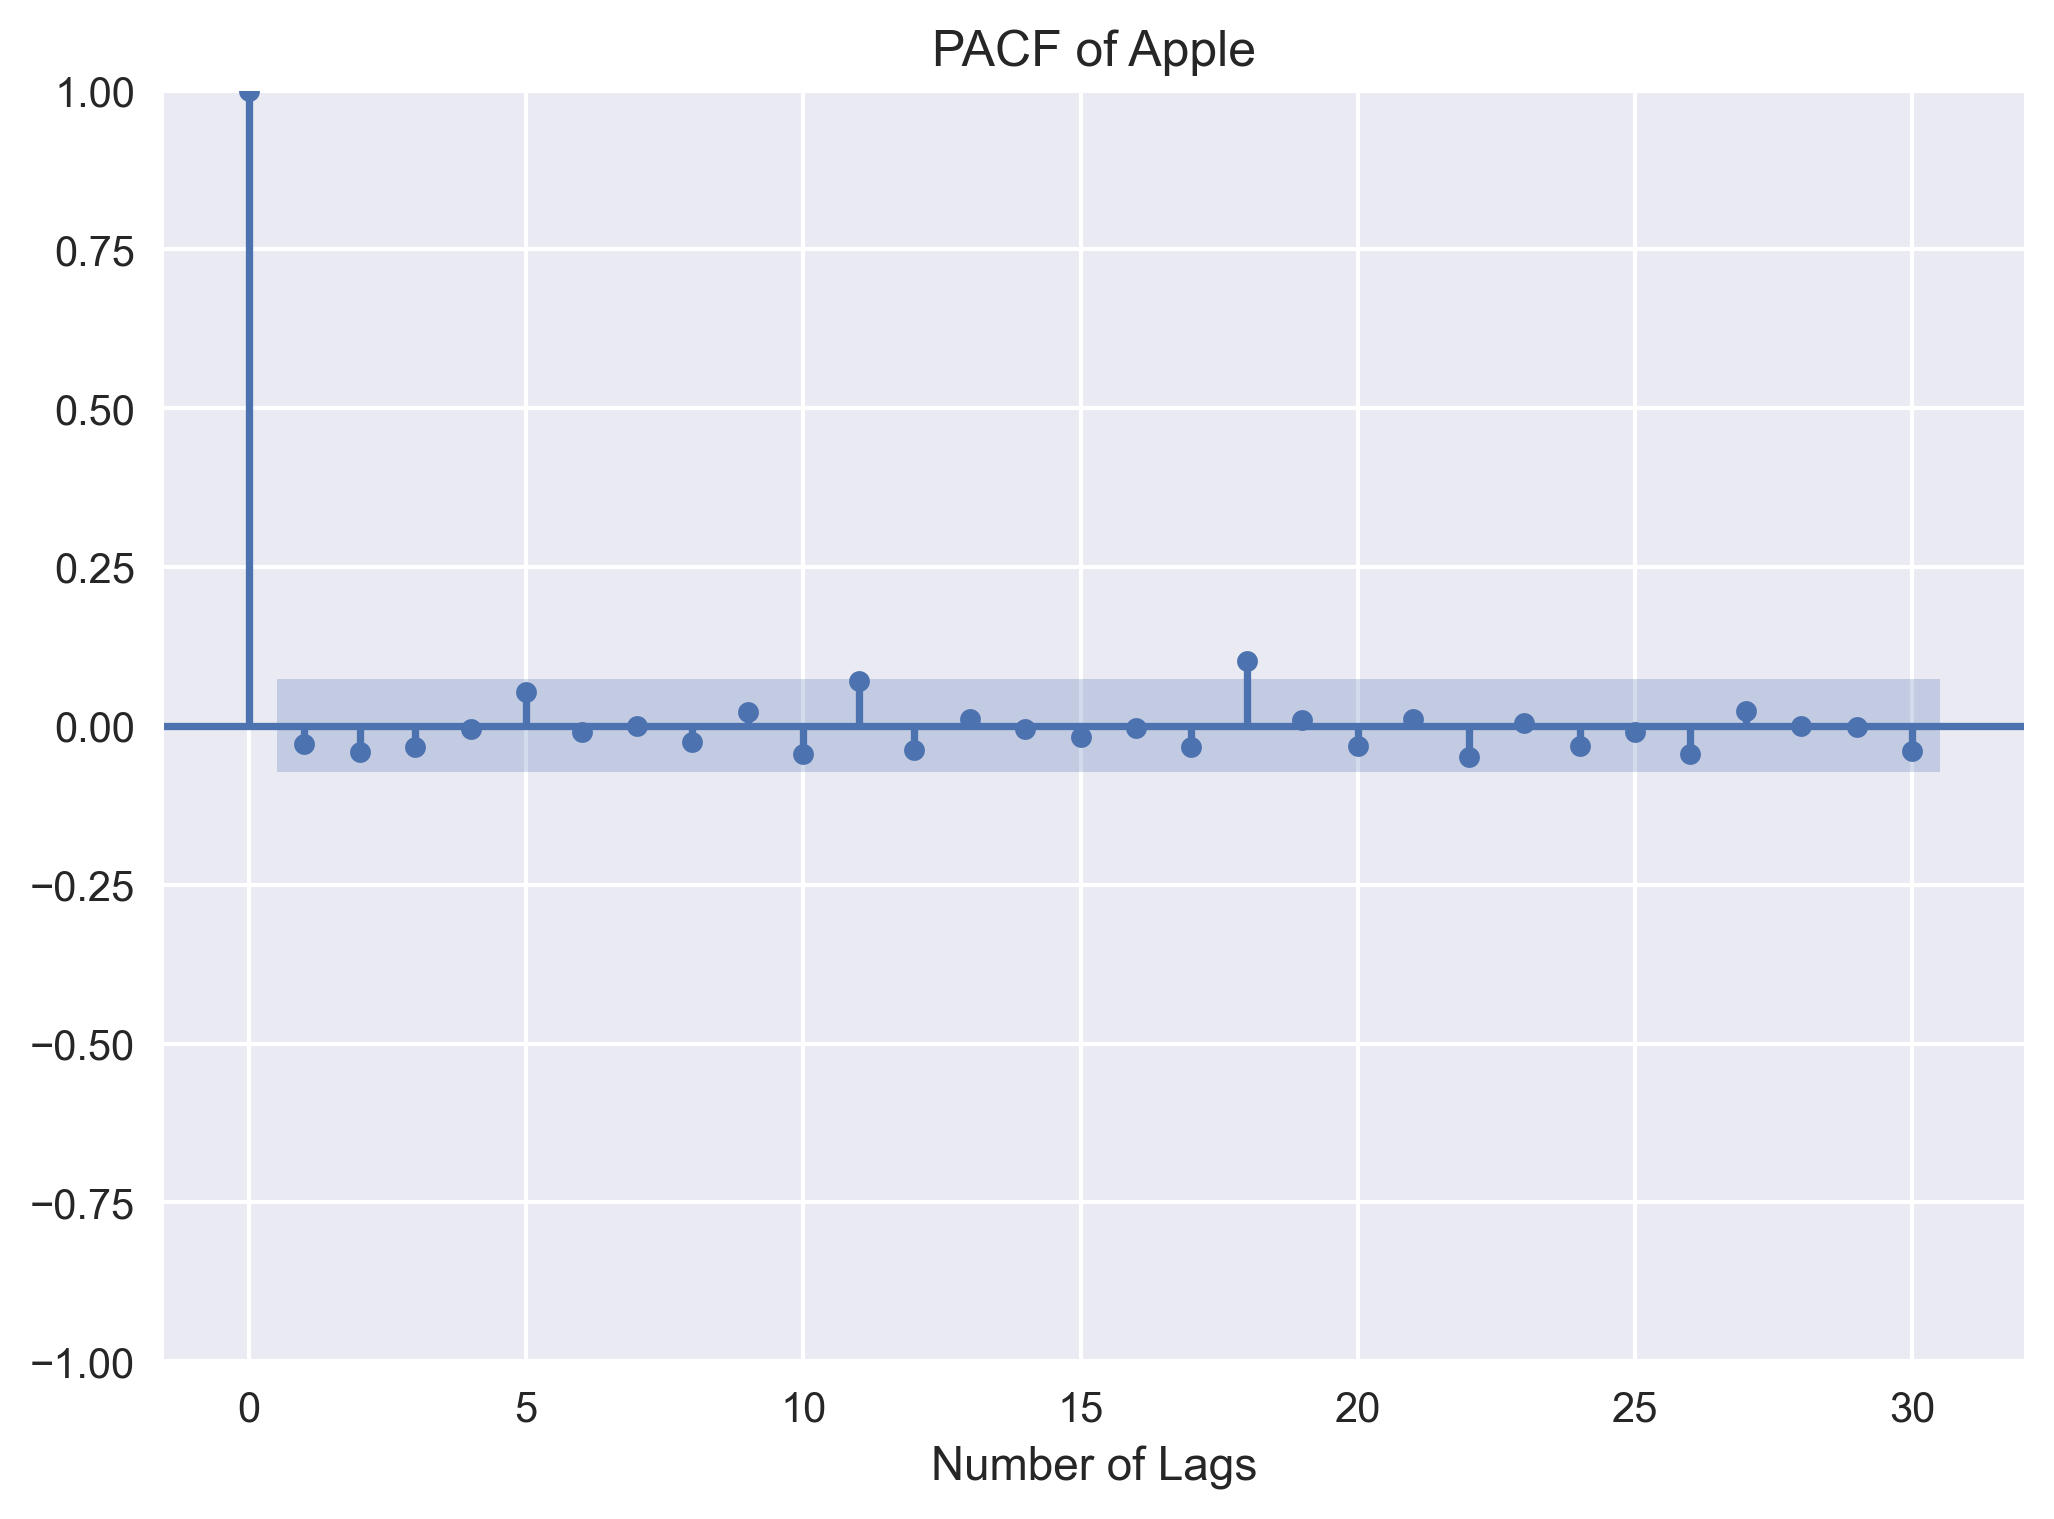

In [80]:
sm.graphics.tsa.plot_pacf(diff_train_aapl, lags=30)
plt.title('PACF of Apple')
plt.xlabel('Number of Lags')
plt.show()

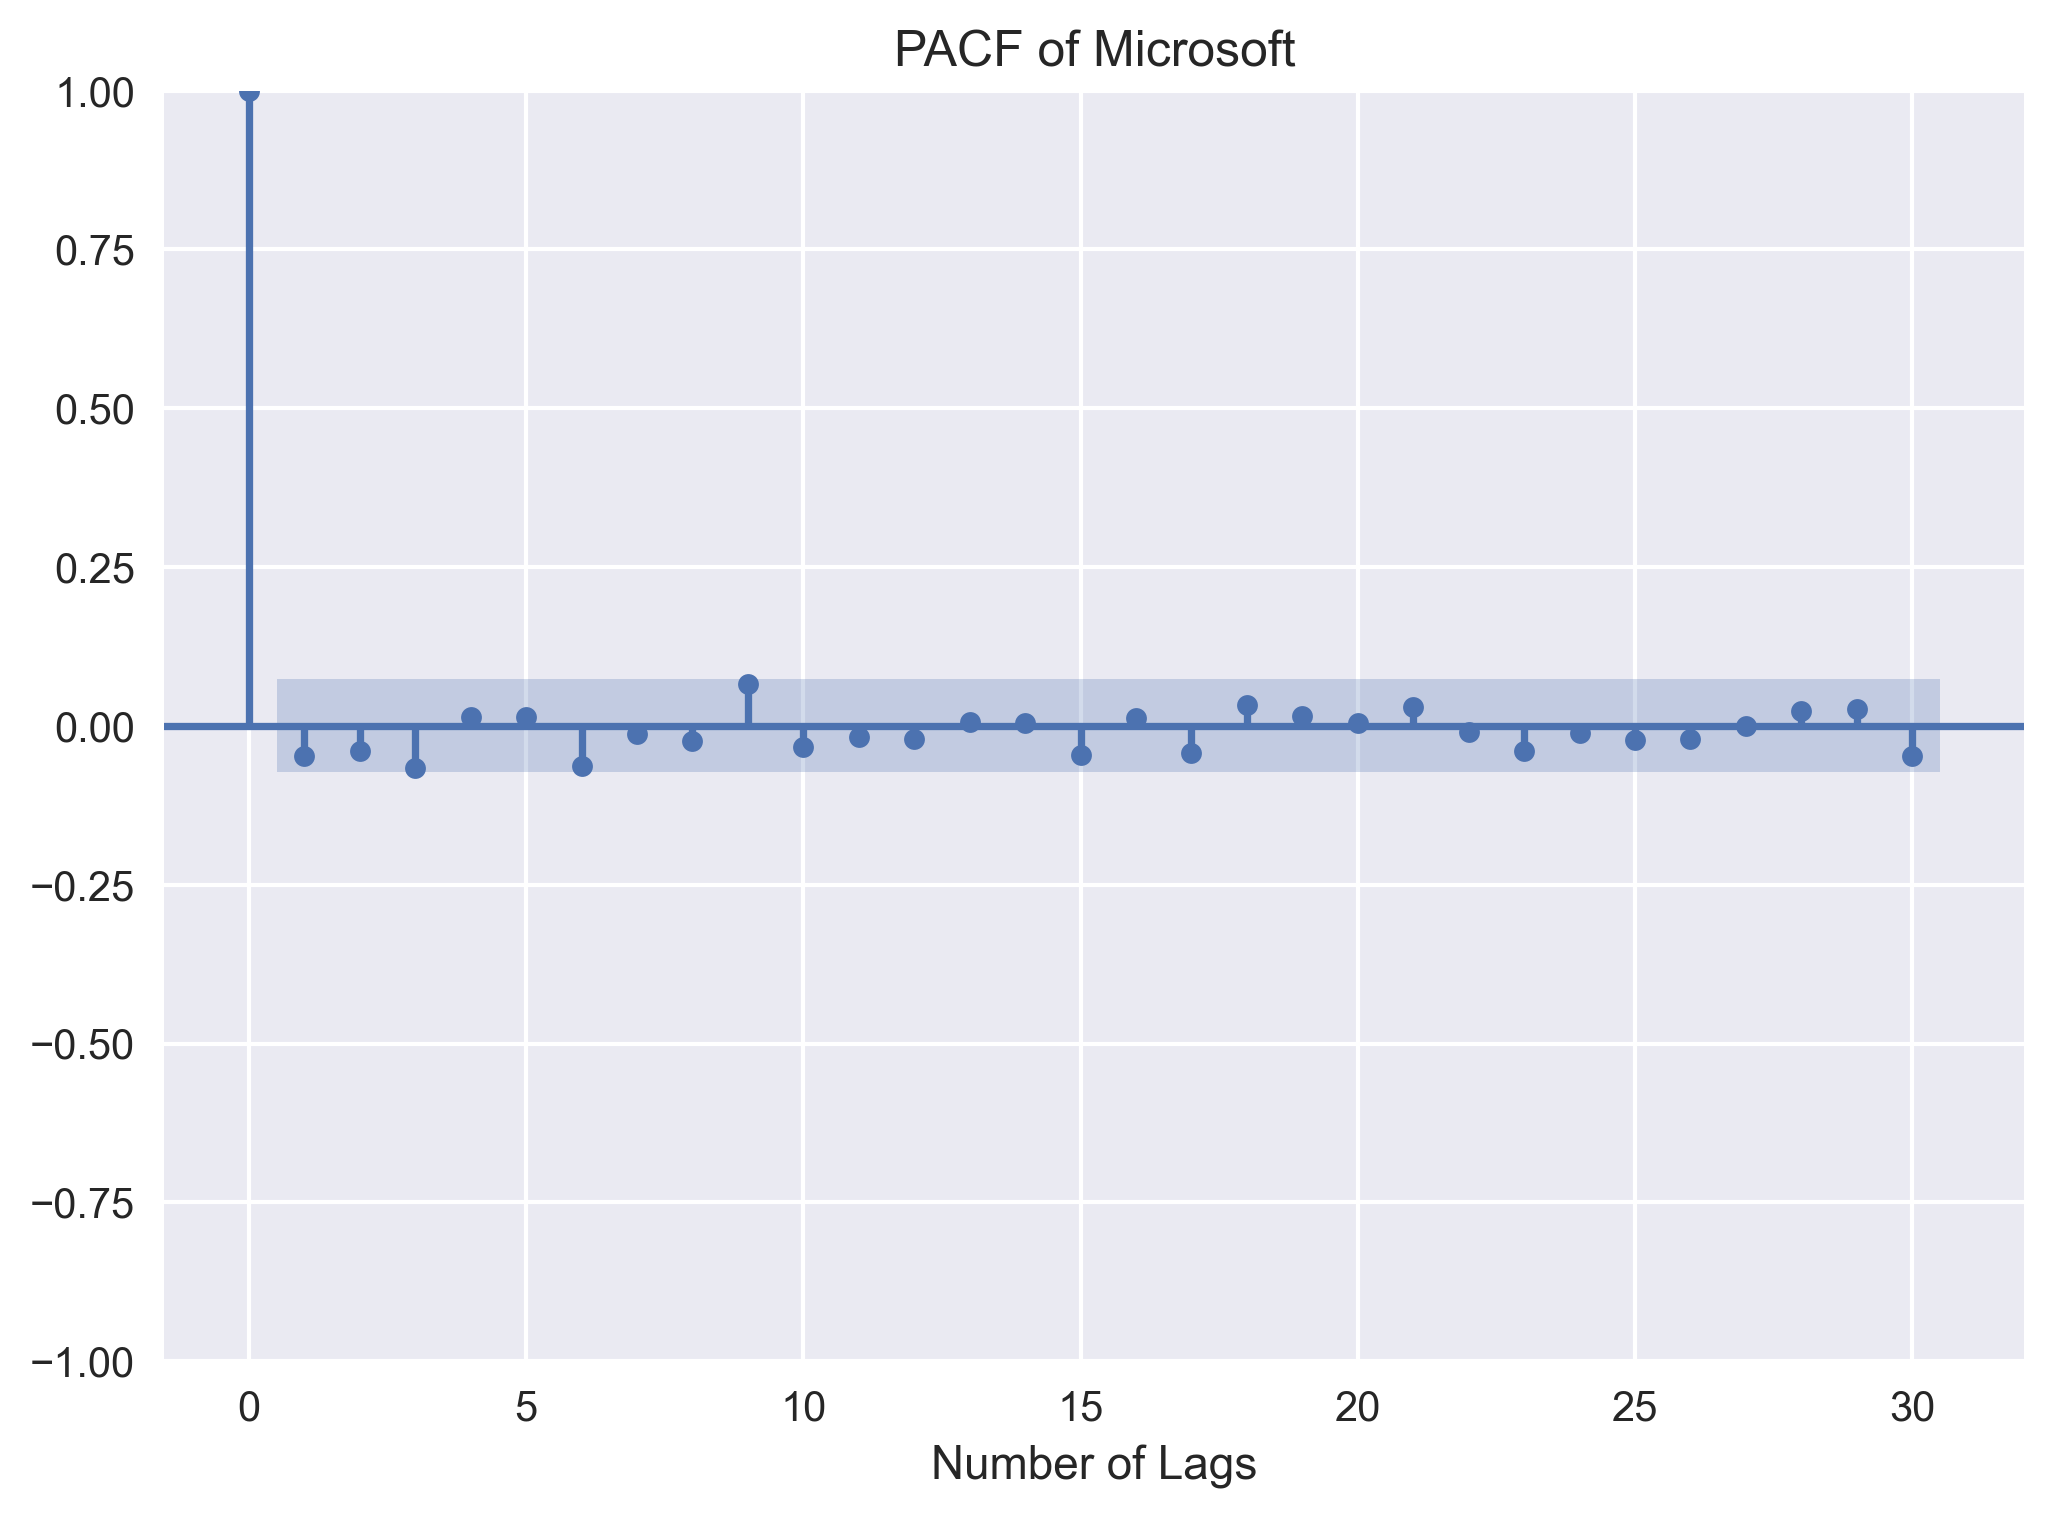

In [81]:
sm.graphics.tsa.plot_pacf(diff_train_msft, lags=30)
plt.title('PACF of Microsoft')
plt.xlabel('Number of Lags')
plt.show()

In [82]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [83]:
ar_aapl = AutoReg(diff_train_aapl.values, lags=29)
ar_fitted_aapl = ar_aapl.fit()

In [84]:
ar_predictions_aapl = ar_fitted_aapl.predict(start=len(diff_train_aapl), 
                                             end=len(diff_train_aapl)\
                                             + len(diff_test_aapl) - 1, 
                                             dynamic=False)

In [85]:
for i in range(len(ar_predictions_aapl)):
    print('==' * 25)
    print('predicted values:{:.4f} & actual values:{:.4f}'\
          .format(ar_predictions_aapl[i], diff_test_aapl[i]))

predicted values:0.1502 & actual values:0.1400
predicted values:-0.0882 & actual values:2.8400
predicted values:-0.4849 & actual values:-0.6500
predicted values:0.2619 & actual values:2.1300
predicted values:0.1224 & actual values:-1.6200
predicted values:0.2375 & actual values:-1.1600
predicted values:0.2200 & actual values:-4.0700
predicted values:-0.4461 & actual values:0.4300
predicted values:0.6637 & actual values:0.4900
predicted values:-0.7461 & actual values:-2.6900
predicted values:0.0514 & actual values:1.2100
predicted values:-0.0736 & actual values:-0.5100
predicted values:0.3018 & actual values:-2.1000
predicted values:0.7062 & actual values:0.6000
predicted values:-0.4697 & actual values:5.1200
predicted values:0.2969 & actual values:2.8000
predicted values:-0.2949 & actual values:-2.2300
predicted values:-0.1285 & actual values:1.2700
predicted values:0.0462 & actual values:-2.2800
predicted values:-0.1548 & actual values:-2.0900
predicted values:-0.0284 & actual values:

In [86]:
ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index = diff_test_aapl.index

In [87]:
ar_msft = AutoReg(diff_train_msft.values, lags=26)
ar_fitted_msft = ar_msft.fit()

In [88]:
ar_predictions_msft = ar_fitted_msft.predict(start=len(diff_train_msft), 
                                             end=len(diff_train_msft)\
                                             +len(diff_test_msft) - 1,
                                             dynamic=False)

In [89]:
ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index

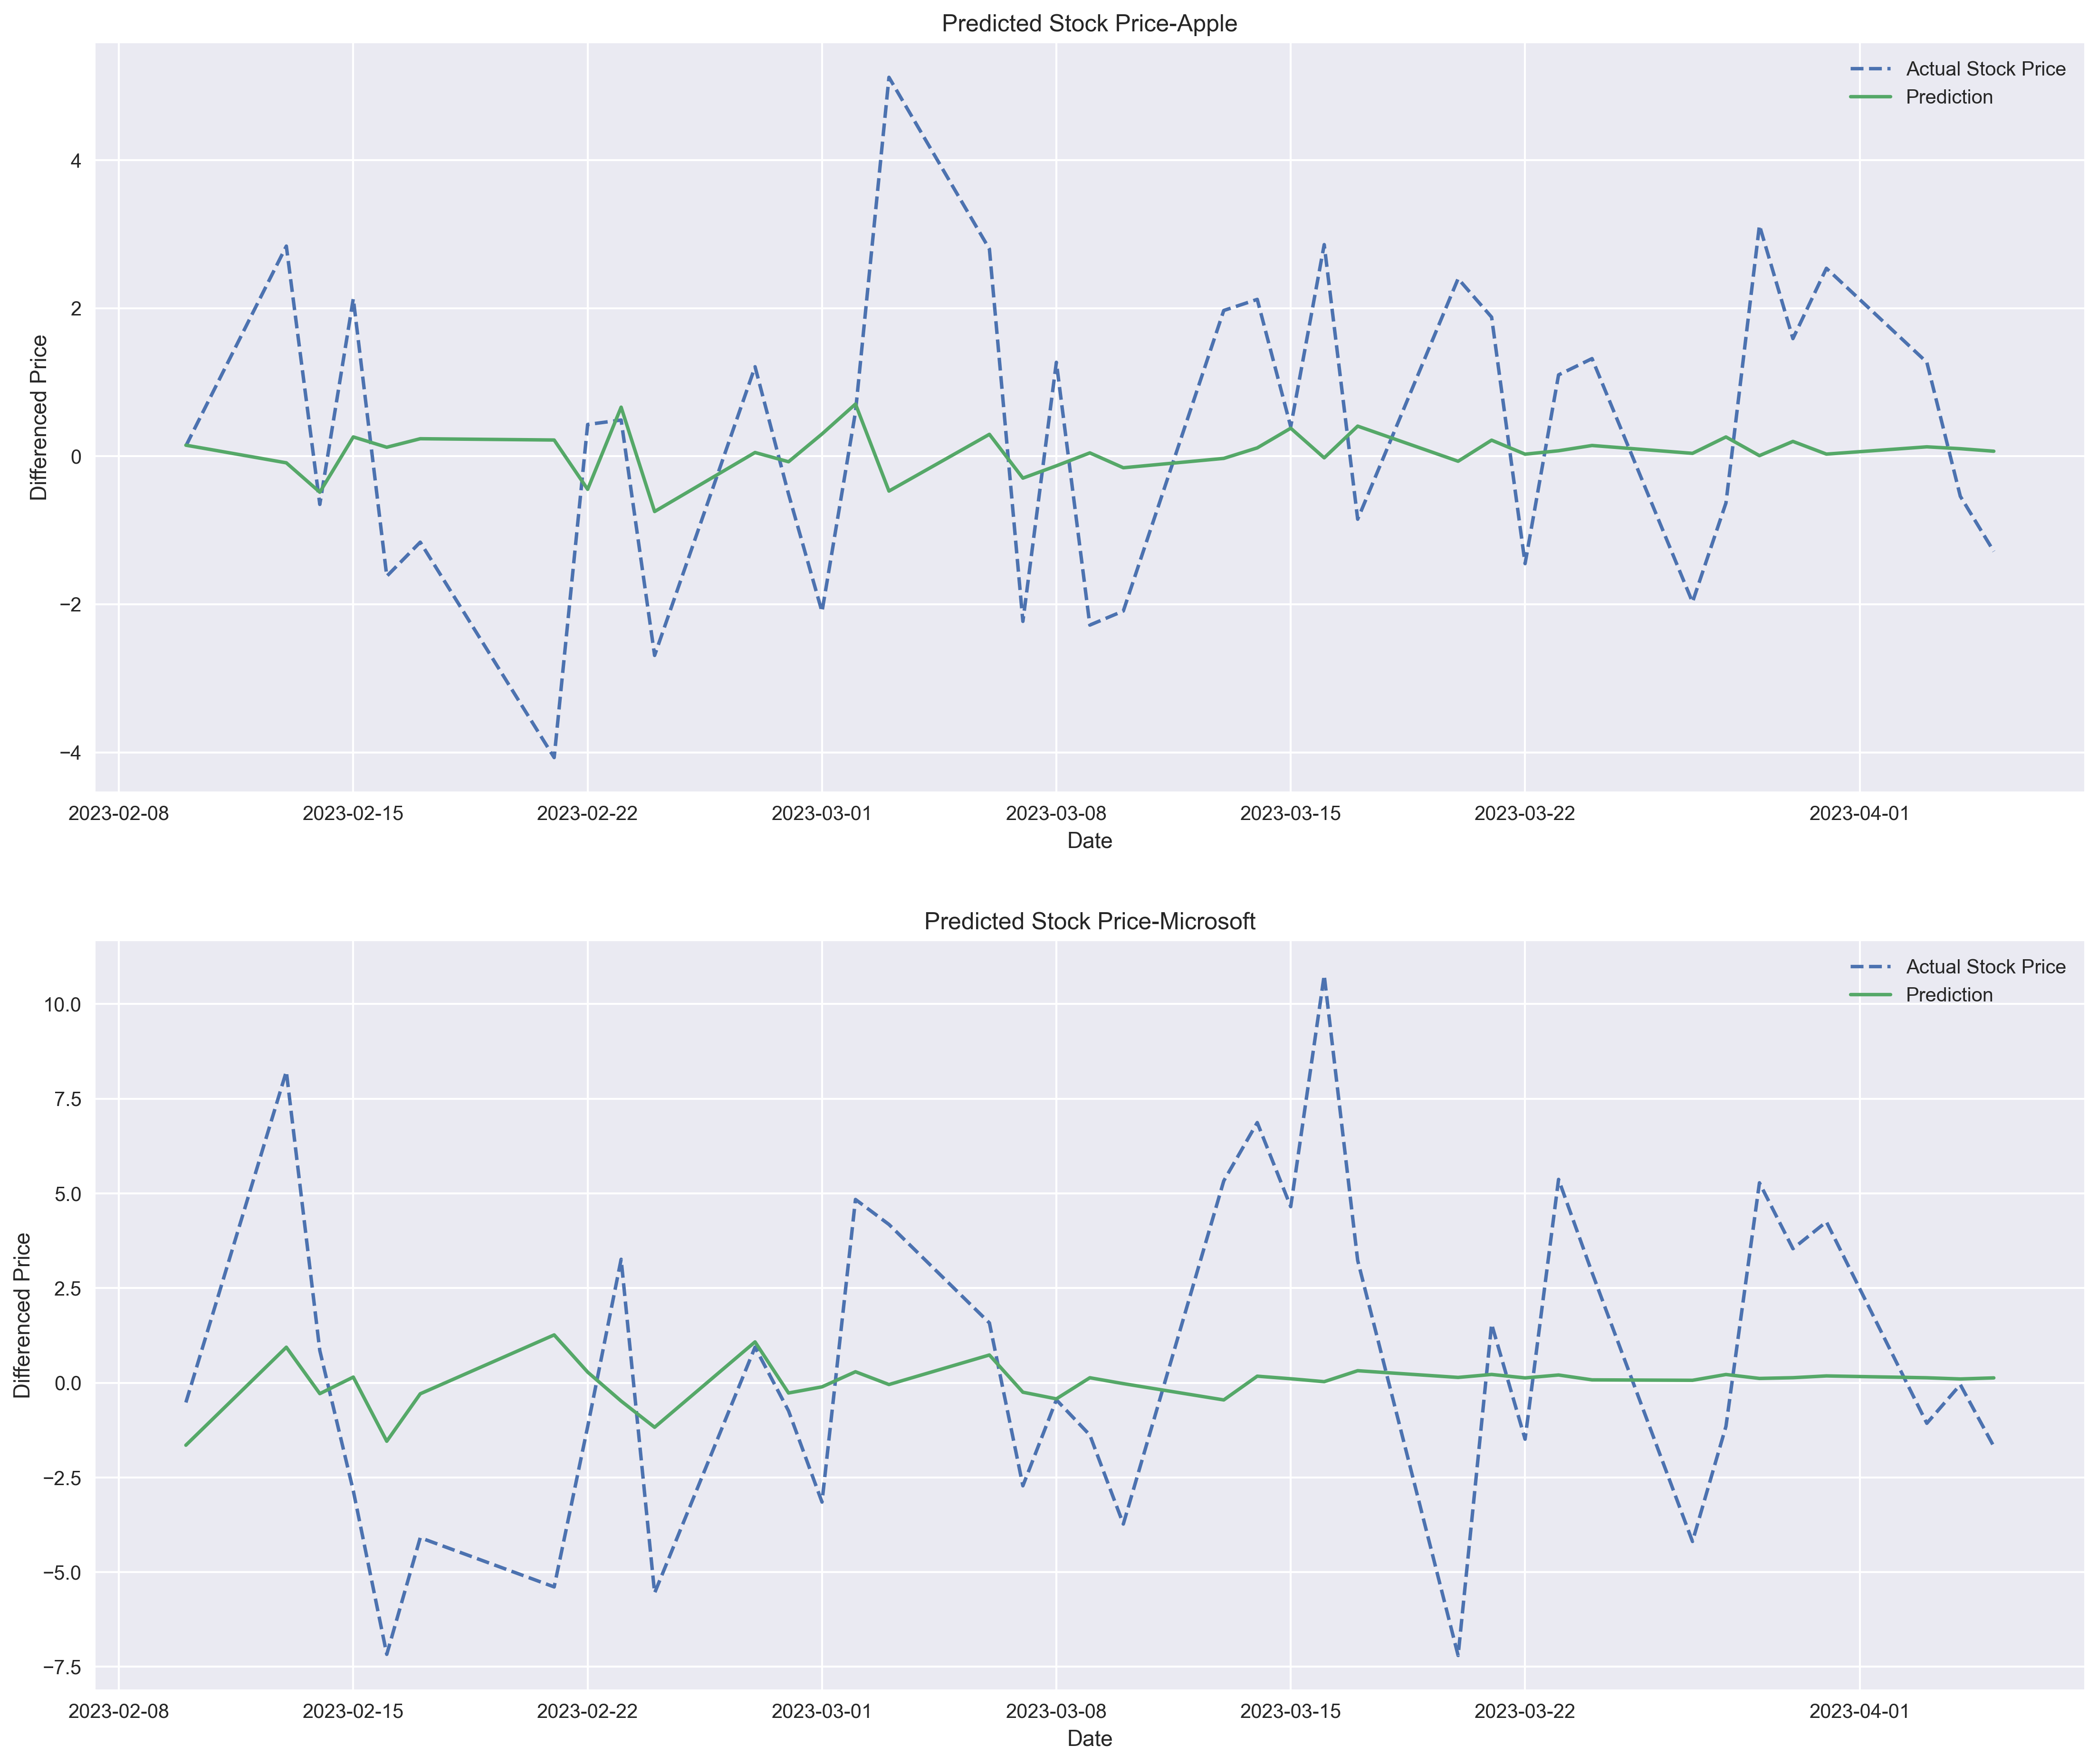

In [90]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(ar_predictions_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(ar_predictions_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

## ARIMA Model

ARIMA is a function of past values of a time series and white noise. It has been proposed as a generalization of AR and MA, but they do not have an itegration parameter, which helps us to feed the model with the raw data. So, even if we include nonstationary data, ARIMA makes it stationary by properly defining the integration parameter.

ARIMA(p,d,q) parameters: $p$ and $q$ refer to the order of AR and MA. The $d$ parameter controls for level difference. If $d = 1$, it amounts to first difference, and if it has a value of 0, it means the model is ARIMA. It is possible to have $d > 1$, but not as common as $d=1$.

**ARIMA pros:**
- Allows us working with raw data without considering stationarity
- Performs well with high-frequency data
- Is less sensitive to fluctuations in the data than other models

**ARIMA cons:**
- Might fail in capturing seasonality
- Works better with long series and short-term (daily, hourly) data
- No structural break during the analysis period should be observed
- Having no adjustment in the ARIMA process leads to instability

In [99]:
from statsmodels.tsa.arima.model import ARIMA

In [100]:
split = int(len(stock_prices['AAPL'].values) * 0.95)
train_aapl = stock_prices['AAPL'].iloc[:split]
test_aapl = stock_prices['AAPL'].iloc[split:]
train_msft = stock_prices['MSFT'].iloc[:split]
test_msft = stock_prices['MSFT'].iloc[split:]

In [101]:
arima_aapl = ARIMA(train_aapl,order=(9, 1, 9))
arima_fit_aapl = arima_aapl.fit()

In [102]:
arima_msft = ARIMA(train_msft, order=(6, 1, 6))
arima_fit_msft = arima_msft.fit()

In [103]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  + len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [104]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

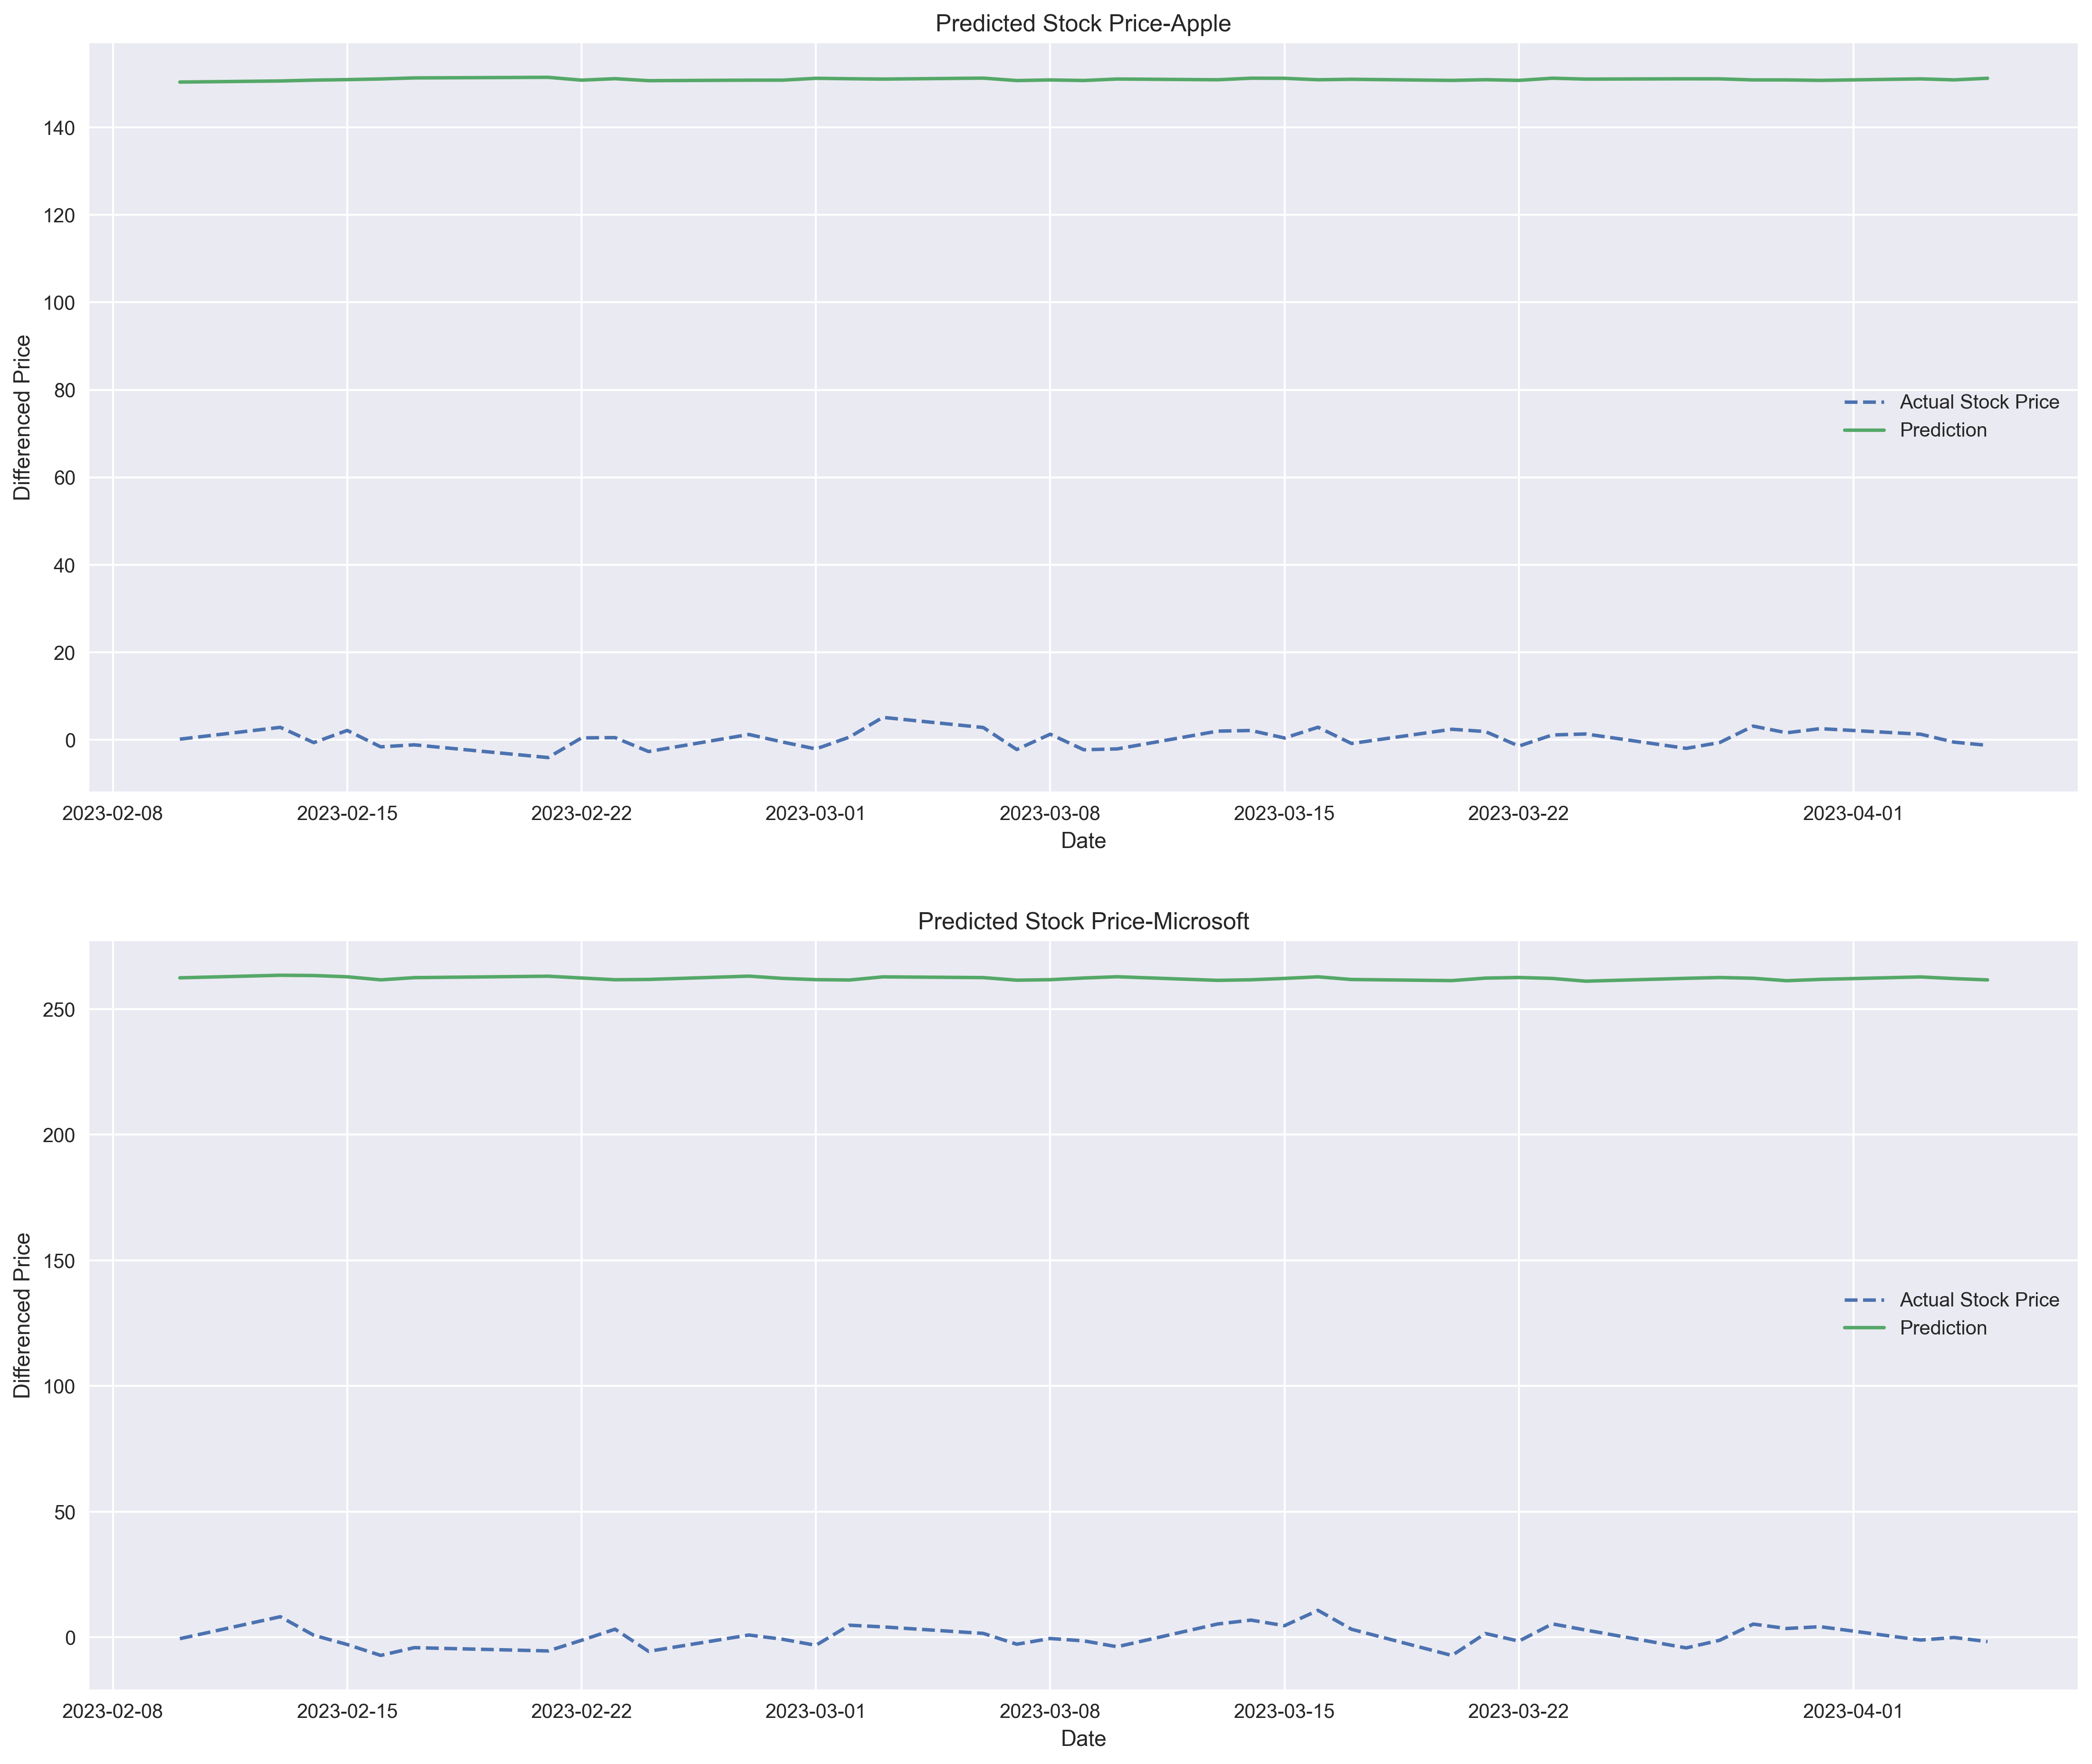

In [105]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()


Below, we apply AIC as the method for optimal lag selection. However, since (4,0,4) does not converge, we will use (4,1,4).

In [106]:
import itertools

In [107]:
p = q = range(0, 9)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_aapl = []
for param_set in pdq:
    try:
        arima_aapl = ARIMA(train_aapl, order=param_set)
        arima_fitted_aapl = arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
      .format(pd.DataFrame(arima_results_aapl)
             .where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0], 
             pdq[arima_results_aapl.index(min(arima_results_aapl))]))

**************************************************
The Lowest AIC score is 3500.7283 and the corresponding parameters are (3, 2, 3)


In [108]:
arima_aapl = ARIMA(train_aapl, order=(3, 2, 3))
arima_fit_aapl = arima_aapl.fit()

In [109]:
p = q = range(0, 6)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_msft = []
for param_set in pdq:
    try:
        arima_msft = ARIMA(stock_prices['MSFT'], order=param_set)
        arima_fitted_msft = arima_msft.fit()
        arima_results_msft.append(arima_fitted_msft.aic)
    except:
        continue
print('**' * 25)
print('The lowest AIC score is {:.4f} and parameters are {}'
      .format(pd.DataFrame(arima_results_msft)
              .where(pd.DataFrame(arima_results_msft).T.notnull()\
                     .all()).min()[0], 
              pdq[arima_results_msft.index(min(arima_results_msft))]))

**************************************************
The lowest AIC score is 16.0000 and parameters are (3, 2, 4)


In [110]:
arima_msft = ARIMA(stock_prices['MSFT'], order=(3, 2 ,4))
arima_fit_msft= arima_msft.fit()

In [111]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  +len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [112]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

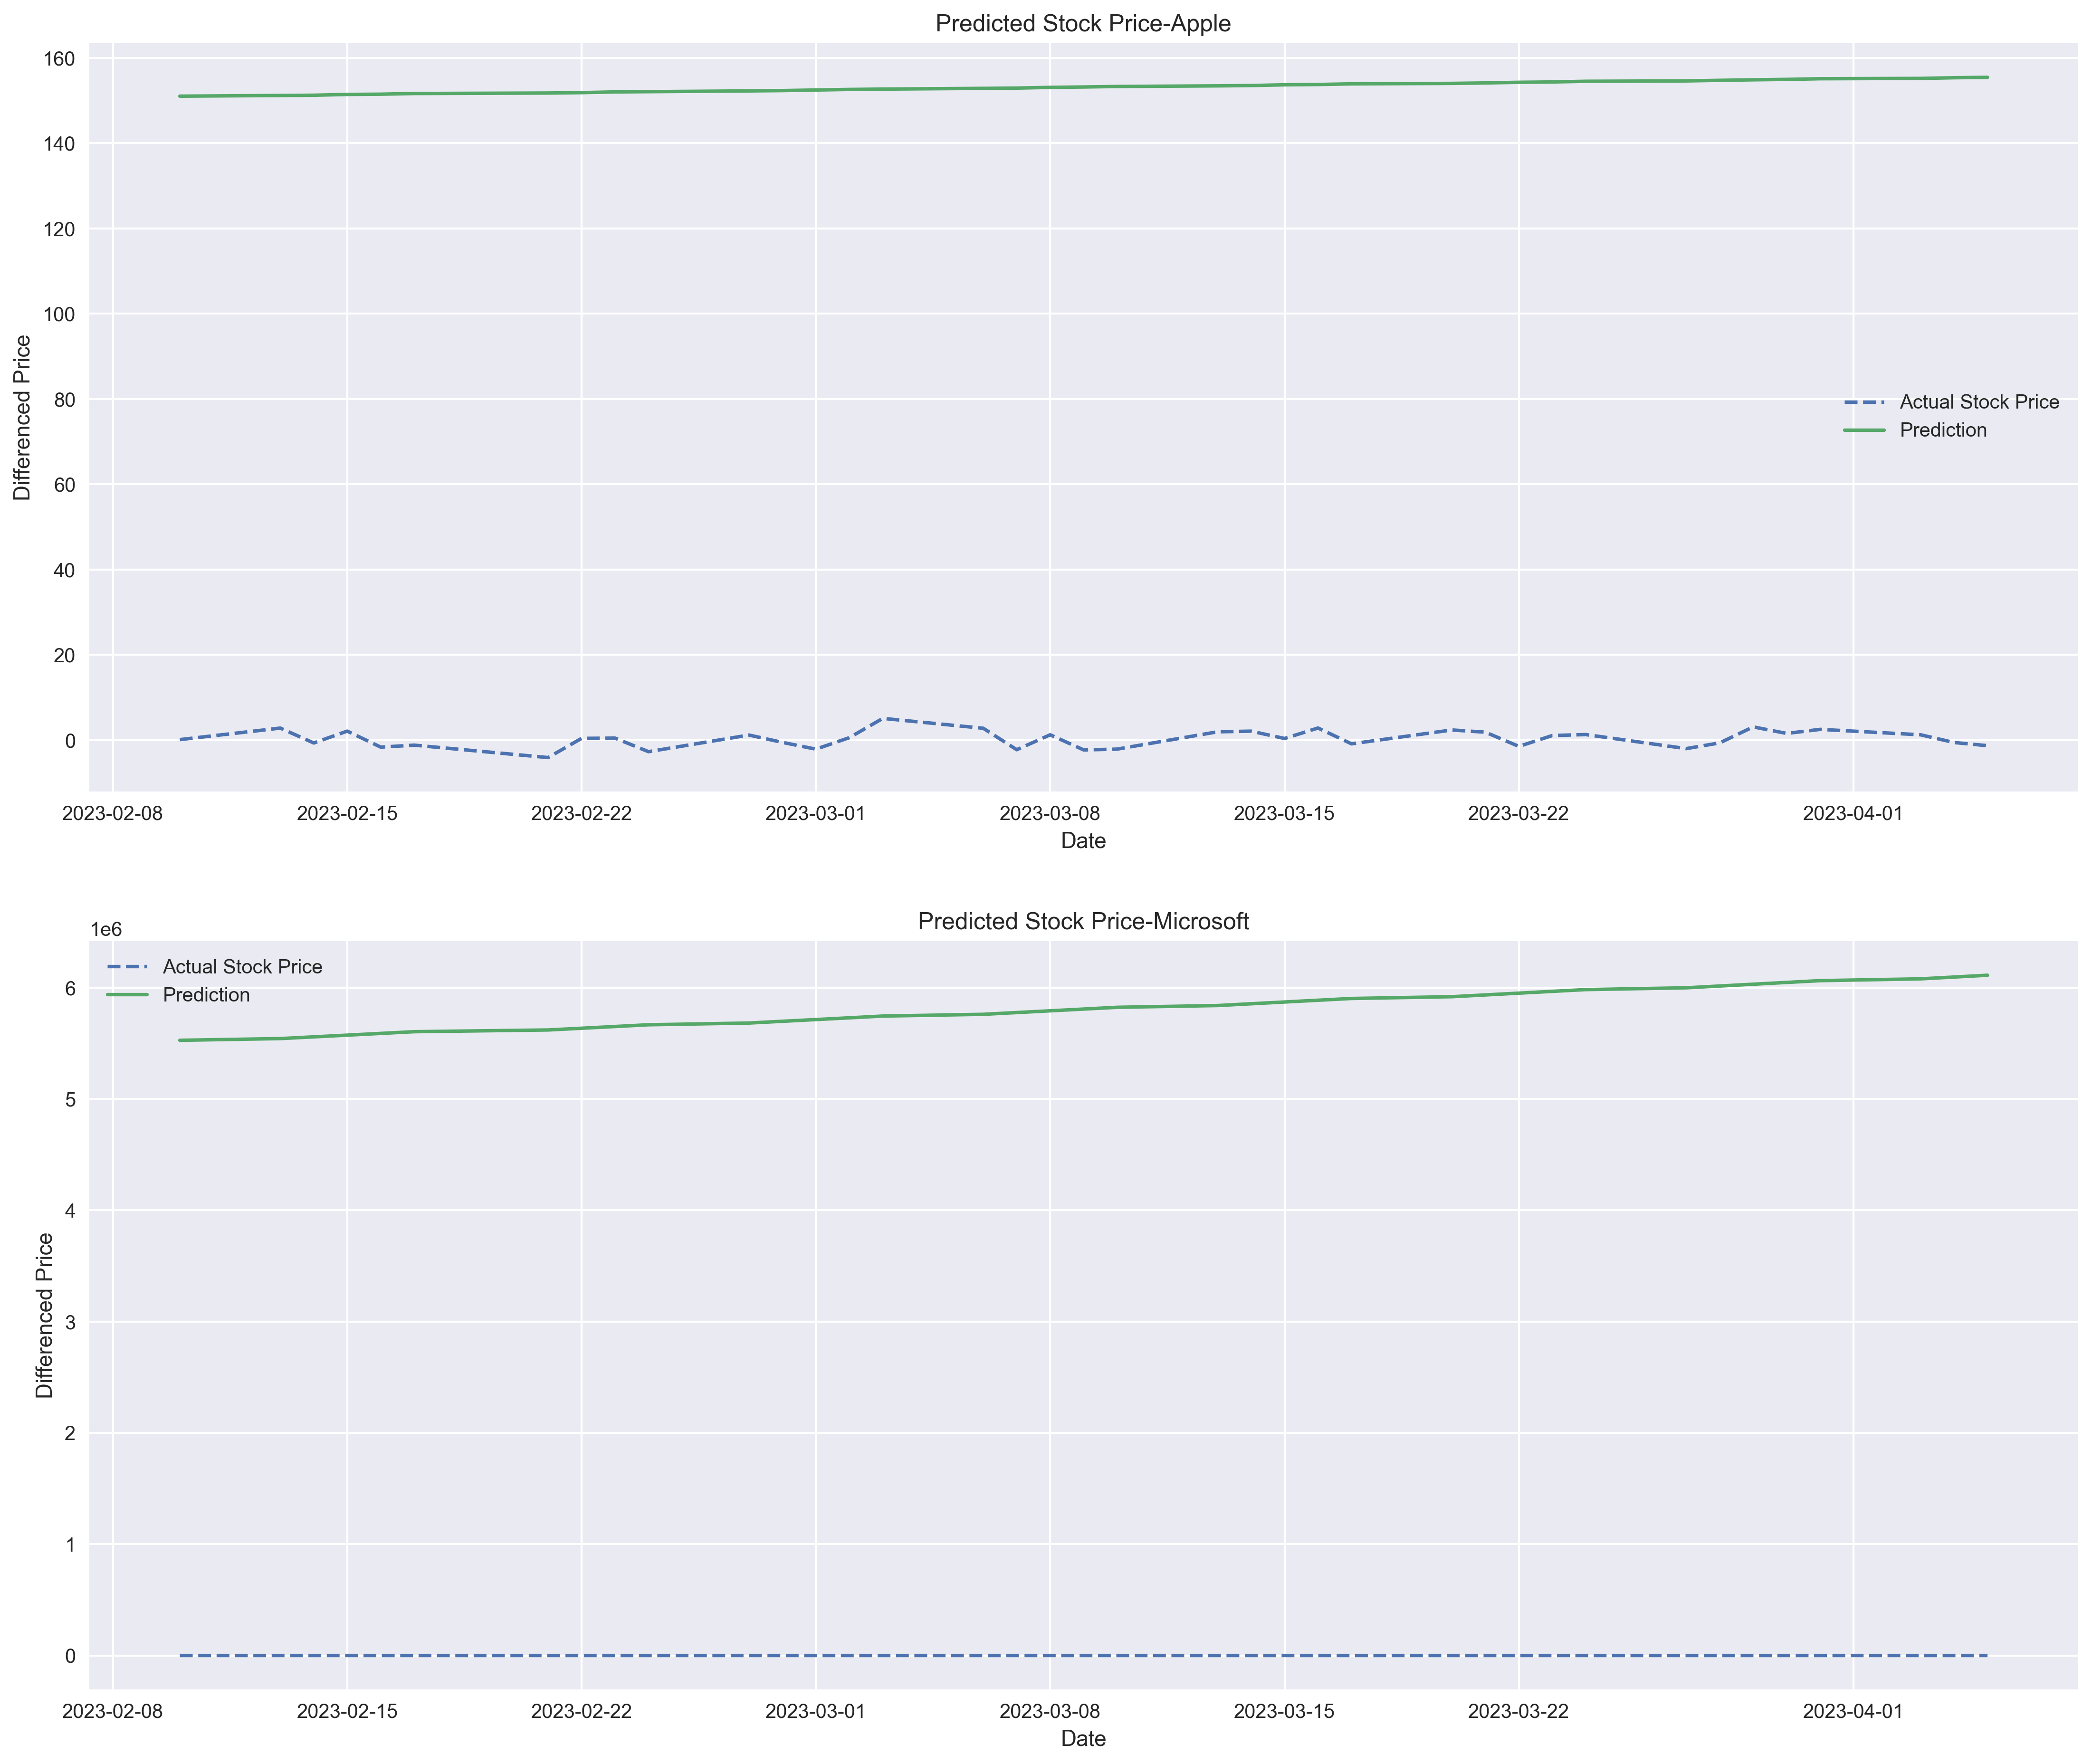

In [113]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()